In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import BayesianRidge
from statsmodels.discrete.count_model import ZeroInflatedPoisson
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from statsmodels.regression.quantile_regression import QuantReg
from pygam import LinearGAM
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
import plotly.graph_objects as go
from plotly.offline import plot




train_df = pd.read_csv('Train.csv')
test_df= pd.read_csv(r'Test.csv')
train_df = train_df[train_df['Print_speed'] != 20].reset_index(drop=True)


#Data =  pd.read_csv(r'Data_aerosol_final.csv')

'''train_df.columns

encoder = LabelEncoder()
train_df["Ink"] = encoder.fit_transform(train_df["Ink"])
test_df["Ink"] = encoder.transform(test_df["Ink"])

from sklearn.preprocessing import StandardScaler




X_train = train_df.drop('Line', axis=1)
y_train = train_df['Line']

X_test = test_df.drop('Line', axis=1)
y_test = test_df['Line']


# Split the data into training and test sets
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, stratify=X_test[['Viscosity' ,'Print_speed']])


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)






import tensorflow as tf

model = tf.keras.models.load_model('/Experiment-15_Nadam_0.00019068570691160858.h5')


model_2 = tf.keras.models.load_model('Experiment-179_rms_0.00019928644178435206.h5')
model_5 = tf.keras.models.load_model('Experiment-133_SGD_0.00020261939789634198.h5')
model_4 = tf.keras.models.load_model('Experiment-169_rms_0.00020216763368807733.h5')
model_3 = tf.keras.models.load_model('Experiment-137_SGD_0.00020213007519487292.h5')'''

'train_df.columns\n\nencoder = LabelEncoder()\ntrain_df["Ink"] = encoder.fit_transform(train_df["Ink"])\ntest_df["Ink"] = encoder.transform(test_df["Ink"])\n\nfrom sklearn.preprocessing import StandardScaler\n\n\n\n\nX_train = train_df.drop(\'Line\', axis=1)\ny_train = train_df[\'Line\']\n\nX_test = test_df.drop(\'Line\', axis=1)\ny_test = test_df[\'Line\']\n\n\n# Split the data into training and test sets\n#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, stratify=X_test[[\'Viscosity\' ,\'Print_speed\']])\n\n\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\n#X_val_scaled = scaler.transform(X_val)\nX_test_scaled = scaler.transform(X_test)\n\n\n\n\n\n\nimport tensorflow as tf\n\nmodel = tf.keras.models.load_model(\'/Experiment-15_Nadam_0.00019068570691160858.h5\')\n\n\nmodel_2 = tf.keras.models.load_model(\'Experiment-179_rms_0.00019928644178435206.h5\')\nmodel_5 = tf.keras.models.load_model(\'Experiment-133_SGD_0.0002026193978963

In [2]:
# Remove unwanted features
columns_to_remove = ['Print_speed','Platen Heater',
                         'Ink', 'Ink_temp' ]
train_df.drop(columns=columns_to_remove, inplace=True)
test_df.drop(columns=columns_to_remove  , inplace=True)

In [3]:
train_df

Sheath MFC  Sheath Pressure  Pneum. Atomizer MFC  \
0              9             0.16                 1020   
1              9             0.34                 1050   
2              9             0.34                 1050   
3              9             0.35                 1050   
4              9             0.35                  146   
...          ...              ...                  ...   
1754          89             1.49                  948   
1755          89             1.51                 1000   
1756          89             1.10                  969   
1757          89             1.09                  970   
1758          89             1.08                  970   

      Pneum. Atomizer Press.  Pneum. Impactor Exhaust MFC  \
0                        8.9                          995   
1                        8.8                          995   
2                        8.9                          994   
3                        8.9                          996   
4                        0.8                           94   
...                      ...                          ...   
1754                    11.6                          893   
1755                    12.6                          943   
1756                    11.7                          943   
1757                    11.7                          944   
1758                    11.7                          943   

      Pneum. Impactor Exhaust Press.  SPC  Viscosity  Surface Tension  \
0                               0.00   60        275               29   
1                               0.00   60        275               29   
2                               0.00   60        275               29   
3                               0.00   60        275               29   
4                               0.30   60        275               29   
...                              ...  ...        ...              ...   
1754                            0.95   60        623               30   
1755                            0.91   60        623               30   
1756                            0.48   60        623               30   
1757                            0.48   60        623               30   
1758                            0.47   60        623               30   

      Density   Line  
0         2.4  0.059  
1         2.4  0.054  
2         2.4  0.054  
3         2.4  0.054  
4         2.4  0.000  
...       ...    ...  
1754      1.5  0.000  
1755      1.5  0.000  
1756      1.5  0.000  
1757      1.5  0.000  
1758      1.5  0.000  

[1759 rows x 11 columns]

In [4]:
test_df

Sheath MFC  Sheath Pressure  Pneum. Atomizer MFC  Pneum. Atomizer Press.  \
0            99             0.88                 1020                    12.1   
1            99             0.89                 1020                    12.1   
2            99             1.20                 1049                    12.9   
3            99             0.86                  115                     1.4   
4            99             1.21                  145                     2.0   
..          ...              ...                  ...                     ...   
297          89             1.19                  898                    10.1   
298          89             1.18                 1000                    12.1   
299          89             1.19                 1000                    12.1   
300          89             0.83                  969                    11.3   
301          89             0.83                  969                    11.4   

     Pneum. Impactor Exhaust MFC  Pneum. Impactor Exhaust Press.  SPC  \
0                            994                            0.00   50   
1                            995                            0.00   50   
2                            994                            0.00   50   
3                             93                            0.80   50   
4                             94                            1.16   50   
..                           ...                             ...  ...   
297                          844                            0.00   50   
298                          943                            0.00   50   
299                          944                            0.00   50   
300                          944                            0.00   50   
301                          943                            0.00   50   

     Viscosity  Surface Tension  Density   Line  
0          240               32      2.0  0.033  
1          240               32      2.0  0.033  
2          240               32      2.0  0.043  
3          240               32      2.0  0.000  
4          240               32      2.0  0.000  
..         ...              ...      ...    ...  
297        240               32      2.0  0.046  
298        240               32      2.0  0.050  
299        240               32      2.0  0.050  
300        240               32      2.0  0.044  
301        240               32      2.0  0.044  

[302 rows x 11 columns]

In [5]:
Data = pd.concat([train_df , test_df] , axis=0)

In [6]:
Data

Sheath MFC  Sheath Pressure  Pneum. Atomizer MFC  Pneum. Atomizer Press.  \
0             9             0.16                 1020                     8.9   
1             9             0.34                 1050                     8.8   
2             9             0.34                 1050                     8.9   
3             9             0.35                 1050                     8.9   
4             9             0.35                  146                     0.8   
..          ...              ...                  ...                     ...   
297          89             1.19                  898                    10.1   
298          89             1.18                 1000                    12.1   
299          89             1.19                 1000                    12.1   
300          89             0.83                  969                    11.3   
301          89             0.83                  969                    11.4   

     Pneum. Impactor Exhaust MFC  Pneum. Impactor Exhaust Press.  SPC  \
0                            995                             0.0   60   
1                            995                             0.0   60   
2                            994                             0.0   60   
3                            996                             0.0   60   
4                             94                             0.3   60   
..                           ...                             ...  ...   
297                          844                             0.0   50   
298                          943                             0.0   50   
299                          944                             0.0   50   
300                          944                             0.0   50   
301                          943                             0.0   50   

     Viscosity  Surface Tension  Density   Line  
0          275               29      2.4  0.059  
1          275               29      2.4  0.054  
2          275               29      2.4  0.054  
3          275               29      2.4  0.054  
4          275               29      2.4  0.000  
..         ...              ...      ...    ...  
297        240               32      2.0  0.046  
298        240               32      2.0  0.050  
299        240               32      2.0  0.050  
300        240               32      2.0  0.044  
301        240               32      2.0  0.044  

[2061 rows x 11 columns]

# Distribution Plots 

# Get the list of numeric features
numeric_features = Data.select_dtypes(include=['float', 'int']).columns

# Set the number of rows and columns for subplots
num_rows = 4
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.tight_layout(pad=3.0)

# Iterate over each numeric feature
for i, feature in enumerate(numeric_features):
    # Calculate the subplot indices
    row = i // num_cols
    col = i % num_cols
    
    # Plot the distribution using sns.histplot
    sns.histplot(data=Data, x=feature, kde=True, ax=axes[row, col])
    
    # Set subplot title
    axes[row, col].set_title(feature)
    
    # Set x and y labels
    axes[row, col].set_xlabel('Feature Value')
    axes[row, col].set_ylabel('Count')

# Remove empty subplots if necessary
if len(numeric_features) < num_rows * num_cols:
    for i in range(len(numeric_features), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Save the figure
plt.savefig('distribution_plots.png')

# Show the figure
plt.show()

In [7]:
Data.describe().T

count        mean         std    min     25%  \
Sheath MFC                      2061.0   52.651625   27.268388    8.0   29.00   
Sheath Pressure                 2061.0    0.689908    0.307532    0.0    0.46   
Pneum. Atomizer MFC             2061.0  610.003396  298.144911  115.0  345.00   
Pneum. Atomizer Press.          2061.0    7.260747    5.974540    0.4    2.60   
Pneum. Impactor Exhaust MFC     2061.0  568.907812  296.713536   91.0  295.00   
Pneum. Impactor Exhaust Press.  2061.0    0.240636    0.312630    0.0    0.00   
SPC                             2061.0   57.156720    4.512032   50.0   50.00   
Viscosity                       2061.0  434.236293  184.081208  240.0  240.00   
Surface Tension                 2061.0   30.339156    1.119104   29.0   30.00   
Density                         2061.0    1.848714    0.368024    1.5    1.50   
Line                            2061.0    0.018645    0.029429    0.0    0.00   

                                   50%      75%       max  
Sheath MFC                       49.00   79.000    99.000  
Sheath Pressure                   0.65    0.880     2.050  
Pneum. Atomizer MFC             600.00  849.000  1401.000  
Pneum. Atomizer Press.            5.50   10.200    30.000  
Pneum. Impactor Exhaust MFC     542.00  795.000  1342.000  
Pneum. Impactor Exhaust Press.    0.09    0.400     1.470  
SPC                              60.00   60.000    60.000  
Viscosity                       275.00  623.000   623.000  
Surface Tension                  30.00   32.000    32.000  
Density                           2.00    2.000     2.400  
Line                              0.00    0.035     0.222

In [8]:






X_train = train_df.drop('Line', axis=1)
y_train = train_df['Line']

X_test = test_df.drop('Line', axis=1)
y_test = test_df['Line']


# Split the data into training and test sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, stratify=X_test[['Viscosity']])


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



# Differemt ML models 


Model: KNeighborsRegressor
Train Score: 0.9079599567757272
Test Score: 0.7963967615705534
Mean Squared Error (MSE): 8.72887203791469e-05
R-squared (R2) Score: 0.7963967615705534
Adjusted R-squared Score: 0.7862165996490811
Explained Variance Score (EVS): 0.7993544642618574
Max Error: 0.0452

Model: DecisionTreeRegressor
Train Score: 0.9988753492001712
Test Score: 0.7337935236650228
Mean Squared Error (MSE): 0.00011412796208530805
R-squared (R2) Score: 0.7337935236650228
Adjusted R-squared Score: 0.7204831998482739
Explained Variance Score (EVS): 0.7339193158914719
Max Error: 0.041999999999999996

Model: ExtraTreesRegressor
Train Score: 0.9818633194702738
Test Score: 0.5412720102285609
Mean Squared Error (MSE): 0.00019666572859116264
R-squared (R2) Score: 0.5412720102285609
Adjusted R-squared Score: 0.518335610739989
Explained Variance Score (EVS): 0.5861641370804568
Max Error: 0.04757416666666666

Model: RandomForestRegressor
Train Score: 0.7861203025150848
Test Score: 0.41992422065493

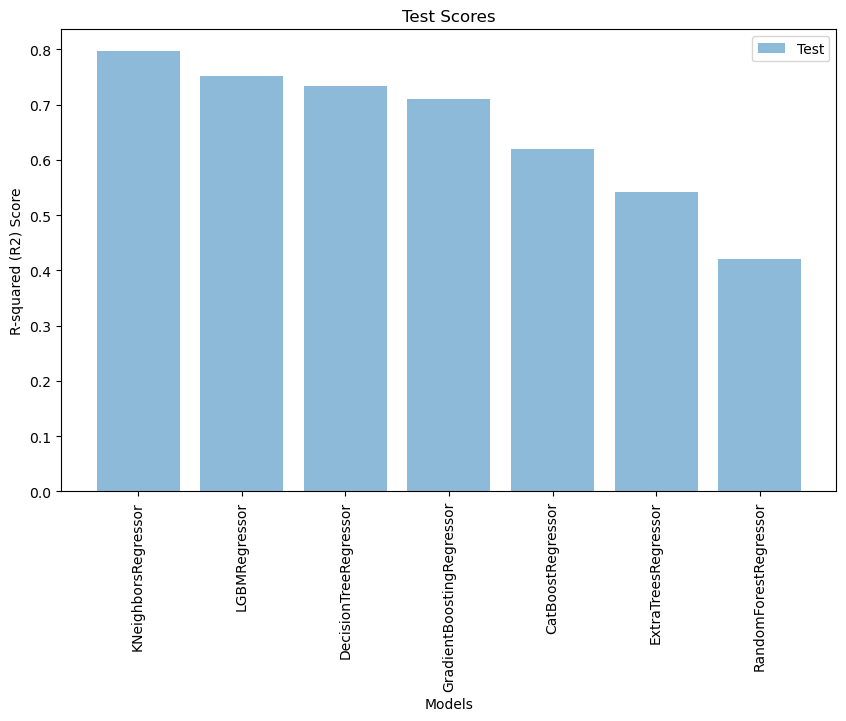

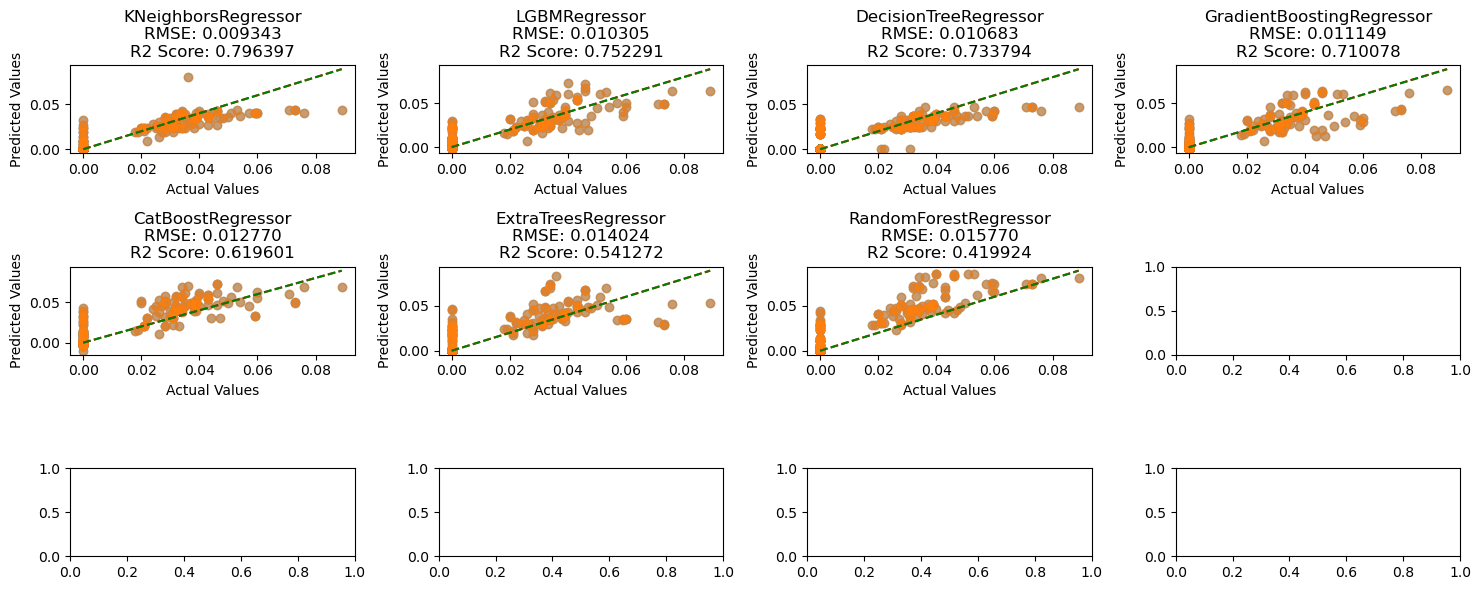

Model      RMSE  Adjusted R2        R2
0        KNeighborsRegressor  0.009343     0.786217  0.796397
5              LGBMRegressor  0.010305     0.739905  0.752291
1      DecisionTreeRegressor  0.010683     0.720483  0.733794
4  GradientBoostingRegressor  0.011149     0.695581  0.710078
6          CatBoostRegressor  0.012770     0.600581  0.619601
2        ExtraTreesRegressor  0.014024     0.518336  0.541272
3      RandomForestRegressor  0.015770     0.390920  0.419924

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import tensorflow as tf

# Create a list of model paths
#"""model_paths = [
#    r'C:\Users\Gaurang\Desktop\AEROSOL EXPERIMENT\Experiment-15_Nadam_0.00019068570691160858.h5',
#    r'C:\Users\Gaurang\Desktop\AEROSOL EXPERIMENT\Experiment-179_rms_0.00019928644178435206.h5',
#    r'C:\Users\Gaurang\Desktop\AEROSOL EXPERIMENT\Experiment-133_SGD_0.00020261939789634198.h5',
#    r'C:\Users\Gaurang\Desktop\AEROSOL EXPERIMENT\Experiment-169_rms_0.00020216763368807733.h5',
 #   r'C:\Users\Gaurang\Desktop\AEROSOL EXPERIMENT\Experiment-137_SGD_0.00020213007519487292.h5',
#    #r'D:\csv data preprocessing\saved_models\2\model\Aerosol_Model.h5'
#    # Add more model paths as needed
#]"""

# Define a function to generate a unique name for a neural network model based on its parameters
def generate_model_name(optimizer, counter):
    return f"NeuralNetwork_{optimizer}_{counter}"

# Create the individual regressor models with hyperparameters
models = [
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42),
    RandomForestRegressor(bootstrap=True, max_features=0.5,
                          min_samples_leaf=20, min_samples_split=14, n_estimators=100),
    #AdaBoostRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42),
 
    #xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42),
    lgb.LGBMRegressor(n_estimators=100, max_depth=3, random_state=42),
    cb.CatBoostRegressor(n_estimators=100, max_depth=3, silent=True, random_state=42),
]

# Fit the models and make predictions
model_names = []
train_scores = []
test_scores = []
model_predictions = []
rmse_values = []
adj_r2_values = []
r2_values = []
counter = 1

for model in models:
    if isinstance(model, tf.keras.models.Sequential):
        model_name = generate_model_name(model.optimizer.__class__.__name__, counter)
        model_names.append(model_name)
        train_score = model.evaluate(X_train_scaled, y_train)
        test_score = model.evaluate(X_test_scaled, y_test)
        model_predictions.append(model.predict(X_test_scaled))
    else:
        model.fit(X_train_scaled, y_train)
        model_name = type(model).__name__
        model_names.append(model_name)
        train_score = model.score(X_train_scaled, y_train)
        model_predictions.append(model.predict(X_test_scaled))
        test_score = model.score(X_test_scaled, y_test)

    # Calculate the evaluation metrics on the test set
    mse = mean_squared_error(y_test, model_predictions[-1])
    r2 = r2_score(y_test, model_predictions[-1])
    evs = explained_variance_score(y_test, model_predictions[-1])
    max_err = max_error(y_test, model_predictions[-1])
    adj_r2 = 1 - ((1 - r2) * (len(X_test_scaled) - 1)) / (len(X_test_scaled) - X_test_scaled.shape[1] - 1)

    print(f"Model: {model_name}")
    print(f"Train Score: {train_score}")
    print(f"Test Score: {test_score}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2) Score: {r2}")
    print(f"Adjusted R-squared Score: {adj_r2}")
    print(f"Explained Variance Score (EVS): {evs}")
    print(f"Max Error: {max_err}")
    print()

    # Append the test score, RMSE, adjusted R2, and R2 values
    train_scores.append(train_score)
    test_scores.append(test_score)
    rmse_values.append(np.sqrt(mse))
    adj_r2_values.append(adj_r2)
    r2_values.append(r2)
    counter += 1

# Iterate over the model paths and load each model
"""for model_path in model_paths:
    loaded_model = tf.keras.models.load_model(model_path)

    # Append the results of the loaded sequential model to the DataFrame
    optimizer_name = loaded_model.optimizer.__class__.__name__
    loaded_model_name = generate_model_name(optimizer_name, counter)
    model_predictions.append(loaded_model.predict(X_test_scaled))
    mse = mean_squared_error(y_test, model_predictions[-1])
    r2 = r2_score(y_test, model_predictions[-1])
    evs = explained_variance_score(y_test, model_predictions[-1])
    max_err = max_error(y_test, model_predictions[-1])
    adj_r2 = 1 - ((1 - r2) * (len(X_test_scaled) - 1)) / (len(X_test_scaled) - X_test_scaled.shape[1] - 1)

    model_names.append(loaded_model_name)
    train_scores.append(np.nan)
    test_scores.append(r2)
    rmse_values.append(np.sqrt(mse))
    adj_r2_values.append(adj_r2)
    r2_values.append(r2)
    counter += 1"""

# Create a DataFrame with RMSE, adjusted R2 score, and R2 score
results_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values,
    'Adjusted R2': adj_r2_values,
    'R2': r2_values
})

# Sort the models based on test scores in descending order
sorted_models = sorted(zip(model_names, test_scores, train_scores), key=lambda x: x[1], reverse=True)
sorted_model_names = [model[0] for model in sorted_models]
sorted_test_scores = [model[1] for model in sorted_models]
sorted_train_scores = [model[2] for model in sorted_models]

# Plot the train and test scores
plt.figure(figsize=(10, 6))
#plt.bar(sorted_model_names, sorted_train_scores, alpha=0.5, label='Train')
plt.bar(sorted_model_names, sorted_test_scores, alpha=0.5, label='Test')
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Score')
plt.title('Test Scores')
plt.xticks(rotation=90)
plt.legend()
plt.show()


# Sort the models based on RMSE in ascending order
sorted_rmse_models = sorted(zip(model_names, rmse_values), key=lambda x: x[1])
sorted_rmse_model_names = [model[0] for model in sorted_rmse_models]
sorted_rmse_values = [model[1] for model in sorted_rmse_models]

# Sort the models based on R2 score in descending order
sorted_r2_models = sorted(zip(model_names, r2_values), key=lambda x: x[1], reverse=True)
sorted_r2_model_names = [model[0] for model in sorted_r2_models]
sorted_r2_values = [model[1] for model in sorted_r2_models]

# Create a 2x5 grid of subplots for RMSE and R2 score sorted models
fig, axes = plt.subplots(3,4 , figsize=(15, 6))
axes = axes.flatten()

for i, (rmse_model_name, r2_model_name) in enumerate(zip(sorted_rmse_model_names, sorted_r2_model_names)):
    ax = axes[i]

    # Plot RMSE sorted models
    rmse_model_index = model_names.index(rmse_model_name)
    rmse_y_pred = model_predictions[rmse_model_index]
    ax.scatter(y_test, rmse_y_pred, alpha=0.5, label=f'RMSE: {sorted_rmse_values[i]:.6f}')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

    # Plot R2 score sorted models
    r2_model_index = model_names.index(r2_model_name)
    r2_y_pred = model_predictions[r2_model_index]
    ax.scatter(y_test, r2_y_pred, alpha=0.5, label=f'R2 Score: {sorted_r2_values[i]:.6f}')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--')

    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{rmse_model_name}\nRMSE: {sorted_rmse_values[i]:.6f}\nR2 Score: {sorted_r2_values[i]:.6f}')
    #ax.legend()

plt.tight_layout()
plt.show()

# Display the results DataFrame
results_df = results_df.sort_values(by=['Adjusted R2', 'RMSE'], ascending=[False, True])
results_df





In [10]:
# Create a dictionary to store the predictions and actual values for each model
predictions_dict = {}
sorted_model = sorted(zip(model_names, test_scores), key=lambda x: x[1], reverse=True)
# Iterate over the model names and predictions
for model_name, predictions in zip(sorted_model[:5], model_predictions[:5]):
    # Reshape the predictions array to 1-dimensional
    predictions = predictions.ravel()

    # Add the predictions and actual values to the dictionary
    predictions_dict['Actual'] = y_test

    predictions_dict[model_name] = predictions
   
# Create a DataFrame from the predictions dictionary
top_predictions_df = pd.DataFrame(predictions_dict)

# Display the DataFrame with the top 10 predictions and actual values for each model
top_10_predictions = top_predictions_df
top_10_predictions=top_10_predictions.drop_duplicates(subset=['Actual'], keep='first',ignore_index=True)

top_10_predictions.head()

Actual  (KNeighborsRegressor, 0.7963967615705534)  \
0   0.000                                     0.0000   
1   0.039                                     0.0342   
2   0.037                                     0.0342   
3   0.031                                     0.0330   
4   0.033                                     0.0238   

   (LGBMRegressor, 0.7522905500300596)  \
0                                0.000   
1                                0.033   
2                                0.033   
3                                0.033   
4                                0.025   

   (GradientBoostingRegressor, 0.7100775451923249)  \
0                                         0.000000   
1                                         0.042387   
2                                         0.049520   
3                                         0.034319   
4                                         0.029848   

   (CatBoostRegressor, 0.6196008706197832)  \
0                                 0.000537   
1                                 0.055444   
2                                 0.057185   
3                                 0.056149   
4                                 0.041685   

   (ExtraTreesRegressor, 0.5412720102285609)  
0                                   0.000220  
1                                   0.039834  
2                                   0.039226  
3                                   0.038425  
4                                   0.021987

In [11]:
# predicting results with 11 feature in neural network

In [12]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

experiment_df = pd.DataFrame() 
def run_experiment(experiment_name, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test,
                   epochs=200, batch_size=32, dropout_rate=0.3,
                   optimizer='Nadam', learning_rate=0.001, lr_scheduler=None,
                   best_model_weights=None):

    tf.random.set_seed(42)

    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu',input_shape=(10,)),
        
        tf.keras.layers.Dropout(dropout_rate),
        
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    if optimizer == 'Nadam':
        opt = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'rms':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError('Invalid optimizer')

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    callbacks = [early_stop]
    if lr_scheduler is not None:
        callbacks.append(LearningRateScheduler(lr_scheduler))

    if best_model_weights is not None:
        model.load_weights(best_model_weights)

    history = model.fit(
        X_train_scaled, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test_scaled, y_test),
        callbacks=callbacks
    )

   


    mse = model.evaluate(X_test_scaled, y_test)
    y_pred = model.predict(X_test_scaled)

    r2_train = r2_score(y_train, model.predict(X_train_scaled))
    r2_test = r2_score(y_test, y_pred)
    n = len(X_test_scaled)
    p = X_test_scaled.shape[1]
    adj_r2_test = 1 - ((1 - r2_test) * (n - 1)) / (n - p - 1)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)#
    rmse = np.sqrt(mse)

    #input_layer = model.layers[0]
    #input_feature_names = list(input_layer.get_config()['batch_input_shape'][1:])
    
    weights = model.layers[0].get_weights()[0]
    importance_scores = np.abs(weights).mean(axis=1)

    # Plot the feature importance scores
    plt.bar(range(len(importance_scores)), importance_scores)
    plt.xlabel('Feature Index')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance')
    


    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Values')
    plt.show()
    
    
    a = plt.axes(aspect='equal')
    plt.scatter(y_test , y_pred)
    plt.xlabel('True Values ')
    plt.ylabel('Predictions')
    lims = [0, 0.150]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)


    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    model.save(f'{experiment_name}_{optimizer}_{mse}.h5')

    experiment_results = {
        'Experiment Name': experiment_name,
        'Optimizer': optimizer,
        'Learning Rate': learning_rate,
        'Batch Size': batch_size,
        'Dropout Rate': dropout_rate,
        'MSE': mse,
        'RMSE':rmse,
        'R2 Score (Training Set)': r2_train,
        'R2 Score (Test Set)': r2_test,
        'Adjusted R2 Score (Test Set)': adj_r2_test,
        'MAE': mae,
  
    }
    global experiment_df
    if experiment_df is None:
        experiment_df = pd.DataFrame([experiment_results])
    else:
        experiment_df = experiment_df.append(experiment_results, ignore_index=True)
        experiment_df = experiment_df.sort_values(by=['MSE', 'R2 Score (Test Set)'], ascending=[True, False])
        # Save updated experiment DataFrame to CSV file
        experiment_df.to_csv('experiment_results_10_final_feature.csv', index=False)
        
    return experiment_df

# Example usage with learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 150:
        return lr
    else:
        return lr * tf.math.exp(-0.1)





Epoch 1/200
110/110 [==============================] - 4s 22ms/step - loss: 0.0015 - val_loss: 8.5626e-04 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 2s 19ms/step - loss: 4.0335e-04 - val_loss: 9.5302e-04 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 2s 19ms/step - loss: 3.0957e-04 - val_loss: 4.9760e-04 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 2s 19ms/step - loss: 2.2901e-04 - val_loss: 5.2148e-04 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 2s 19ms/step - loss: 2.8218e-04 - val_loss: 4.3884e-04 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 2s 20ms/step - loss: 2.0646e-04 - val_loss: 5.1436e-04 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 2s 20ms/step - loss: 2.0569e-04 - val_loss: 5.1082e-04 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 2s 20ms/step - loss: 1.7870e-04 - val_loss: 3.3376e-04 - lr: 0.0010
Epoch 9/200
110/110 

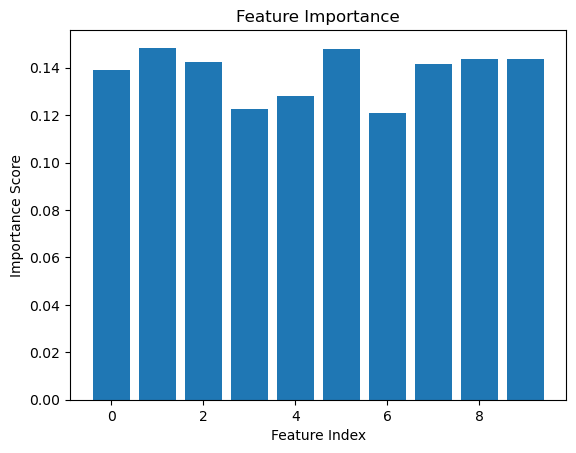

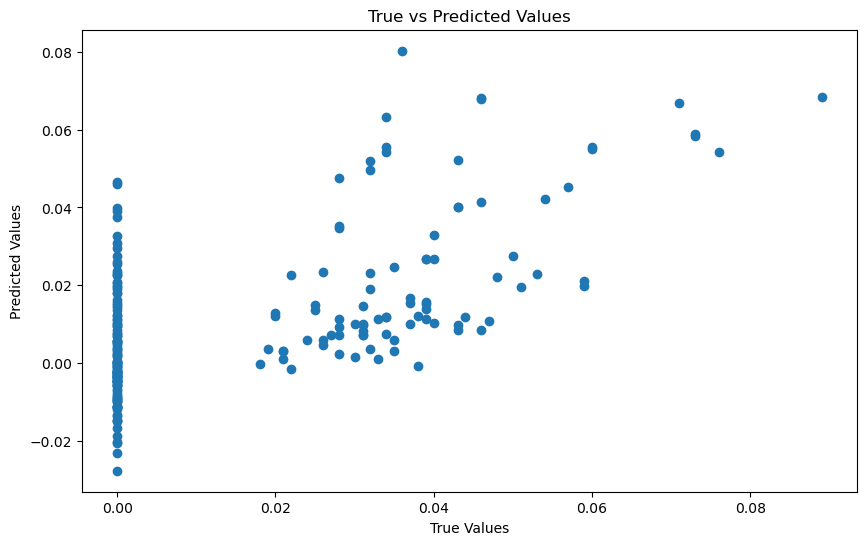

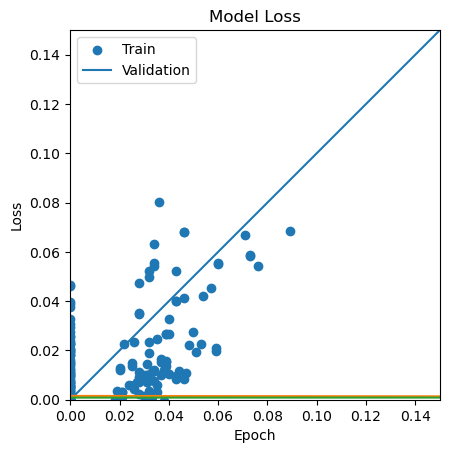

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 3s 22ms/step - loss: 0.0071 - val_loss: 0.0031 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 2s 20ms/step - loss: 0.0013 - val_loss: 7.2666e-04 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 2s 21ms/step - loss: 8.2074e-04 - val_loss: 4.6747e-04 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 2s 21ms/step - loss: 6.8922e-04 - val_loss: 1.9134e-04 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 2s 20ms/step - loss: 5.8350e-04 - val_loss: 2.8206e-04 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 2s 22ms/step - loss: 5.0785e-04 - val_loss: 9.7249e-05 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 2s 22ms/step - loss: 4.7766e-04 - val_loss: 1.3532e-04 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 3s 23ms/step - loss: 4.2731e-04 - val_loss: 9.2929e-05 - lr: 0.0010
Epoch 9/200
110/110 [===================

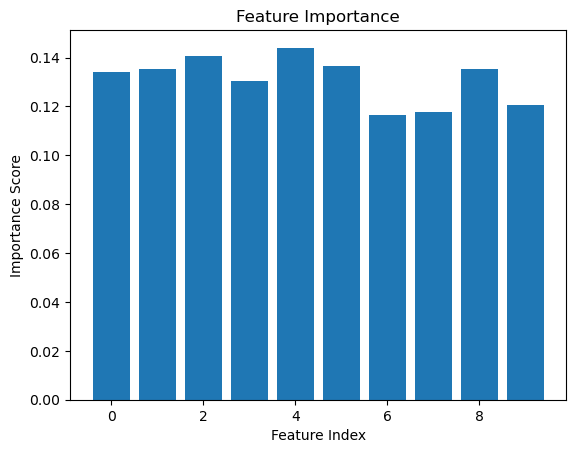

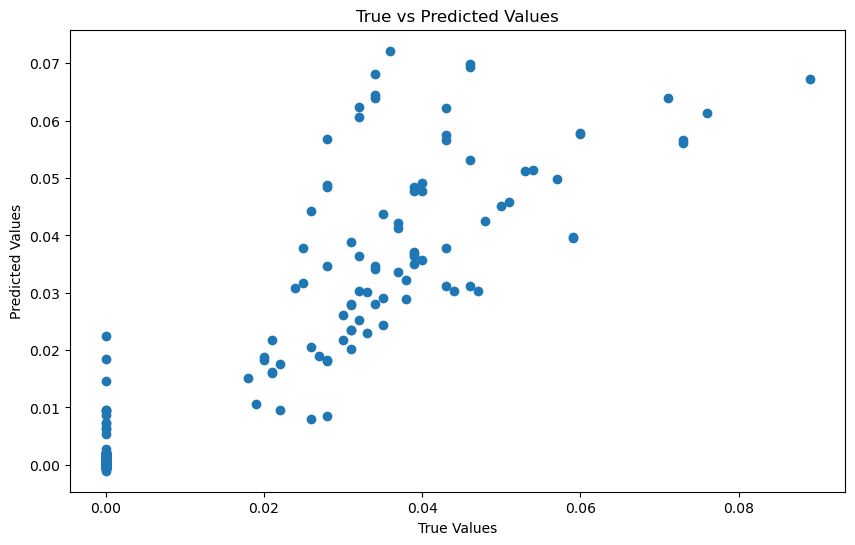

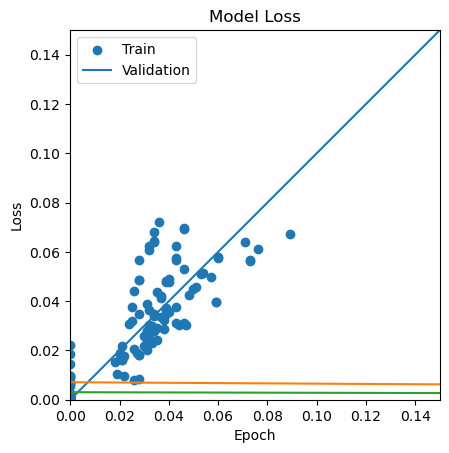

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 3s 22ms/step - loss: 0.0092 - val_loss: 5.2908e-04 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 2s 21ms/step - loss: 0.0021 - val_loss: 3.0042e-04 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 2s 22ms/step - loss: 0.0013 - val_loss: 2.0884e-04 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 2s 21ms/step - loss: 9.3655e-04 - val_loss: 1.1514e-04 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 2s 21ms/step - loss: 8.3029e-04 - val_loss: 1.3947e-04 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 2s 21ms/step - loss: 6.8720e-04 - val_loss: 1.1029e-04 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 2s 21ms/step - loss: 6.0386e-04 - val_loss: 8.9073e-05 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 2s 21ms/step - loss: 5.5465e-04 - val_loss: 7.0153e-05 - lr: 0.0010
Epoch 9/200
110/110 [===================

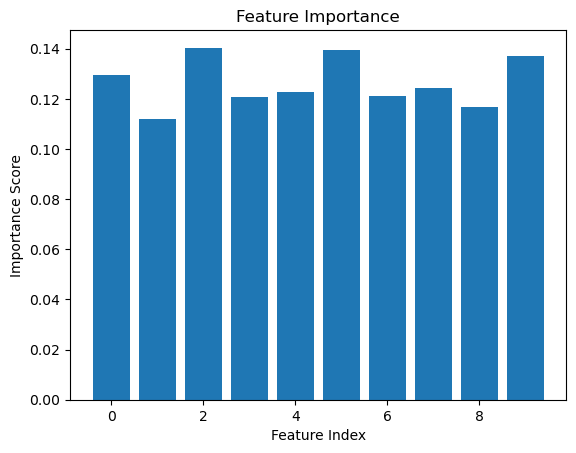

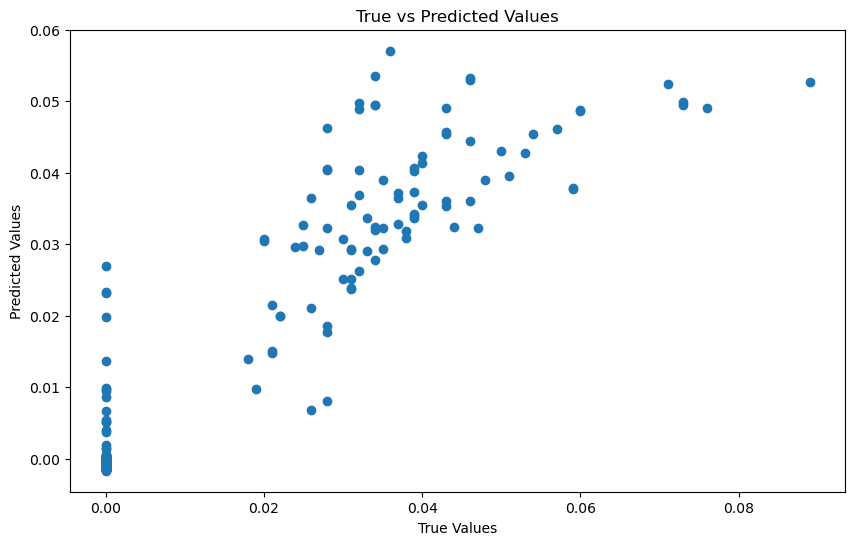

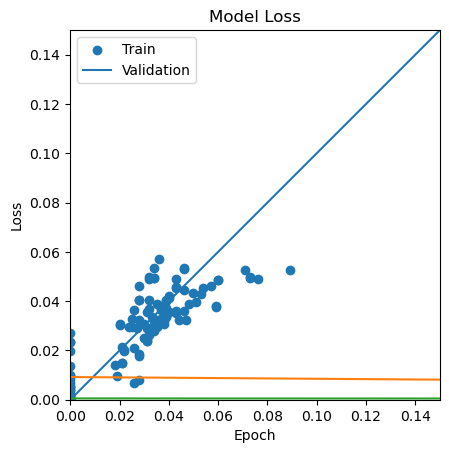

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 2s 22ms/step - loss: 0.0017 - val_loss: 7.1444e-04 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 20ms/step - loss: 3.9000e-04 - val_loss: 5.9741e-04 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 20ms/step - loss: 3.0158e-04 - val_loss: 7.0195e-04 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 20ms/step - loss: 3.1640e-04 - val_loss: 0.0013 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 20ms/step - loss: 2.2773e-04 - val_loss: 0.0020 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 20ms/step - loss: 2.6398e-04 - val_loss: 0.0012 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 20ms/step - loss: 1.6688e-04 - val_loss: 0.0014 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 19ms/step - loss: 1.9506e-04 - val_loss: 0.0012 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 20ms/step - 

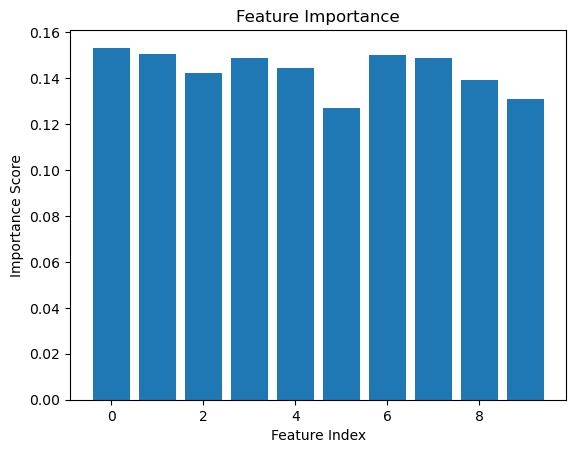

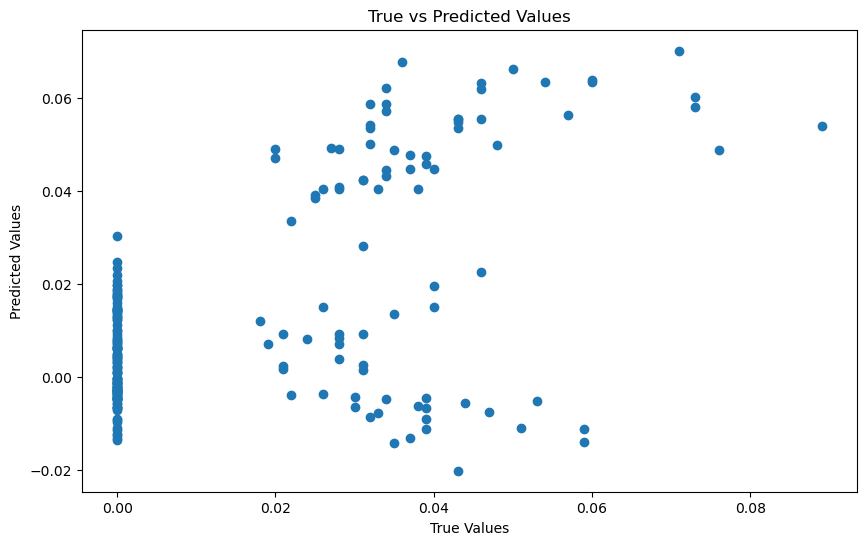

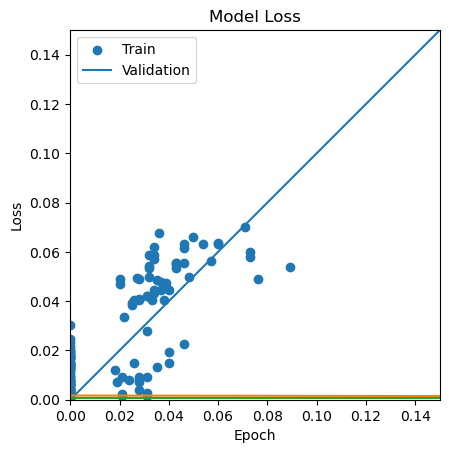

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 2s 23ms/step - loss: 0.0065 - val_loss: 0.0021 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 21ms/step - loss: 0.0016 - val_loss: 7.8867e-04 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 21ms/step - loss: 0.0010 - val_loss: 3.2572e-04 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 21ms/step - loss: 7.7931e-04 - val_loss: 3.6528e-04 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 21ms/step - loss: 6.9273e-04 - val_loss: 2.4524e-04 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 20ms/step - loss: 5.8997e-04 - val_loss: 2.8649e-04 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 21ms/step - loss: 5.5113e-04 - val_loss: 1.9816e-04 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 21ms/step - loss: 5.2211e-04 - val_loss: 2.0352e-04 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 21ms

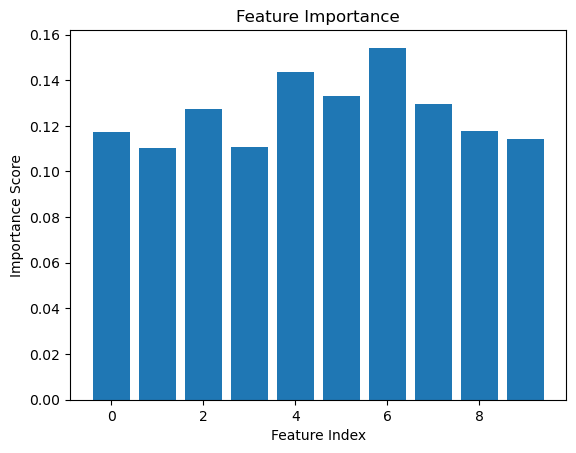

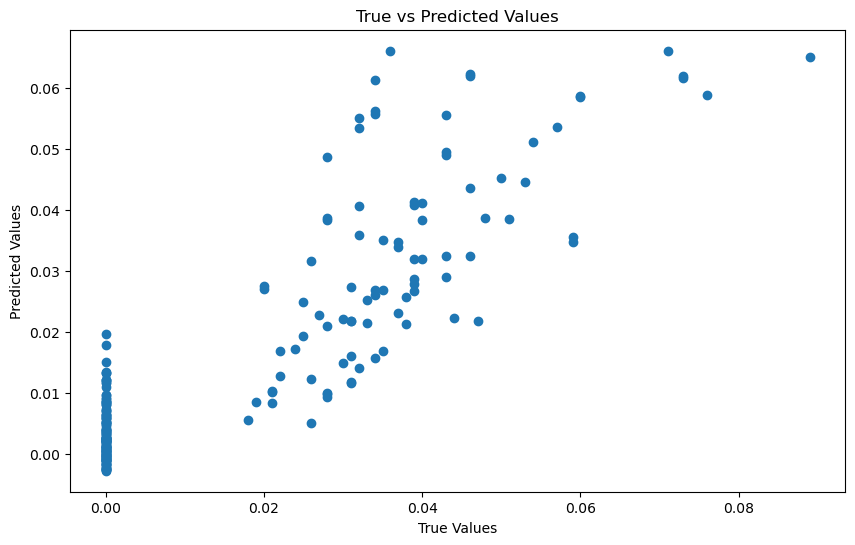

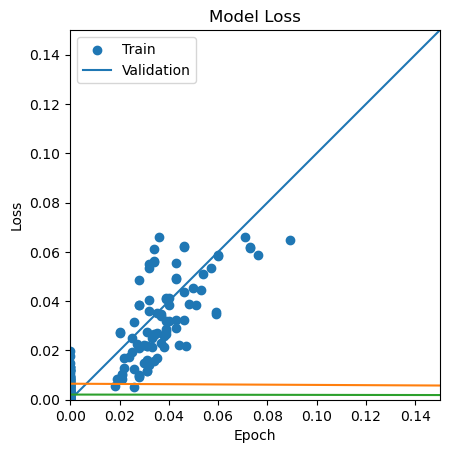

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 2s 23ms/step - loss: 0.0142 - val_loss: 7.1512e-04 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 21ms/step - loss: 0.0033 - val_loss: 5.6418e-04 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 20ms/step - loss: 0.0018 - val_loss: 6.0913e-04 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 21ms/step - loss: 0.0014 - val_loss: 7.2620e-04 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 21ms/step - loss: 0.0011 - val_loss: 4.4047e-04 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 20ms/step - loss: 0.0010 - val_loss: 4.6145e-04 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 21ms/step - loss: 8.3995e-04 - val_loss: 3.1329e-04 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 21ms/step - loss: 8.5812e-04 - val_loss: 1.8400e-04 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 20ms/step - 

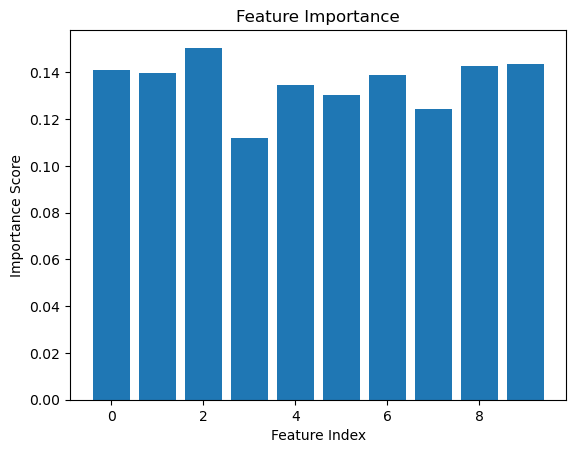

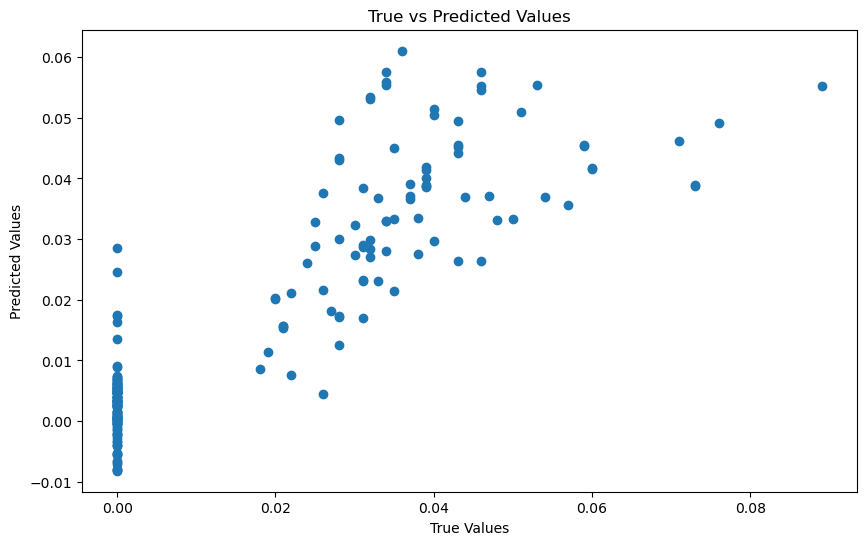

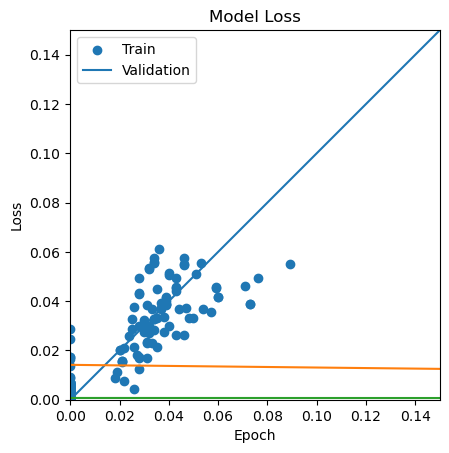

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 2s 25ms/step - loss: 0.0029 - val_loss: 0.0035 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 1s 20ms/step - loss: 3.0418e-04 - val_loss: 0.0058 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 1s 21ms/step - loss: 7.4063e-04 - val_loss: 0.0018 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 1s 21ms/step - loss: 4.1811e-04 - val_loss: 0.0020 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 1s 21ms/step - loss: 3.5939e-04 - val_loss: 0.0027 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 1s 21ms/step - loss: 4.9753e-04 - val_loss: 0.0011 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 1s 21ms/step - loss: 1.6116e-04 - val_loss: 0.0016 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 1s 20ms/step - loss: 2.3617e-04 - val_loss: 7.6232e-04 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 1s 21ms/step - loss: 2.

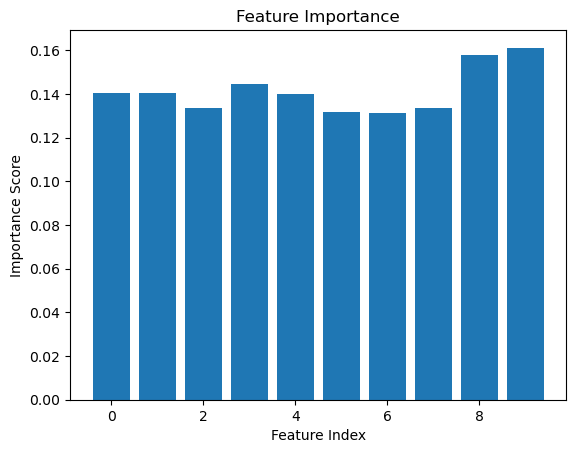

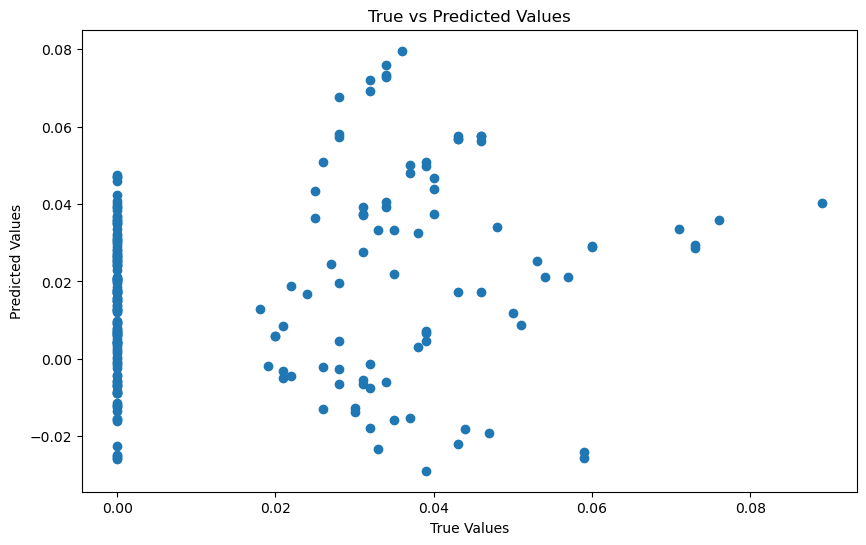

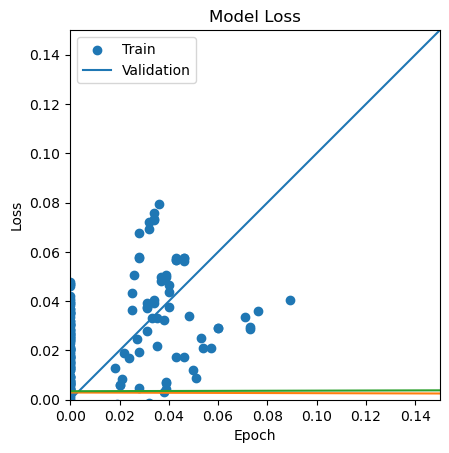

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 2s 27ms/step - loss: 0.0088 - val_loss: 8.1973e-04 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 1s 22ms/step - loss: 0.0021 - val_loss: 0.0013 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 1s 21ms/step - loss: 0.0013 - val_loss: 5.3320e-04 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 1s 21ms/step - loss: 0.0010 - val_loss: 7.3644e-04 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 1s 22ms/step - loss: 7.9967e-04 - val_loss: 4.7114e-04 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 1s 21ms/step - loss: 7.3642e-04 - val_loss: 3.4482e-04 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 1s 22ms/step - loss: 6.7499e-04 - val_loss: 6.2495e-04 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 1s 22ms/step - loss: 5.9034e-04 - val_loss: 5.9584e-04 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 1s 21ms/ste

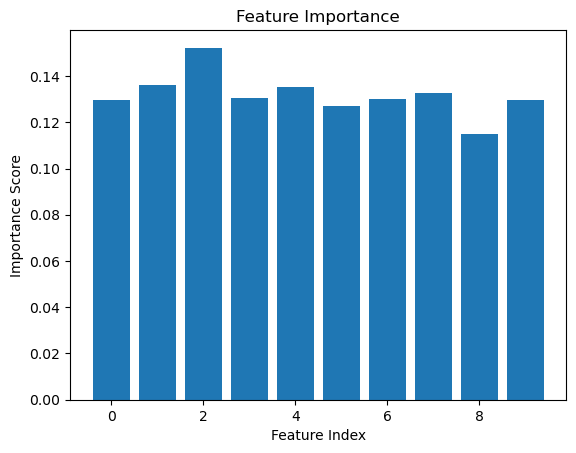

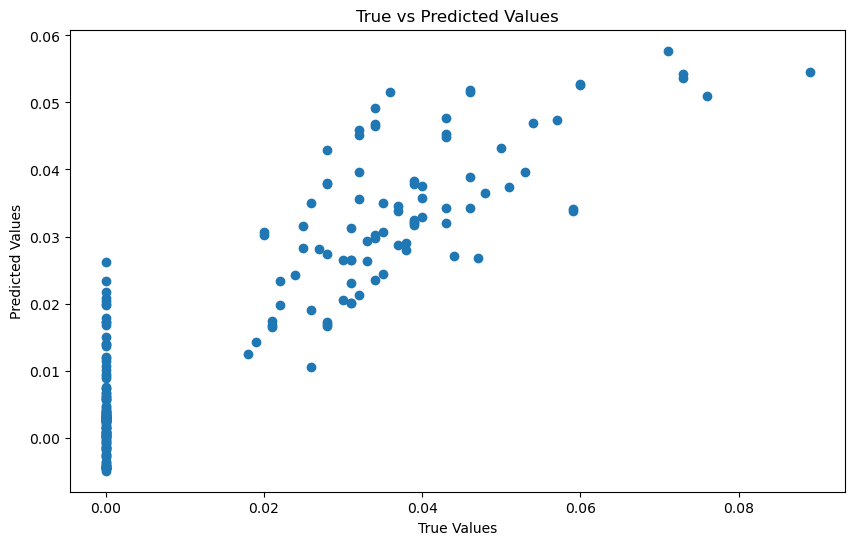

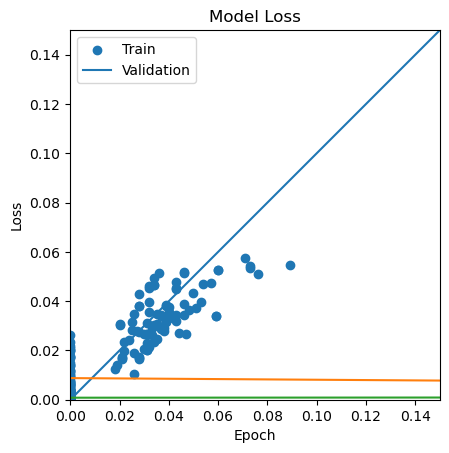

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 2s 27ms/step - loss: 0.0166 - val_loss: 0.0011 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 1s 21ms/step - loss: 0.0040 - val_loss: 9.1319e-04 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 1s 21ms/step - loss: 0.0025 - val_loss: 4.4696e-04 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 1s 22ms/step - loss: 0.0018 - val_loss: 4.5432e-04 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 1s 22ms/step - loss: 0.0014 - val_loss: 2.5221e-04 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 1s 22ms/step - loss: 0.0011 - val_loss: 1.5595e-04 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 1s 22ms/step - loss: 9.6524e-04 - val_loss: 1.9344e-04 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 1s 20ms/step - loss: 9.4700e-04 - val_loss: 2.7092e-04 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 1s 22ms/step - loss

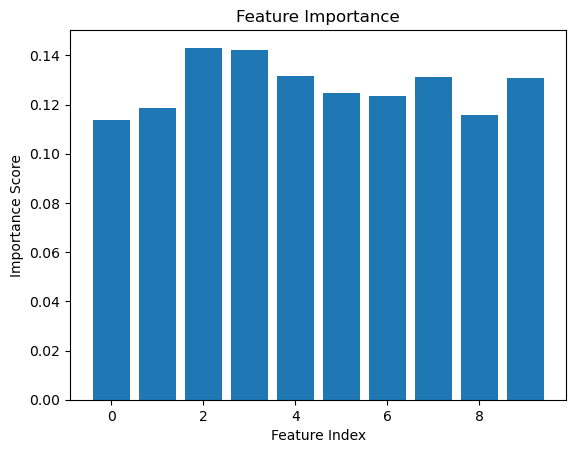

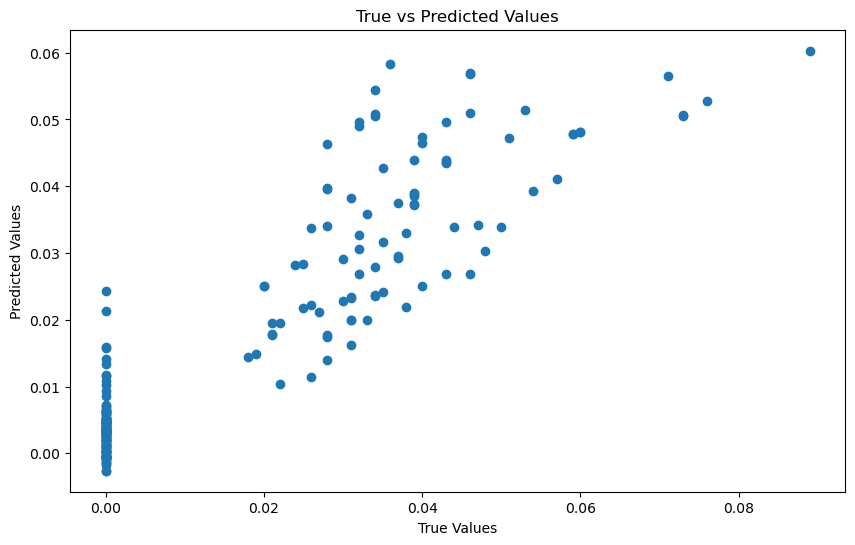

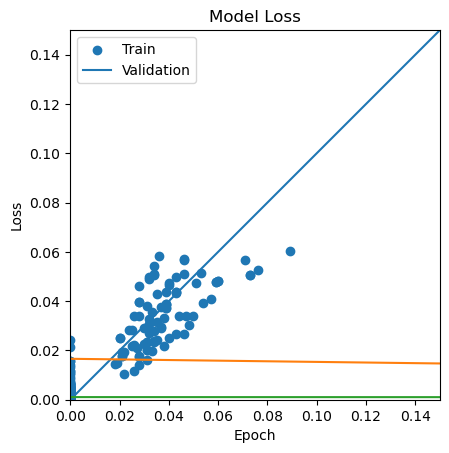

C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epoch 1/200
110/110 [==============================] - 3s 21ms/step - loss: 0.0274 - val_loss: 2.0718e-04 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 2s 20ms/step - loss: 2.7662e-04 - val_loss: 3.7620e-04 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 2s 19ms/step - loss: 2.5898e-04 - val_loss: 2.3344e-04 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 2s 19ms/step - loss: 2.2656e-04 - val_loss: 1.2441e-04 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 2s 19ms/step - loss: 2.2691e-04 - val_loss: 2.2032e-04 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 2s 19ms/step - loss: 2.0052e-04 - val_loss: 2.5594e-04 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 2s 20ms/step - loss: 2.0291e-04 - val_loss: 2.5003e-04 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 2s 20ms/step - loss: 1.7473e-04 - val_loss: 4.0203e-04 - lr: 0.0100
Epoch 9/200
110/110 

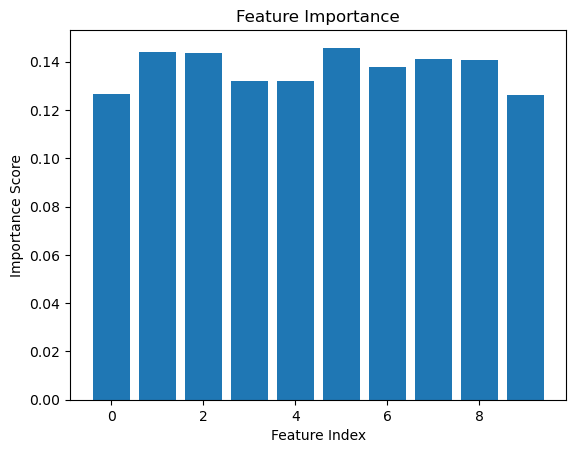

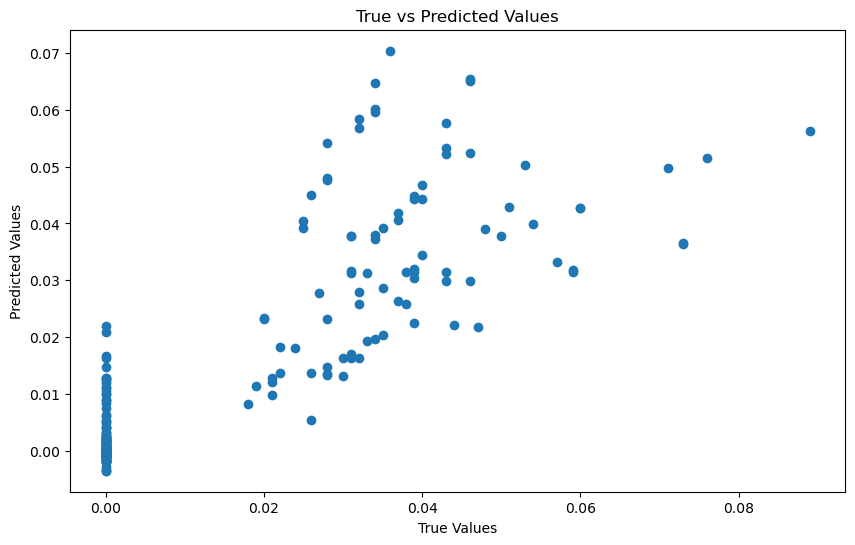

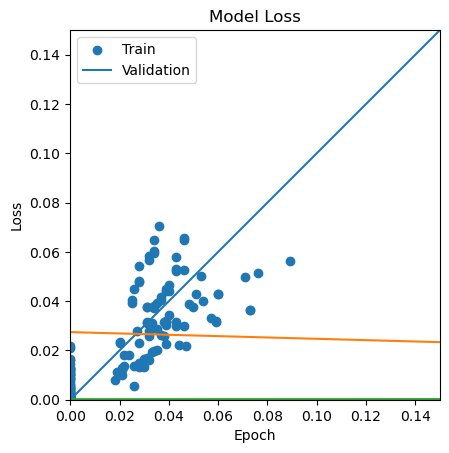

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 3s 22ms/step - loss: 0.0120 - val_loss: 2.7094e-04 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 2s 20ms/step - loss: 4.7605e-04 - val_loss: 8.0806e-05 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 2s 20ms/step - loss: 4.0719e-04 - val_loss: 1.0936e-04 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 2s 20ms/step - loss: 3.8539e-04 - val_loss: 8.7328e-05 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 2s 20ms/step - loss: 3.4743e-04 - val_loss: 1.0825e-04 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 2s 21ms/step - loss: 3.2167e-04 - val_loss: 8.2857e-05 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 2s 20ms/step - loss: 3.0789e-04 - val_loss: 8.9869e-05 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 2s 20ms/step - loss: 3.2048e-04 - val_loss: 9.5683e-05 - lr: 0.0100
Epoch 9/200
110/110 [===========

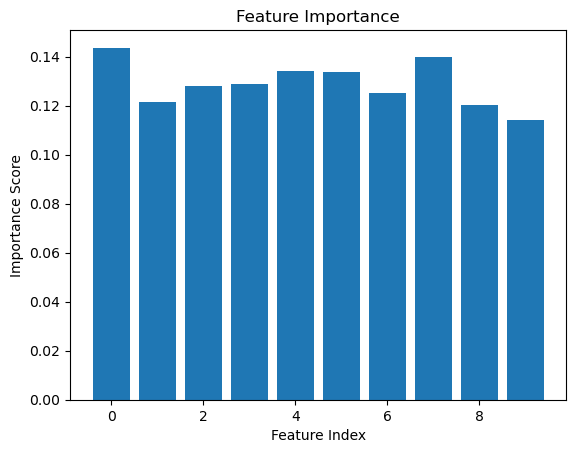

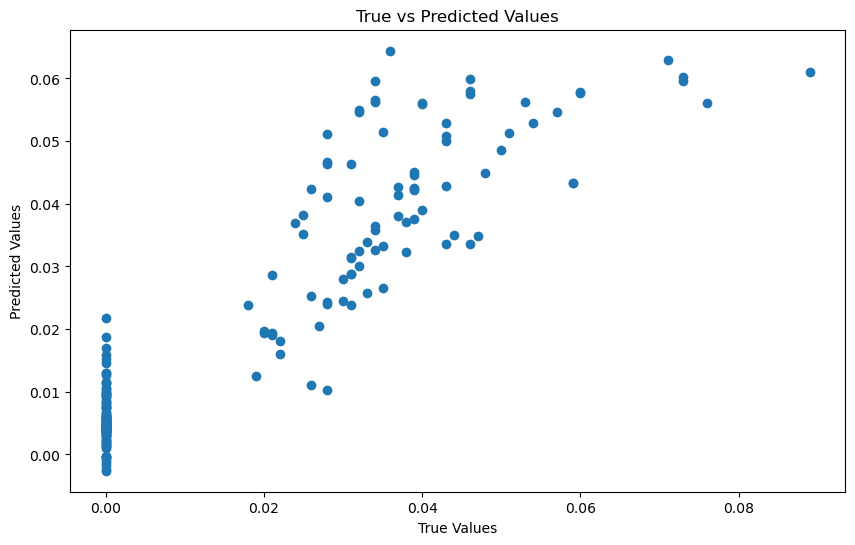

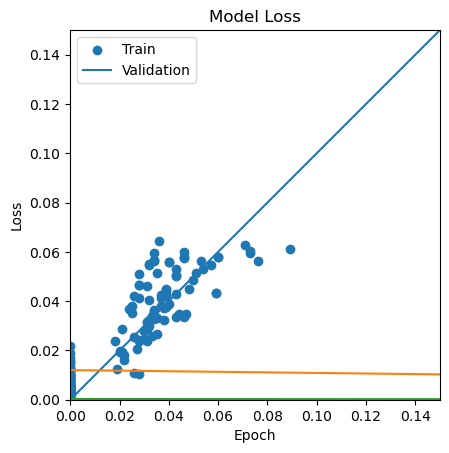

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 4s 25ms/step - loss: 0.0159 - val_loss: 3.3825e-04 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 2s 22ms/step - loss: 6.8082e-04 - val_loss: 1.4165e-04 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 2s 21ms/step - loss: 5.0818e-04 - val_loss: 2.1184e-04 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 2s 21ms/step - loss: 4.8924e-04 - val_loss: 8.0621e-05 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 2s 21ms/step - loss: 4.2026e-04 - val_loss: 1.3453e-04 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 2s 21ms/step - loss: 4.0912e-04 - val_loss: 1.1295e-04 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 2s 21ms/step - loss: 3.8087e-04 - val_loss: 7.2077e-05 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 2s 21ms/step - loss: 3.5046e-04 - val_loss: 9.1533e-05 - lr: 0.0100
Epoch 9/200
110/110 [===========

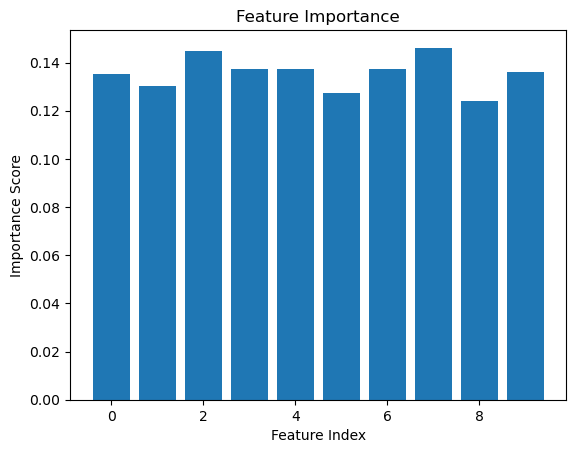

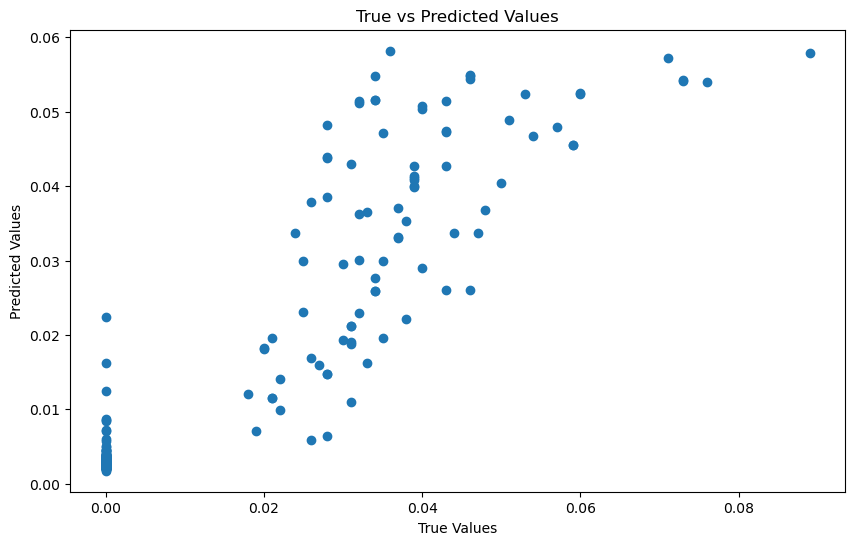

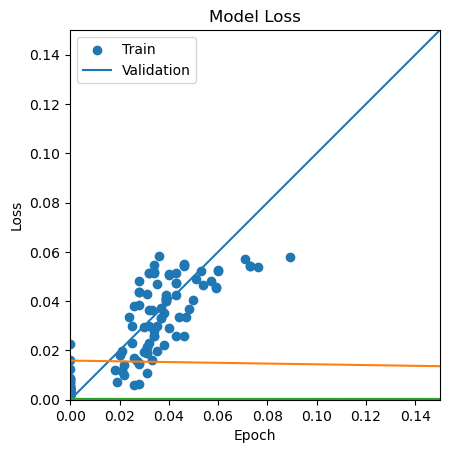

C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epoch 1/200
55/55 [==============================] - 3s 28ms/step - loss: 0.0164 - val_loss: 7.4406e-04 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 17ms/step - loss: 2.6113e-04 - val_loss: 3.6775e-04 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 18ms/step - loss: 2.5706e-04 - val_loss: 2.9571e-04 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 25ms/step - loss: 2.2716e-04 - val_loss: 2.8316e-04 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 20ms/step - loss: 1.9137e-04 - val_loss: 4.2089e-04 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 21ms/step - loss: 2.0790e-04 - val_loss: 1.7691e-04 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 21ms/step - loss: 1.6527e-04 - val_loss: 1.8886e-04 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 20ms/step - loss: 1.7151e-04 - val_loss: 4.1581e-04 - lr: 0.0100
Epoch 9/200
55/55 [=================

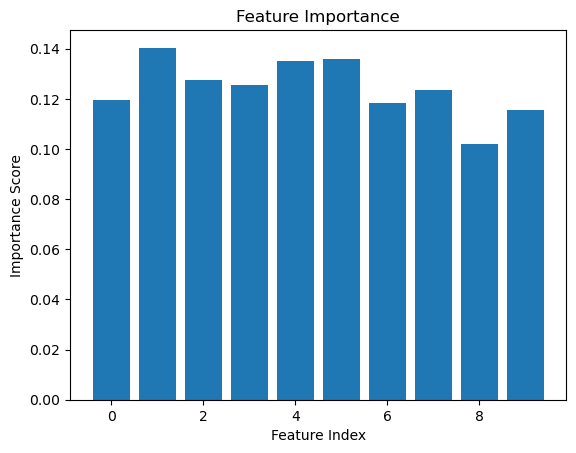

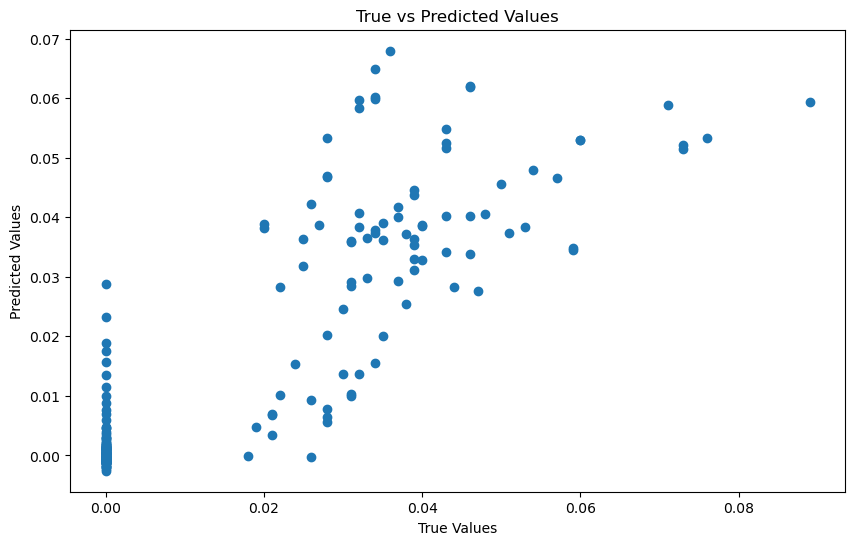

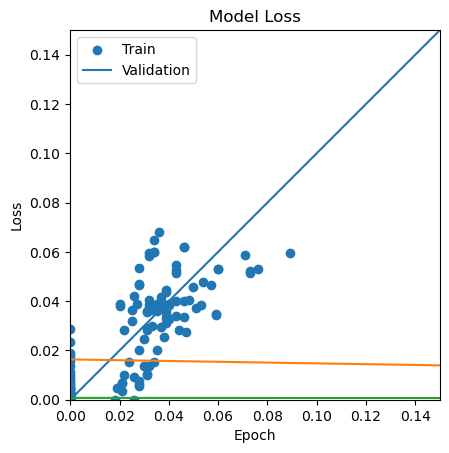

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 2s 24ms/step - loss: 0.0125 - val_loss: 1.3360e-04 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 20ms/step - loss: 5.1376e-04 - val_loss: 1.8027e-04 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 20ms/step - loss: 4.2101e-04 - val_loss: 1.4258e-04 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 21ms/step - loss: 3.5777e-04 - val_loss: 1.0355e-04 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 20ms/step - loss: 3.9073e-04 - val_loss: 1.1321e-04 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 21ms/step - loss: 3.7798e-04 - val_loss: 7.8225e-05 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 21ms/step - loss: 3.4449e-04 - val_loss: 8.9875e-05 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 21ms/step - loss: 3.0328e-04 - val_loss: 7.9760e-05 - lr: 0.0100
Epoch 9/200
55/55 [=============================

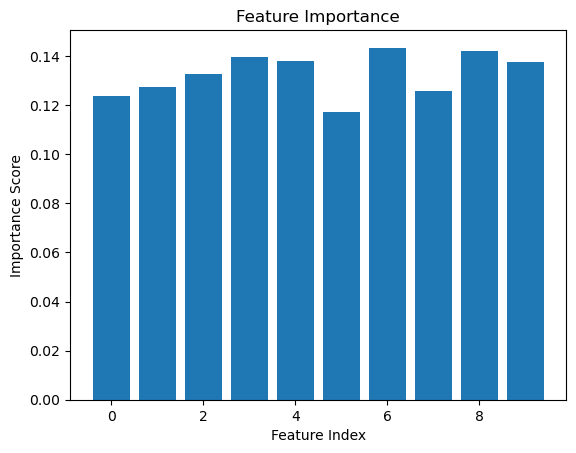

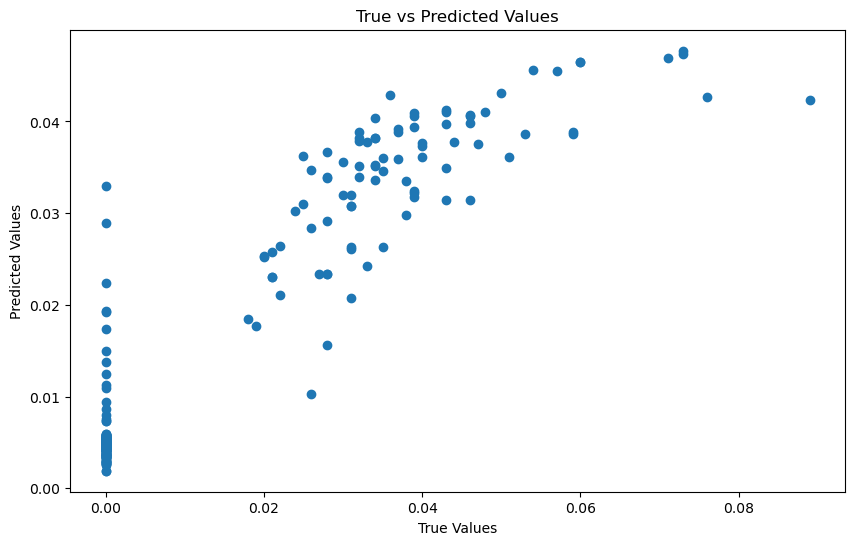

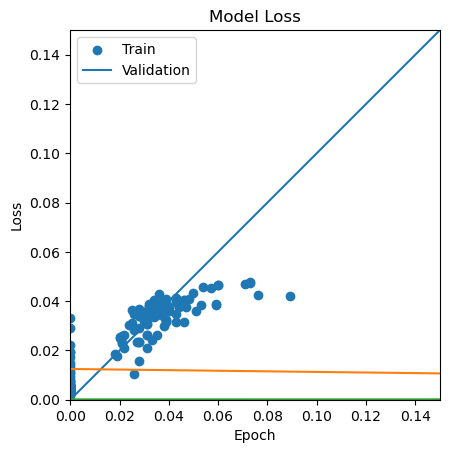

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 2s 23ms/step - loss: 0.0340 - val_loss: 8.9753e-05 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 21ms/step - loss: 7.3298e-04 - val_loss: 3.4438e-04 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 20ms/step - loss: 6.0654e-04 - val_loss: 1.2927e-04 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 21ms/step - loss: 4.8221e-04 - val_loss: 7.3284e-05 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 21ms/step - loss: 4.5580e-04 - val_loss: 7.9355e-05 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 21ms/step - loss: 4.7535e-04 - val_loss: 8.5175e-05 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 21ms/step - loss: 4.0776e-04 - val_loss: 6.9043e-05 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 21ms/step - loss: 4.1402e-04 - val_loss: 1.1513e-04 - lr: 0.0100
Epoch 9/200
55/55 [=============================

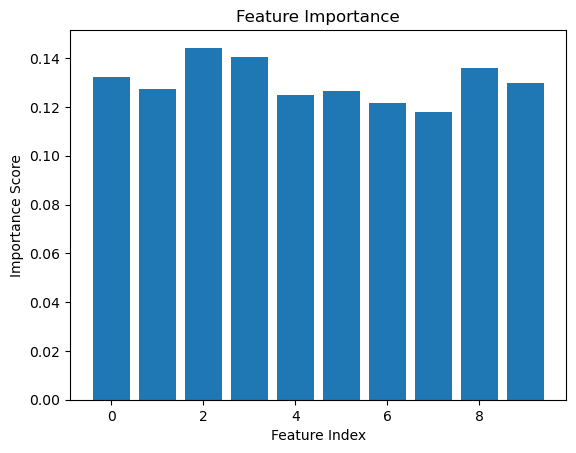

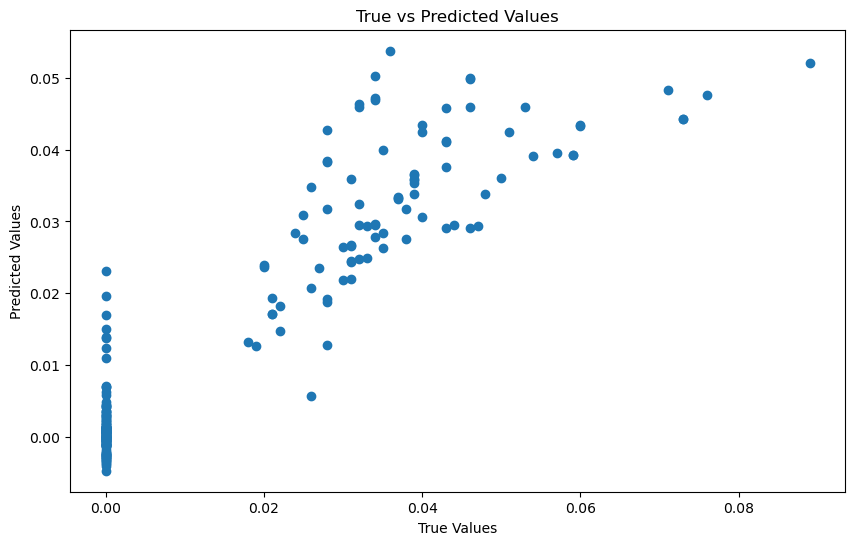

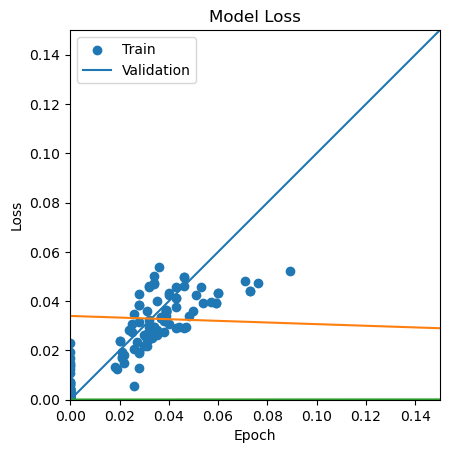

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 2s 29ms/step - loss: 0.0786 - val_loss: 0.0012 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 1s 23ms/step - loss: 3.0563e-04 - val_loss: 6.3941e-04 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 1s 23ms/step - loss: 2.5459e-04 - val_loss: 5.0628e-04 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 1s 22ms/step - loss: 2.2174e-04 - val_loss: 3.4944e-04 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 1s 21ms/step - loss: 2.2396e-04 - val_loss: 2.9763e-04 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 1s 20ms/step - loss: 2.6535e-04 - val_loss: 2.7128e-04 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 1s 20ms/step - loss: 1.9437e-04 - val_loss: 2.6557e-04 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 1s 24ms/step - loss: 1.6136e-04 - val_loss: 2.7633e-04 - lr: 0.0100
Epoch 9/200
28/28 [==============================] -

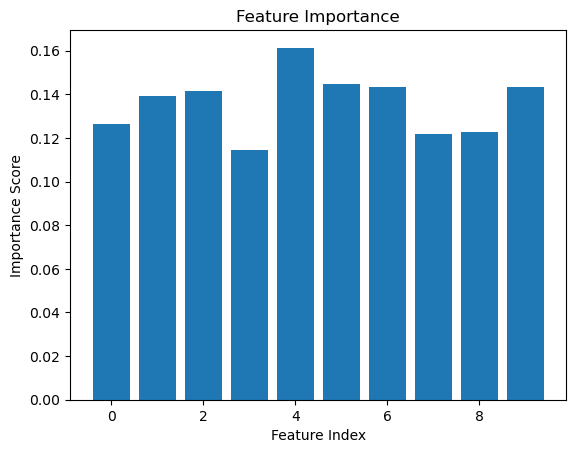

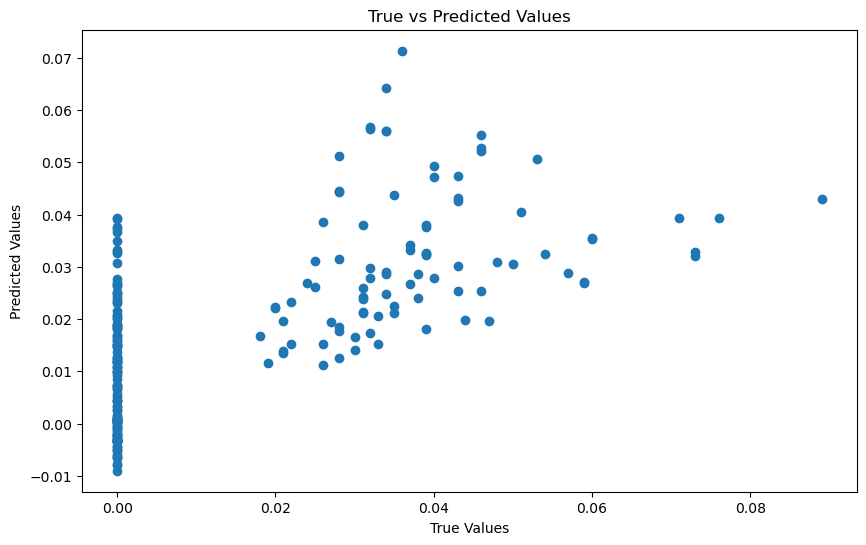

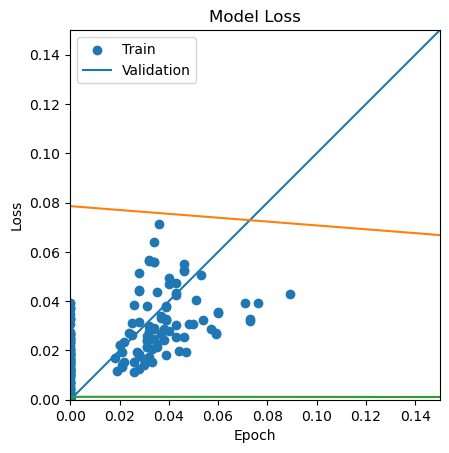

C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epoch 1/200
28/28 [==============================] - 2s 27ms/step - loss: 0.0877 - val_loss: 2.0313e-04 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 1s 21ms/step - loss: 6.8322e-04 - val_loss: 1.5444e-04 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 1s 21ms/step - loss: 5.3860e-04 - val_loss: 1.1057e-04 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 1s 21ms/step - loss: 5.0434e-04 - val_loss: 1.4429e-04 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 1s 21ms/step - loss: 4.6333e-04 - val_loss: 1.3298e-04 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 1s 21ms/step - loss: 4.4112e-04 - val_loss: 7.9190e-05 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 1s 21ms/step - loss: 3.9127e-04 - val_loss: 9.7354e-05 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 1s 21ms/step - loss: 3.9090e-04 - val_loss: 1.0292e-04 - lr: 0.0100
Epoch 9/200
28/28 [=================

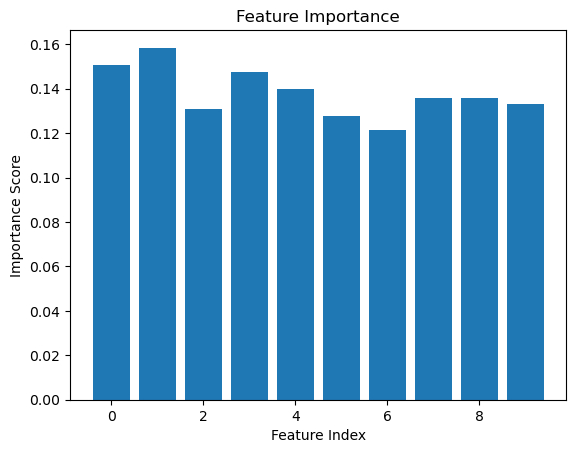

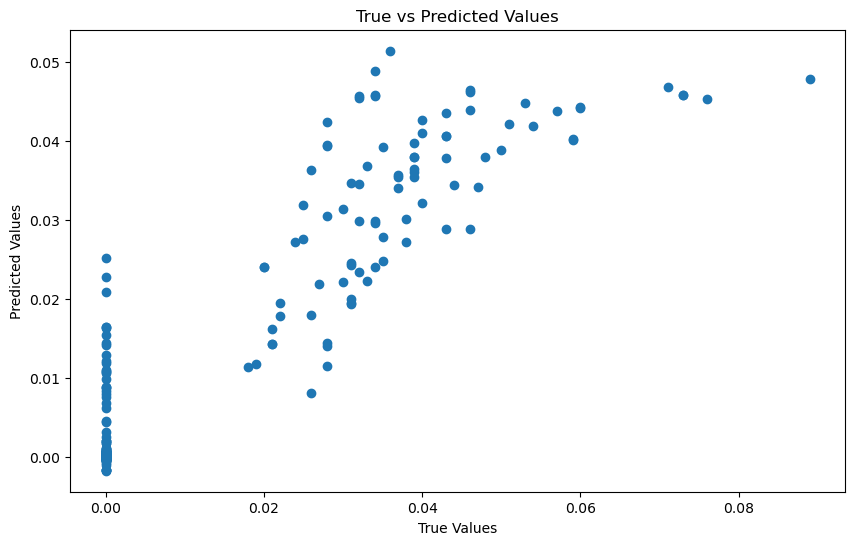

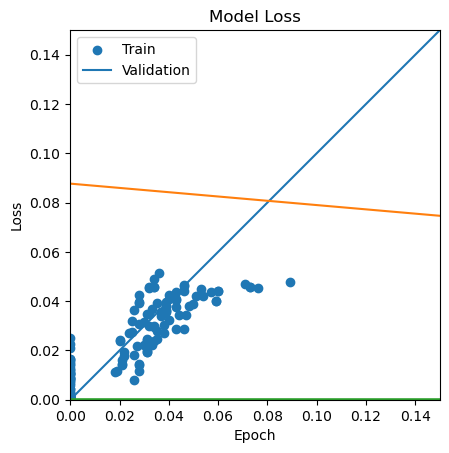

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 2s 35ms/step - loss: 0.0800 - val_loss: 1.8710e-04 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 1s 22ms/step - loss: 8.3215e-04 - val_loss: 1.2206e-04 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 1s 22ms/step - loss: 7.0233e-04 - val_loss: 1.1996e-04 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 1s 21ms/step - loss: 5.7008e-04 - val_loss: 1.5211e-04 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 1s 21ms/step - loss: 5.7031e-04 - val_loss: 1.4177e-04 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 1s 21ms/step - loss: 5.1974e-04 - val_loss: 1.9837e-04 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 1s 23ms/step - loss: 5.1429e-04 - val_loss: 1.0087e-04 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 1s 23ms/step - loss: 4.4859e-04 - val_loss: 8.5323e-05 - lr: 0.0100
Epoch 9/200
28/28 [=============================

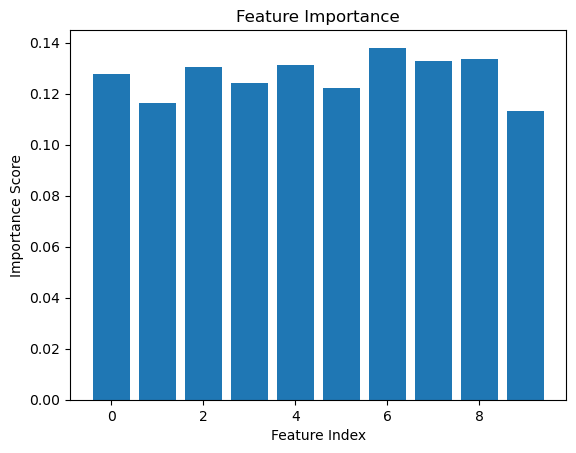

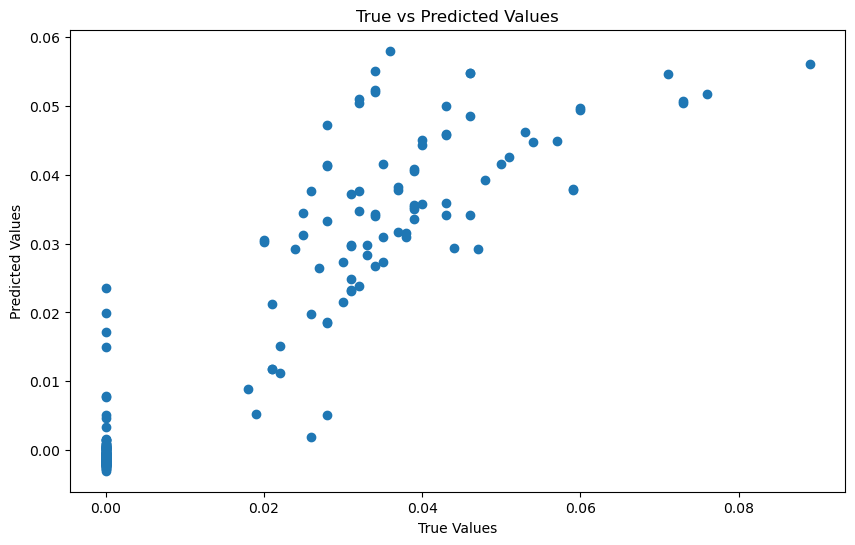

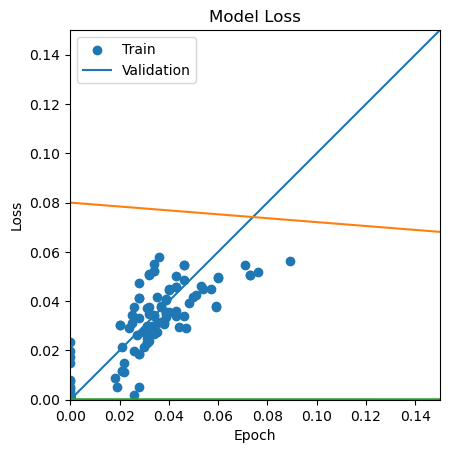

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 11ms/step - loss: 0.0013 - val_loss: 0.0014 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 1s 10ms/step - loss: 2.8977e-04 - val_loss: 0.0026 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 1s 10ms/step - loss: 3.7891e-04 - val_loss: 8.6493e-04 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 1s 10ms/step - loss: 2.4252e-04 - val_loss: 6.5094e-04 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 1s 10ms/step - loss: 2.0177e-04 - val_loss: 7.7948e-04 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 1s 10ms/step - loss: 1.8929e-04 - val_loss: 0.0011 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 1s 10ms/step - loss: 2.0105e-04 - val_loss: 7.7517e-04 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 1s 10ms/step - loss: 1.9449e-04 - val_loss: 0.0010 - lr: 0.0010
Epoch 9/200
110/110 [===========================

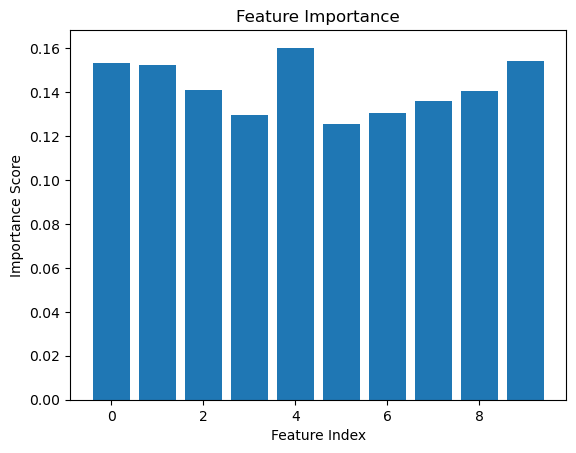

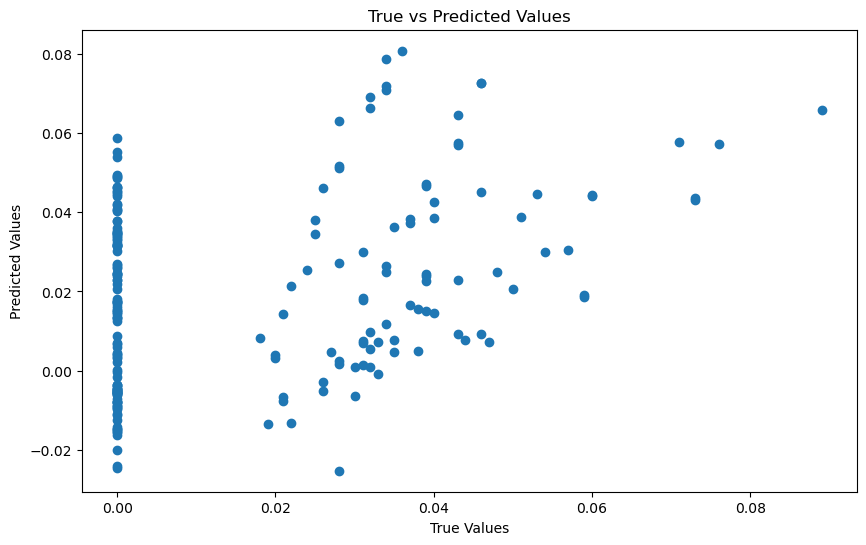

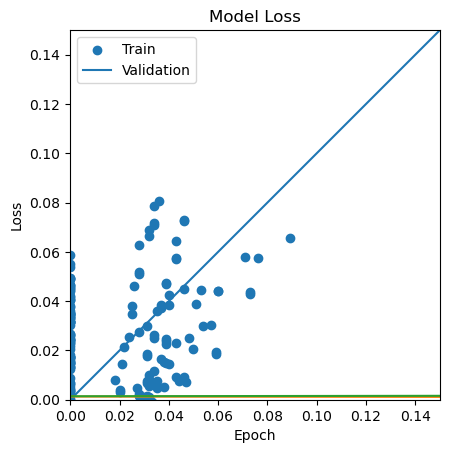

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 12ms/step - loss: 0.0043 - val_loss: 7.4159e-04 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 1s 11ms/step - loss: 9.3097e-04 - val_loss: 1.6297e-04 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 1s 11ms/step - loss: 6.3550e-04 - val_loss: 1.5237e-04 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 1s 11ms/step - loss: 4.8645e-04 - val_loss: 1.9595e-04 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 1s 11ms/step - loss: 4.9615e-04 - val_loss: 1.5140e-04 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 1s 11ms/step - loss: 4.4581e-04 - val_loss: 1.0597e-04 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 1s 11ms/step - loss: 4.0496e-04 - val_loss: 1.4446e-04 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 1s 11ms/step - loss: 3.7431e-04 - val_loss: 1.4151e-04 - lr: 0.0010
Epoch 9/200
110/110 [===========

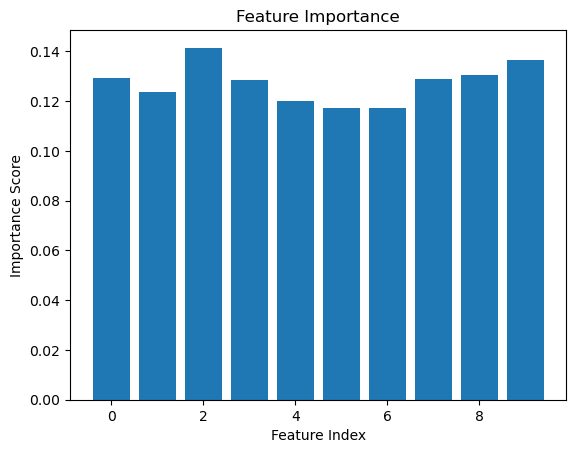

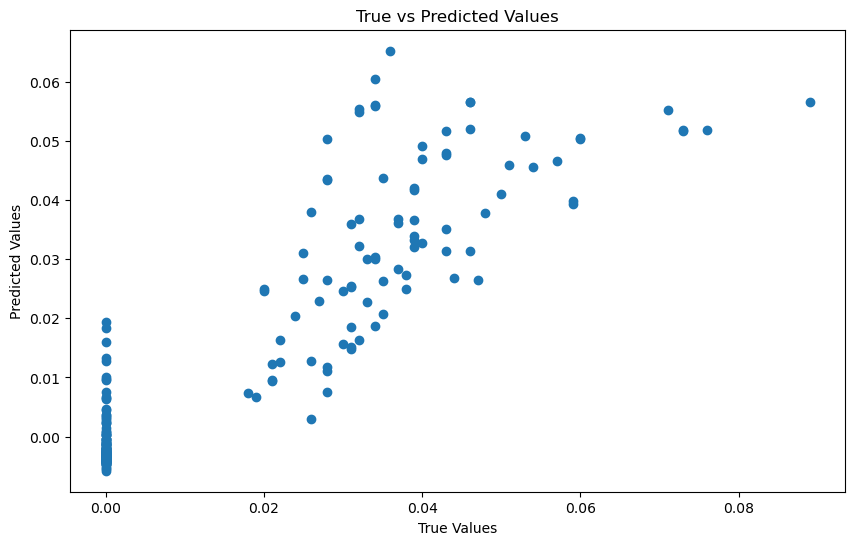

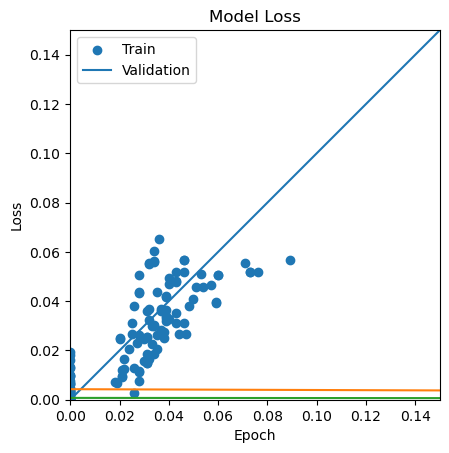

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 13ms/step - loss: 0.0114 - val_loss: 5.0602e-04 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0024 - val_loss: 3.8574e-04 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0016 - val_loss: 1.4322e-04 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 1.5279e-04 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 1s 11ms/step - loss: 9.0714e-04 - val_loss: 1.3918e-04 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 1s 11ms/step - loss: 8.0214e-04 - val_loss: 1.8930e-04 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 1s 11ms/step - loss: 7.2766e-04 - val_loss: 1.5228e-04 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 1s 11ms/step - loss: 6.7229e-04 - val_loss: 1.8080e-04 - lr: 0.0010
Epoch 9/200
110/110 [=======================

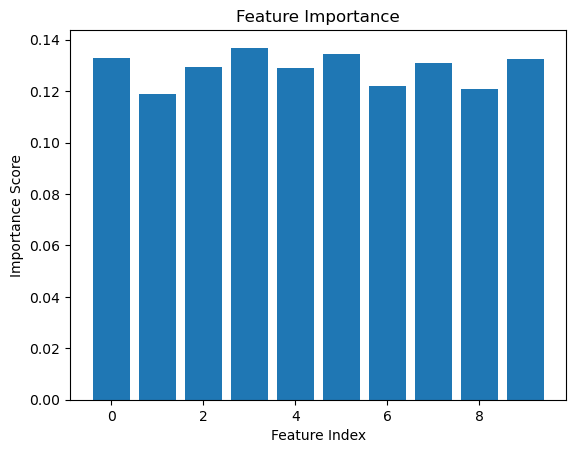

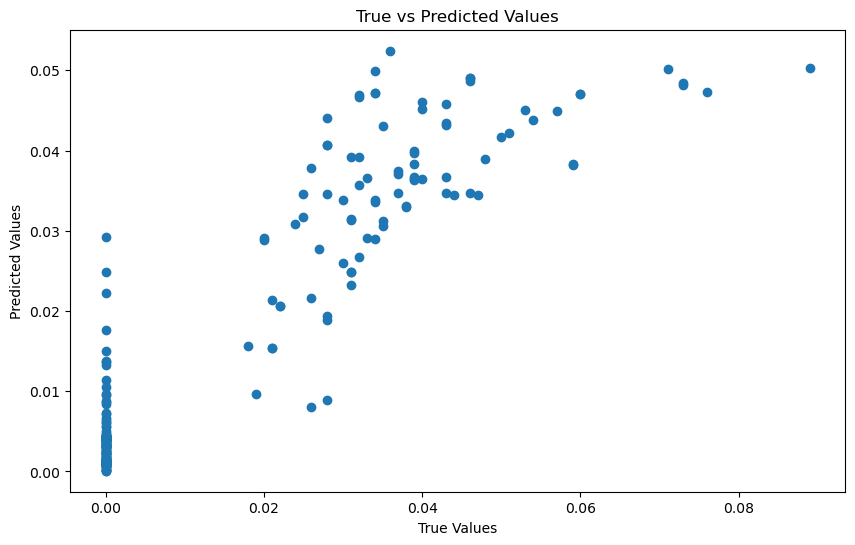

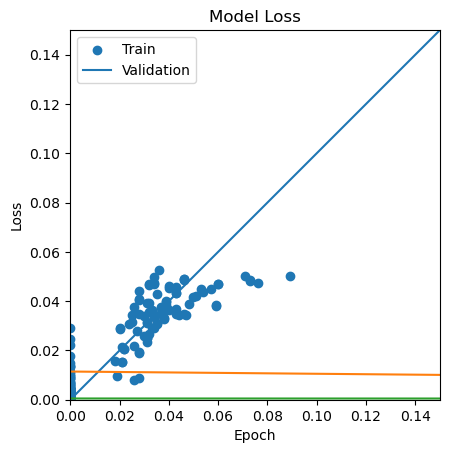

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 13ms/step - loss: 0.0033 - val_loss: 0.0019 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 10ms/step - loss: 2.5415e-04 - val_loss: 0.0015 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 11ms/step - loss: 2.1669e-04 - val_loss: 0.0012 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 11ms/step - loss: 1.6297e-04 - val_loss: 0.0012 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 10ms/step - loss: 1.6086e-04 - val_loss: 0.0013 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 11ms/step - loss: 1.4084e-04 - val_loss: 0.0012 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 10ms/step - loss: 1.5158e-04 - val_loss: 7.4196e-04 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 10ms/step - loss: 1.3047e-04 - val_loss: 6.8842e-04 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 11ms/step - loss

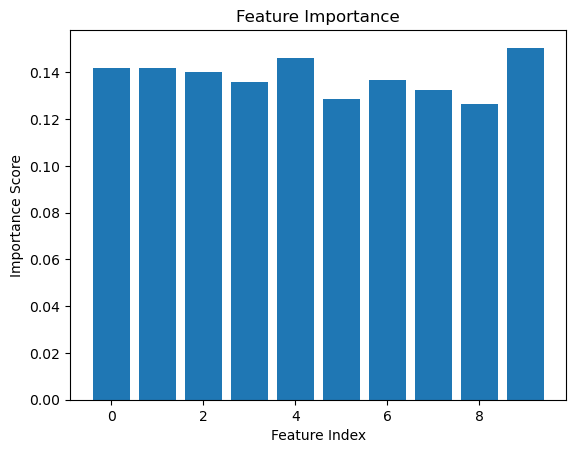

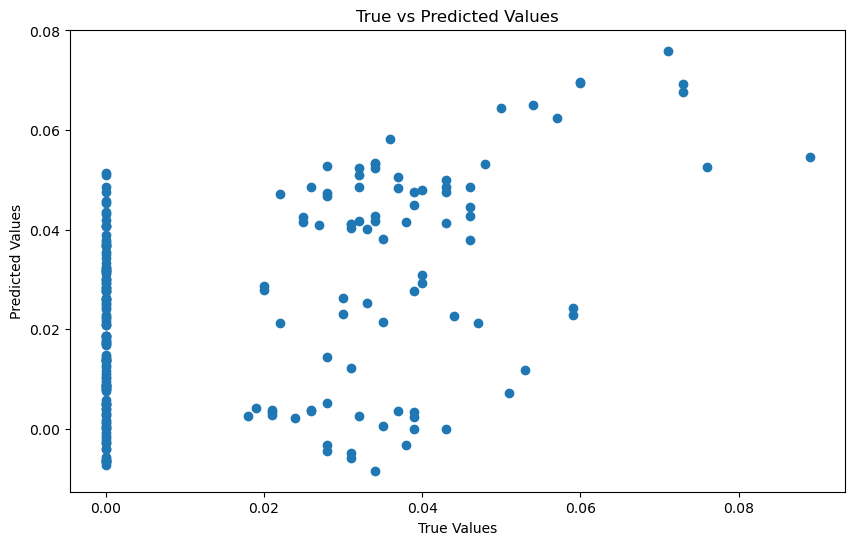

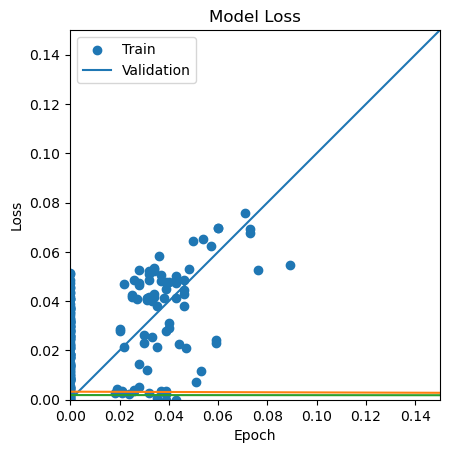

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 14ms/step - loss: 0.0073 - val_loss: 8.0624e-04 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0016 - val_loss: 1.9828e-04 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 6.3784e-04 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 11ms/step - loss: 8.1057e-04 - val_loss: 2.6901e-04 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 11ms/step - loss: 6.7258e-04 - val_loss: 3.2025e-04 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 12ms/step - loss: 6.5374e-04 - val_loss: 3.5904e-04 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 11ms/step - loss: 5.8122e-04 - val_loss: 5.1609e-04 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 12ms/step - loss: 4.8140e-04 - val_loss: 2.6432e-04 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 

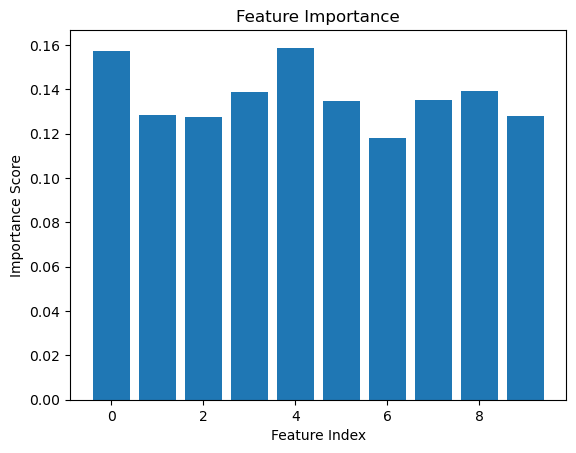

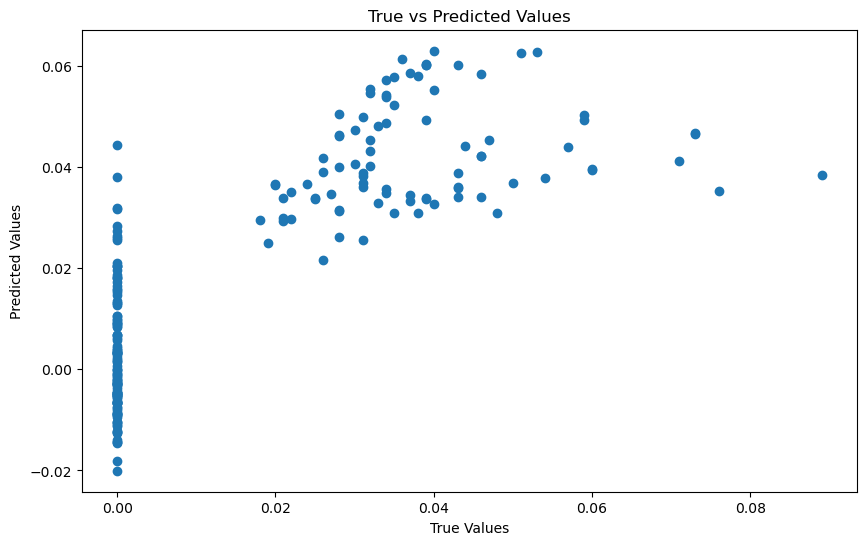

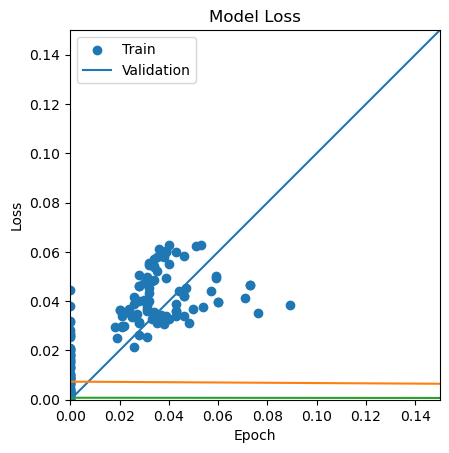

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 14ms/step - loss: 0.0123 - val_loss: 4.6404e-04 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0029 - val_loss: 3.5768e-04 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0018 - val_loss: 2.7625e-04 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 1.5955e-04 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 1.9161e-04 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 11ms/step - loss: 9.6566e-04 - val_loss: 1.8732e-04 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 12ms/step - loss: 8.9778e-04 - val_loss: 2.5683e-04 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 11ms/step - loss: 7.8979e-04 - val_loss: 2.7027e-04 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 12ms/ste

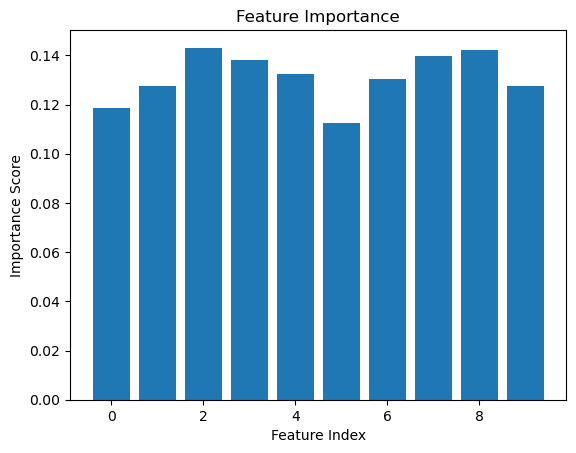

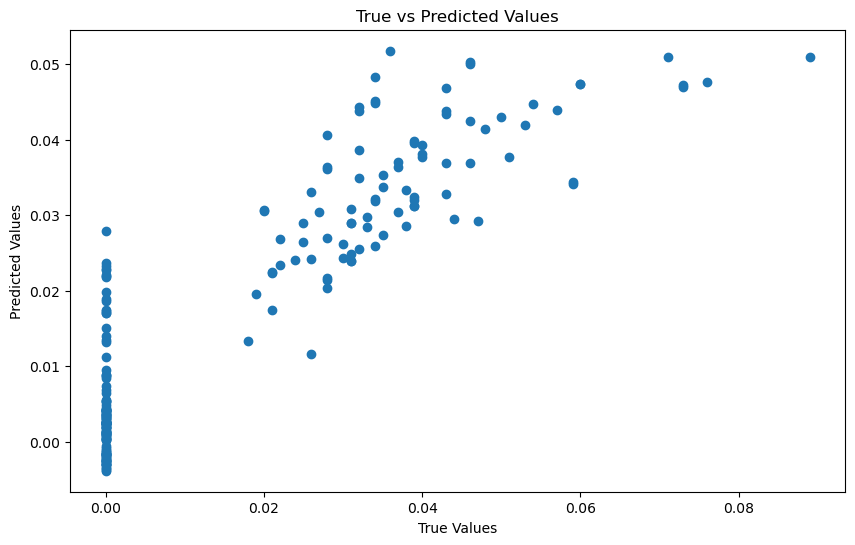

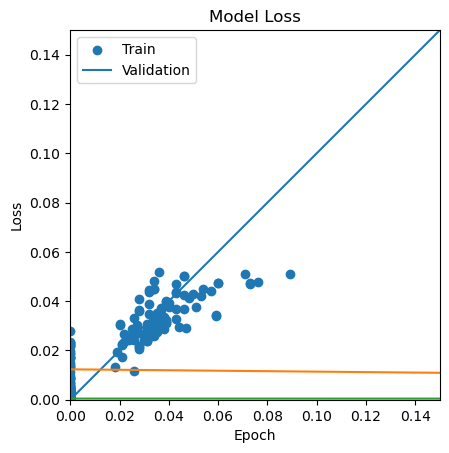

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 16ms/step - loss: 0.0022 - val_loss: 0.0011 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 0s 11ms/step - loss: 3.3773e-04 - val_loss: 0.0013 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 0s 11ms/step - loss: 3.1100e-04 - val_loss: 9.4463e-04 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 0s 11ms/step - loss: 1.8384e-04 - val_loss: 9.9449e-04 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 0s 11ms/step - loss: 1.7510e-04 - val_loss: 0.0012 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 0s 11ms/step - loss: 1.6974e-04 - val_loss: 9.6670e-04 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 0s 11ms/step - loss: 1.5004e-04 - val_loss: 0.0011 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 0s 11ms/step - loss: 1.5053e-04 - val_loss: 9.6744e-04 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 0s 11ms/ste

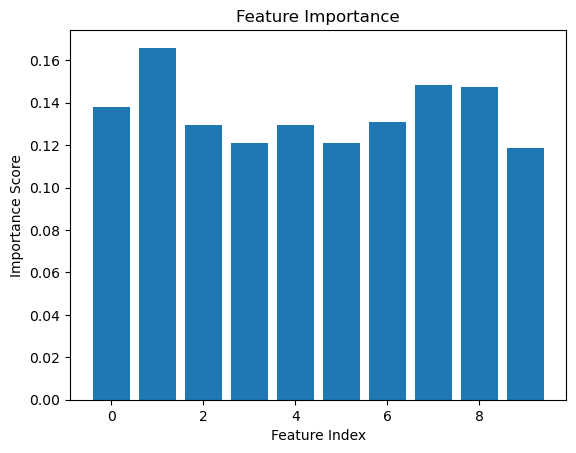

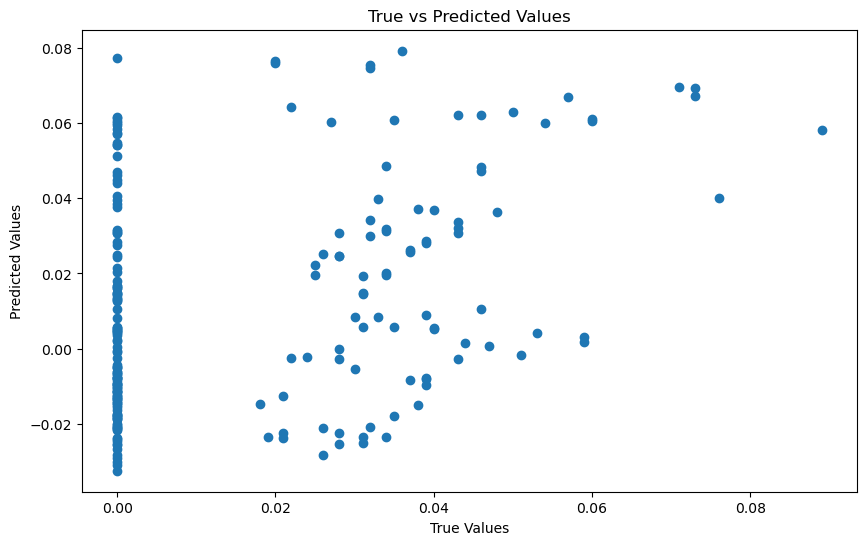

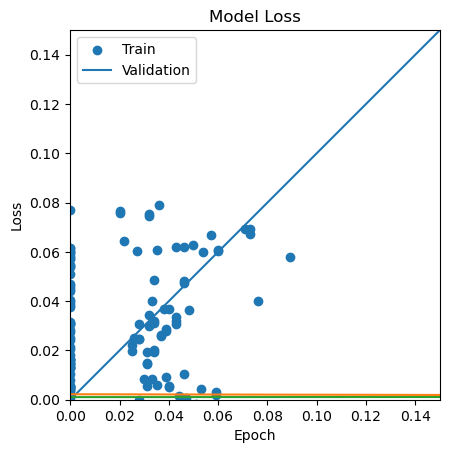

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 17ms/step - loss: 0.0082 - val_loss: 7.9729e-04 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0017 - val_loss: 3.0097e-04 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 3.0694e-04 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 0s 12ms/step - loss: 8.9632e-04 - val_loss: 1.9203e-04 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 0s 12ms/step - loss: 7.3828e-04 - val_loss: 2.0120e-04 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 0s 12ms/step - loss: 7.3967e-04 - val_loss: 2.1165e-04 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 0s 12ms/step - loss: 5.9007e-04 - val_loss: 1.8478e-04 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 0s 12ms/step - loss: 5.7213e-04 - val_loss: 1.8165e-04 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 0s 

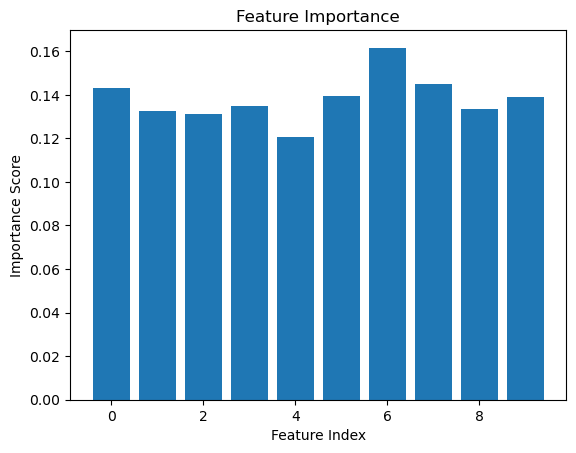

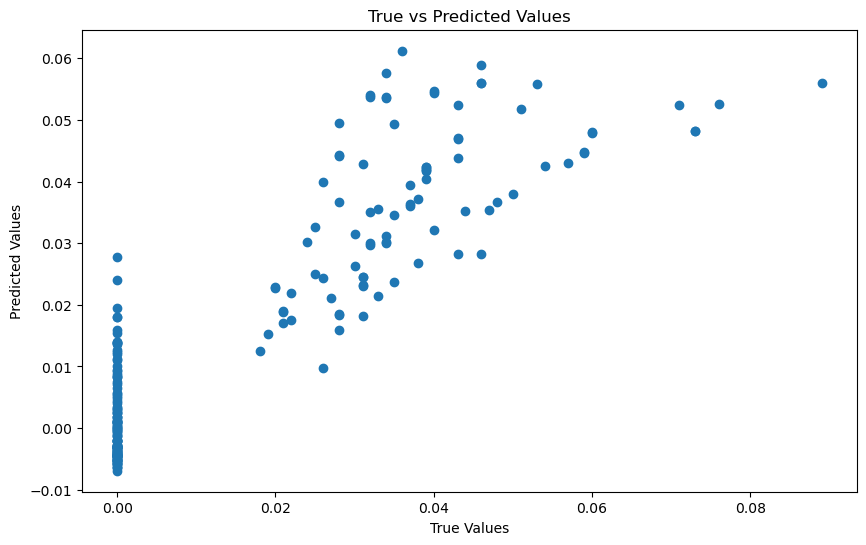

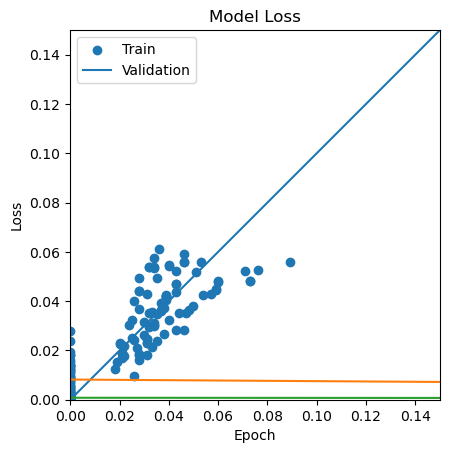

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 17ms/step - loss: 0.0137 - val_loss: 0.0029 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 0s 13ms/step - loss: 0.0028 - val_loss: 0.0019 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 5.8562e-04 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0015 - val_loss: 5.1450e-04 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 3.1714e-04 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 1.8066e-04 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 0s 12ms/step - loss: 9.8611e-04 - val_loss: 1.4525e-04 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 0s 12ms/step - loss: 8.4329e-04 - val_loss: 1.7229e-04 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 0s 13ms/step - loss: 7.

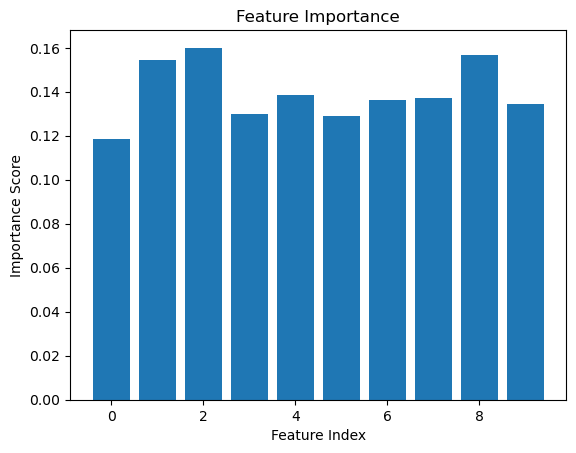

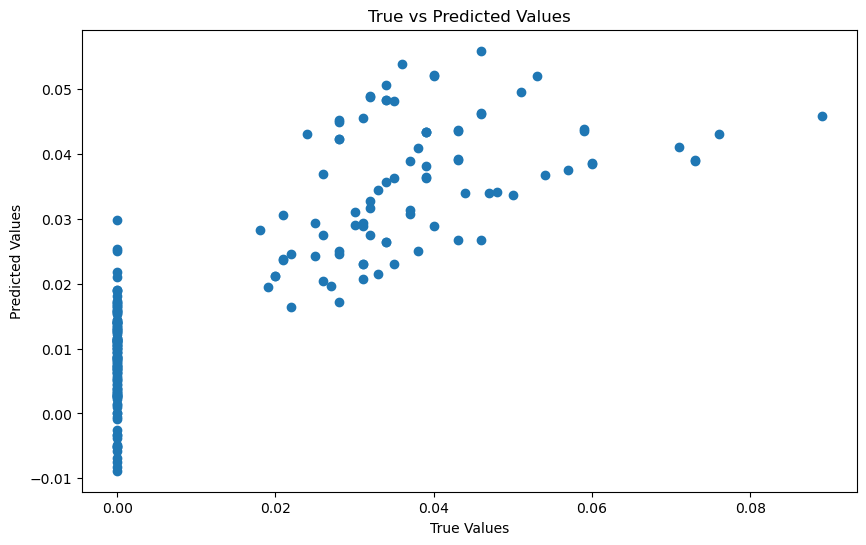

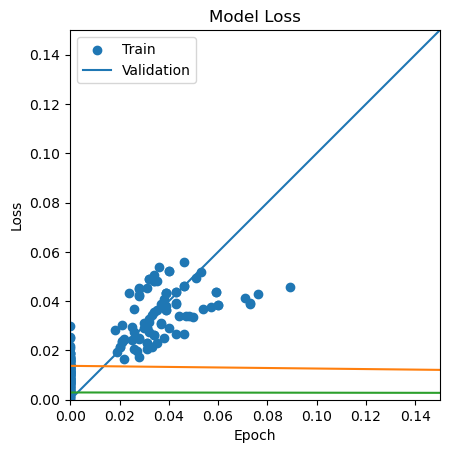

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 11ms/step - loss: 0.0060 - val_loss: 2.2308e-04 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 1s 10ms/step - loss: 2.8970e-04 - val_loss: 0.0011 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 1s 10ms/step - loss: 3.0303e-04 - val_loss: 2.1080e-04 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 1s 10ms/step - loss: 2.4342e-04 - val_loss: 3.6205e-04 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 1s 10ms/step - loss: 2.4885e-04 - val_loss: 1.7473e-04 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 1s 10ms/step - loss: 2.2340e-04 - val_loss: 2.3818e-04 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 1s 10ms/step - loss: 2.5240e-04 - val_loss: 3.8726e-04 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 1s 10ms/step - loss: 2.2969e-04 - val_loss: 1.5795e-04 - lr: 0.0100
Epoch 9/200
110/110 [===============

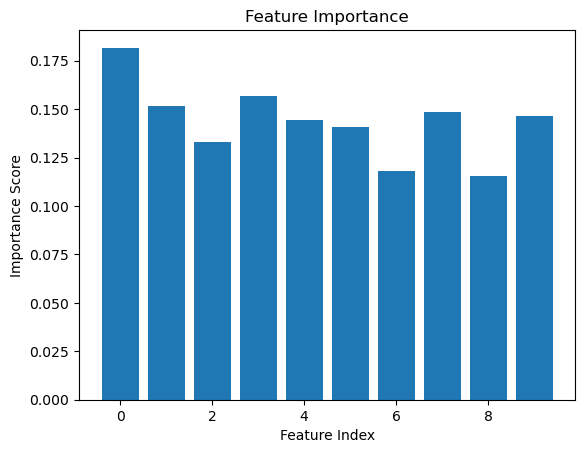

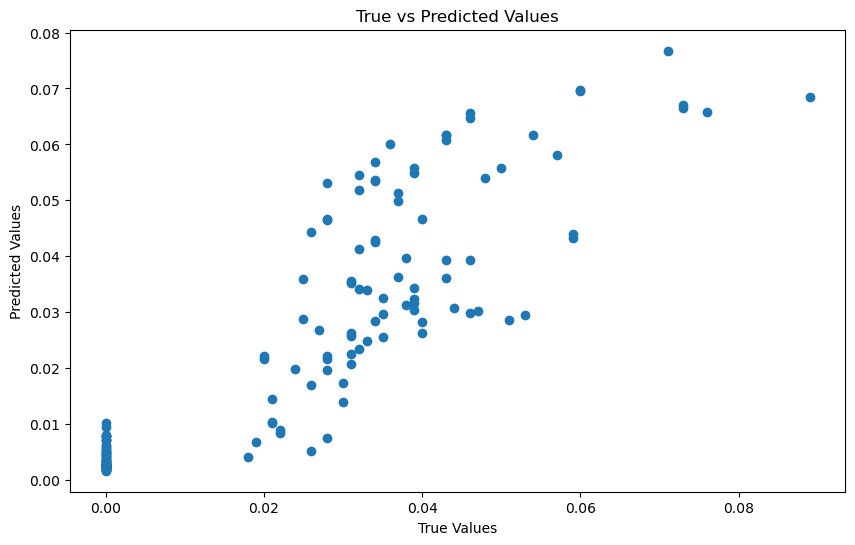

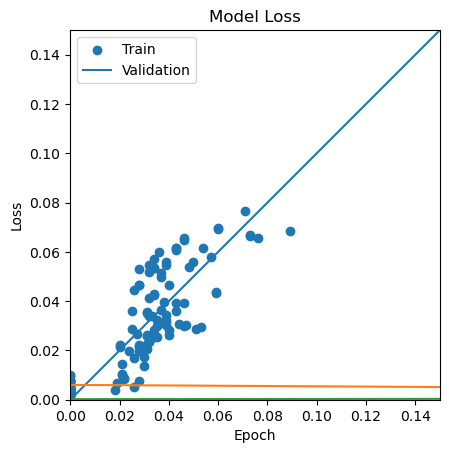

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 12ms/step - loss: 0.0067 - val_loss: 1.2167e-04 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 1s 11ms/step - loss: 4.2079e-04 - val_loss: 1.2788e-04 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 1s 11ms/step - loss: 3.6433e-04 - val_loss: 1.2807e-04 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 1s 11ms/step - loss: 3.5721e-04 - val_loss: 6.9672e-05 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 1s 12ms/step - loss: 3.4919e-04 - val_loss: 2.2744e-04 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 1s 11ms/step - loss: 3.2337e-04 - val_loss: 1.6291e-04 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 1s 11ms/step - loss: 3.7768e-04 - val_loss: 2.6759e-04 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 1s 11ms/step - loss: 3.2570e-04 - val_loss: 1.2286e-04 - lr: 0.0100
Epoch 9/200
110/110 [===========

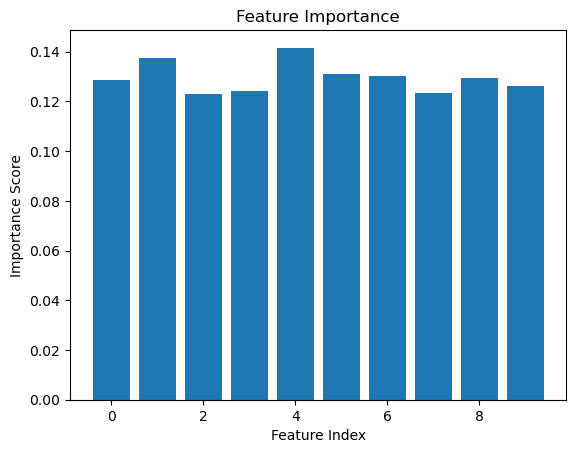

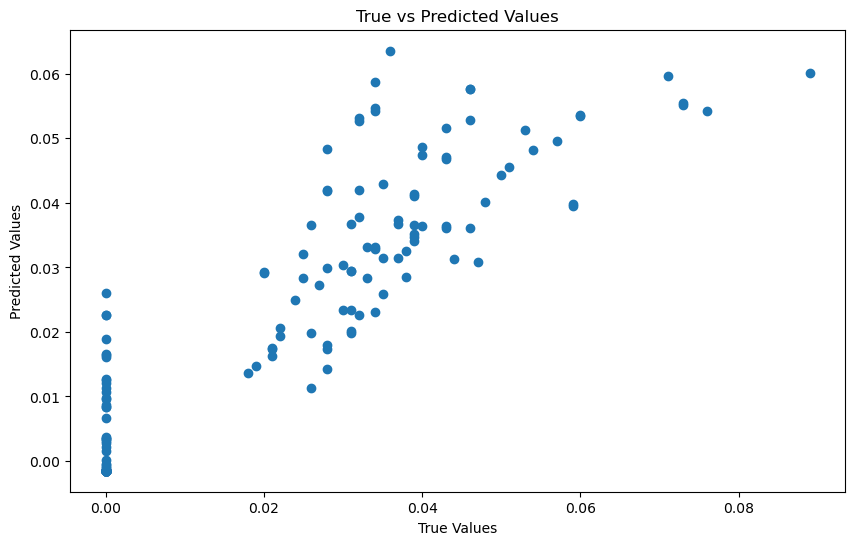

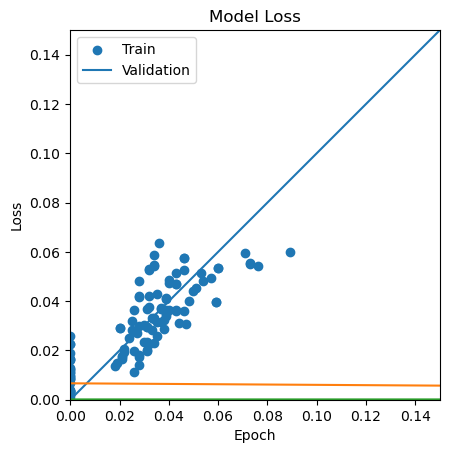

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 12ms/step - loss: 0.0153 - val_loss: 2.1778e-04 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 1s 11ms/step - loss: 5.9158e-04 - val_loss: 1.2911e-04 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 1s 11ms/step - loss: 5.4435e-04 - val_loss: 1.1275e-04 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 1s 11ms/step - loss: 4.9069e-04 - val_loss: 2.6842e-04 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 1s 11ms/step - loss: 4.1974e-04 - val_loss: 1.1706e-04 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 1s 11ms/step - loss: 3.7135e-04 - val_loss: 1.1634e-04 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 1s 11ms/step - loss: 3.9512e-04 - val_loss: 9.2132e-05 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 1s 11ms/step - loss: 3.9055e-04 - val_loss: 2.1770e-04 - lr: 0.0100
Epoch 9/200
110/110 [===========

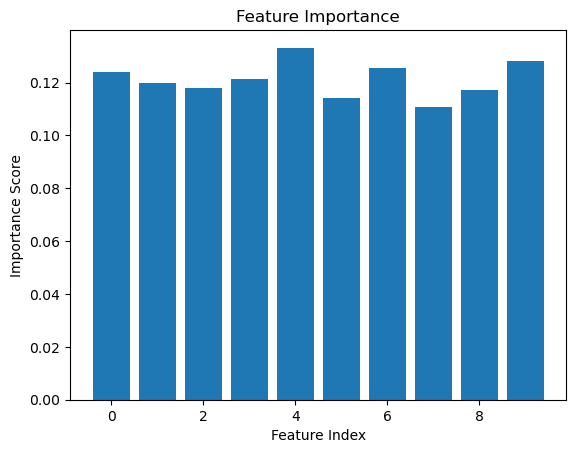

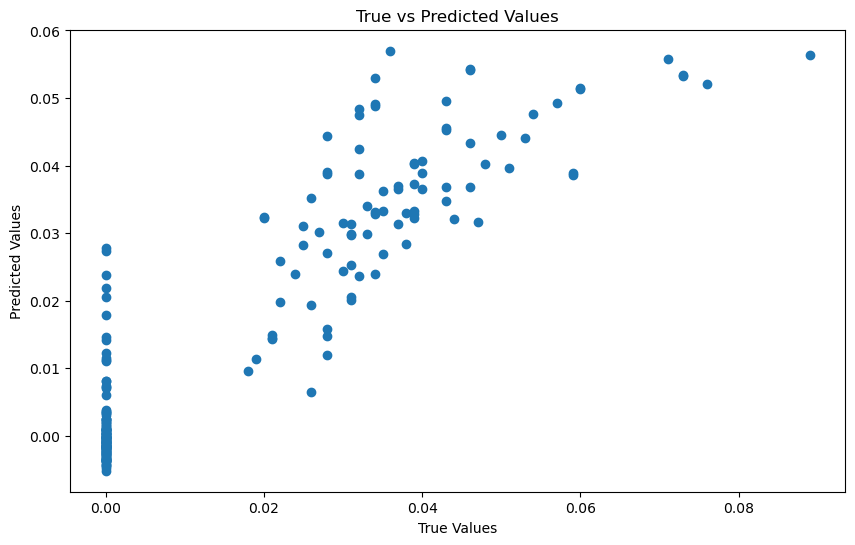

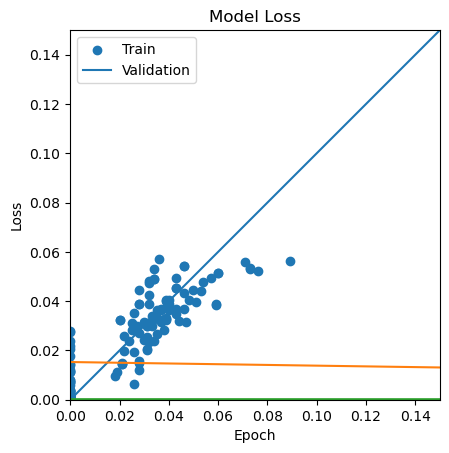

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 13ms/step - loss: 0.0199 - val_loss: 2.0033e-04 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 10ms/step - loss: 2.9196e-04 - val_loss: 2.3768e-04 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 10ms/step - loss: 3.0672e-04 - val_loss: 2.4027e-04 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 10ms/step - loss: 2.4906e-04 - val_loss: 2.9342e-04 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 10ms/step - loss: 2.2474e-04 - val_loss: 2.4416e-04 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 10ms/step - loss: 2.0753e-04 - val_loss: 2.5431e-04 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 11ms/step - loss: 2.4251e-04 - val_loss: 2.8094e-04 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 10ms/step - loss: 2.1288e-04 - val_loss: 5.7953e-04 - lr: 0.0100
Epoch 9/200
55/55 [=============================

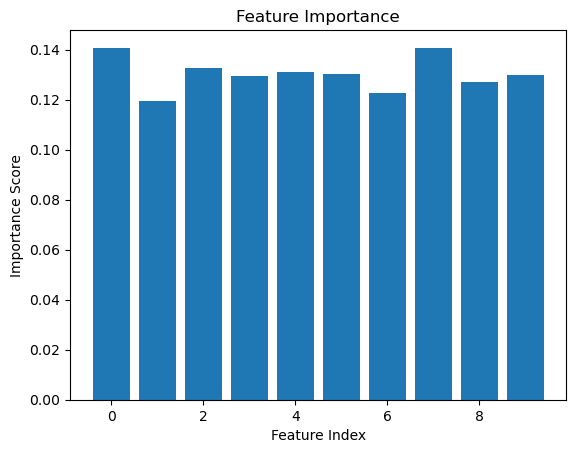

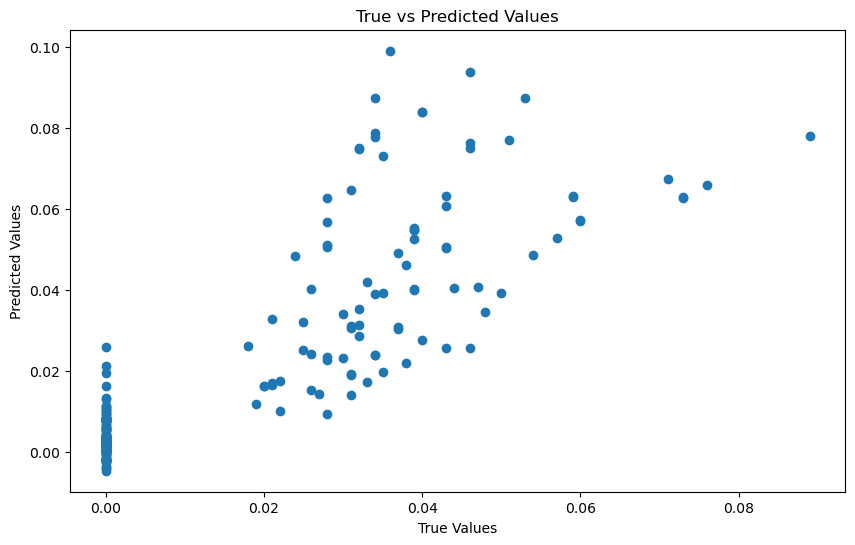

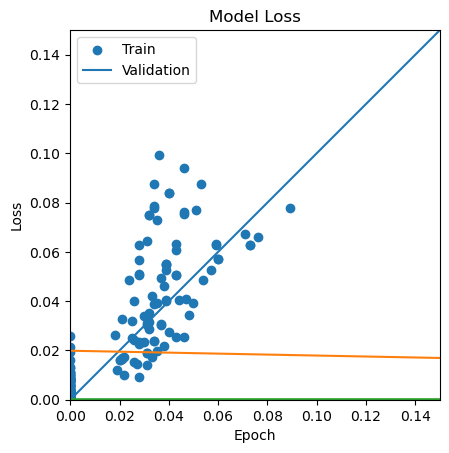

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 14ms/step - loss: 0.0142 - val_loss: 1.9481e-04 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 11ms/step - loss: 6.1472e-04 - val_loss: 8.9814e-05 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 11ms/step - loss: 4.2003e-04 - val_loss: 1.1244e-04 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 12ms/step - loss: 3.7654e-04 - val_loss: 8.4794e-05 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 11ms/step - loss: 3.5638e-04 - val_loss: 9.5190e-05 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 12ms/step - loss: 3.1419e-04 - val_loss: 9.4920e-05 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 11ms/step - loss: 3.2827e-04 - val_loss: 8.2774e-05 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 11ms/step - loss: 3.1389e-04 - val_loss: 9.7913e-05 - lr: 0.0100
Epoch 9/200
55/55 [=============================

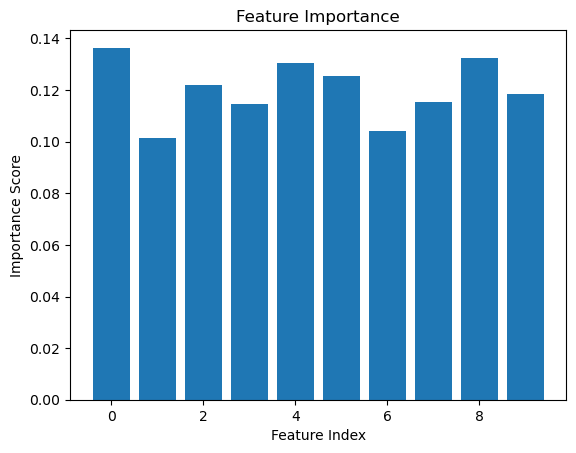

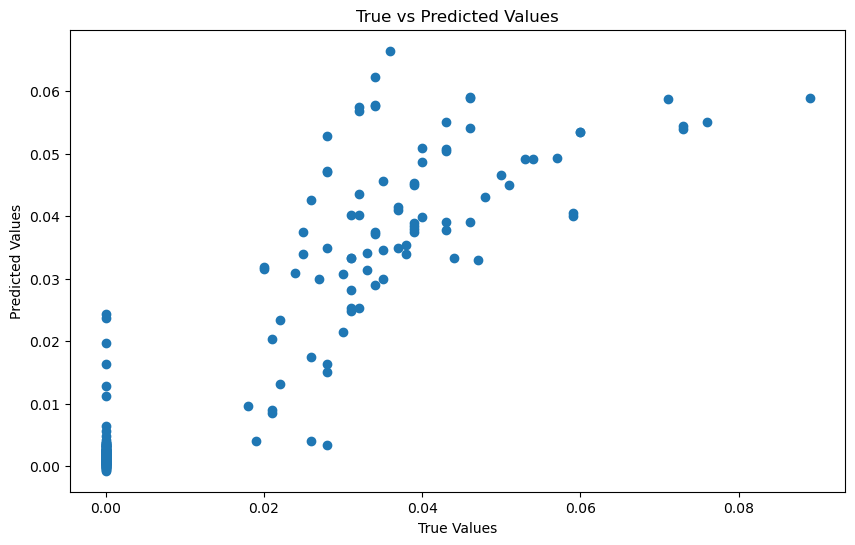

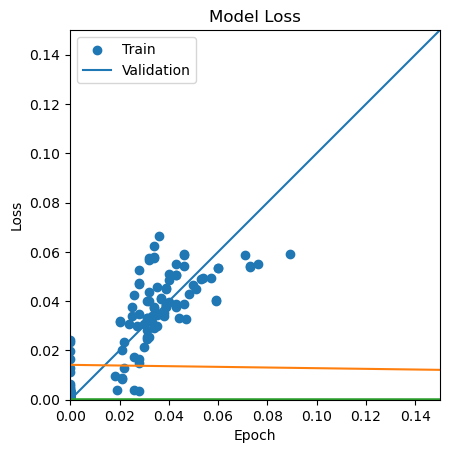

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 14ms/step - loss: 0.0258 - val_loss: 3.6226e-04 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 12ms/step - loss: 6.9588e-04 - val_loss: 1.1622e-04 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 11ms/step - loss: 5.2704e-04 - val_loss: 1.5719e-04 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 11ms/step - loss: 4.4695e-04 - val_loss: 1.3215e-04 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 11ms/step - loss: 4.2851e-04 - val_loss: 1.3729e-04 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 12ms/step - loss: 3.8934e-04 - val_loss: 7.6094e-05 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 11ms/step - loss: 3.9709e-04 - val_loss: 7.7667e-05 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 11ms/step - loss: 3.8056e-04 - val_loss: 9.9804e-05 - lr: 0.0100
Epoch 9/200
55/55 [=============================

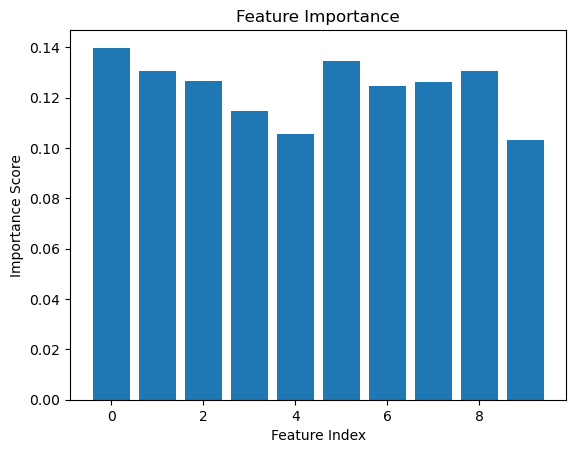

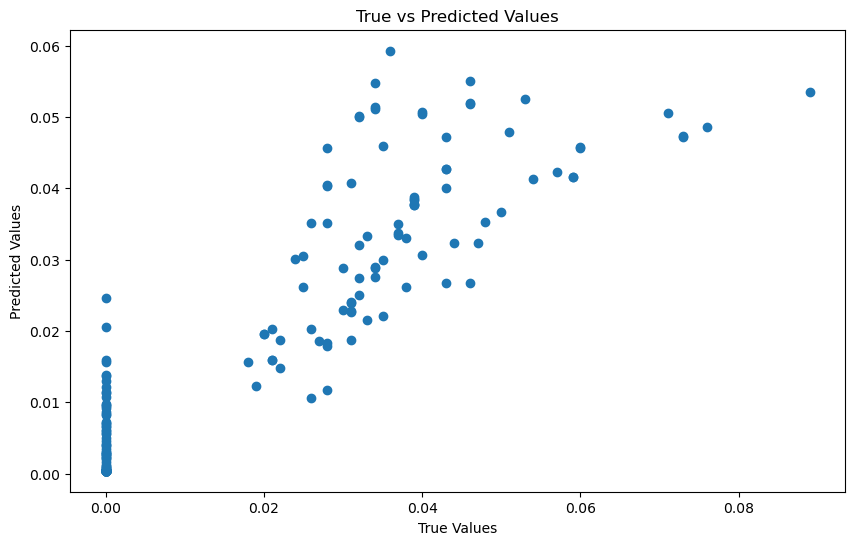

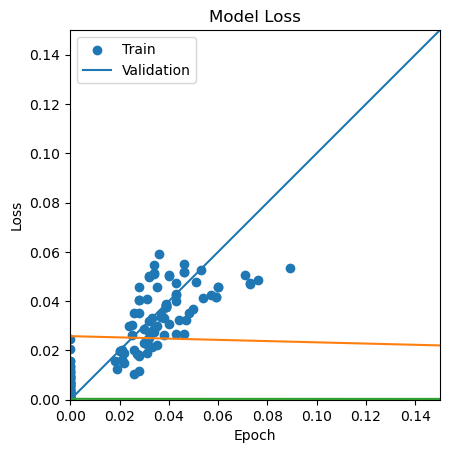

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 16ms/step - loss: 0.0808 - val_loss: 2.5829e-04 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 0s 11ms/step - loss: 4.5067e-04 - val_loss: 4.4922e-04 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 0s 11ms/step - loss: 3.5386e-04 - val_loss: 3.0261e-04 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 0s 11ms/step - loss: 2.9463e-04 - val_loss: 1.7898e-04 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 0s 12ms/step - loss: 2.6230e-04 - val_loss: 4.5317e-04 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 0s 11ms/step - loss: 2.8972e-04 - val_loss: 2.0358e-04 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 0s 10ms/step - loss: 3.0736e-04 - val_loss: 3.3573e-04 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 0s 10ms/step - loss: 2.3468e-04 - val_loss: 1.9562e-04 - lr: 0.0100
Epoch 9/200
28/28 [=============================

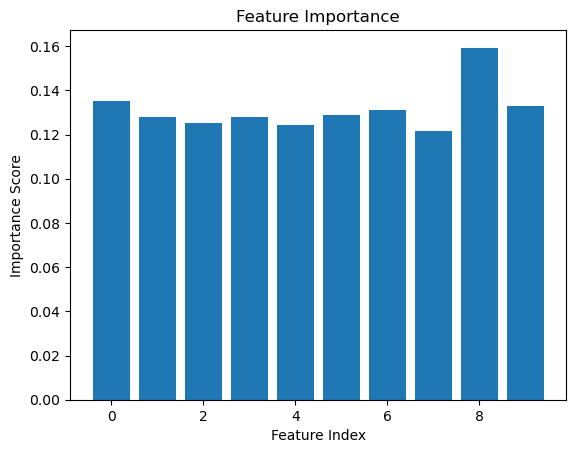

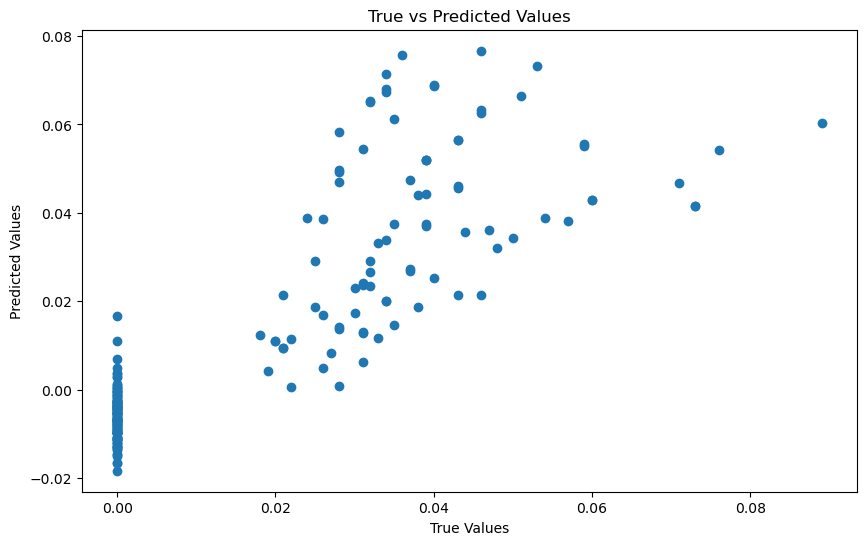

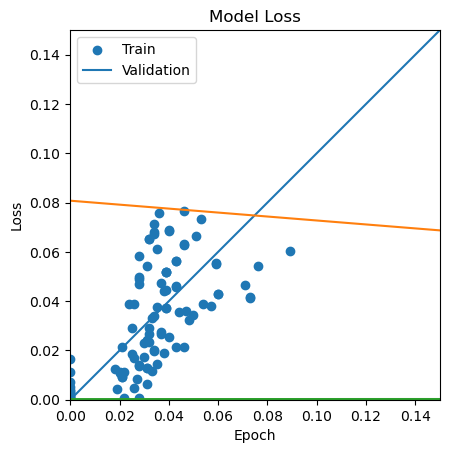

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 17ms/step - loss: 0.0278 - val_loss: 2.4240e-04 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 0s 12ms/step - loss: 6.5093e-04 - val_loss: 3.2403e-04 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 0s 12ms/step - loss: 4.3385e-04 - val_loss: 1.4170e-04 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 0s 13ms/step - loss: 3.9537e-04 - val_loss: 1.2389e-04 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 0s 13ms/step - loss: 3.5757e-04 - val_loss: 1.1897e-04 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 0s 12ms/step - loss: 3.5558e-04 - val_loss: 1.6925e-04 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 0s 12ms/step - loss: 3.6823e-04 - val_loss: 7.7040e-05 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 0s 13ms/step - loss: 3.3081e-04 - val_loss: 8.6010e-05 - lr: 0.0100
Epoch 9/200
28/28 [=============================

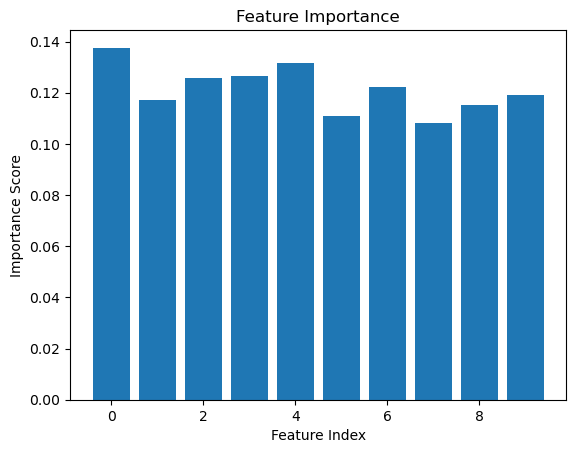

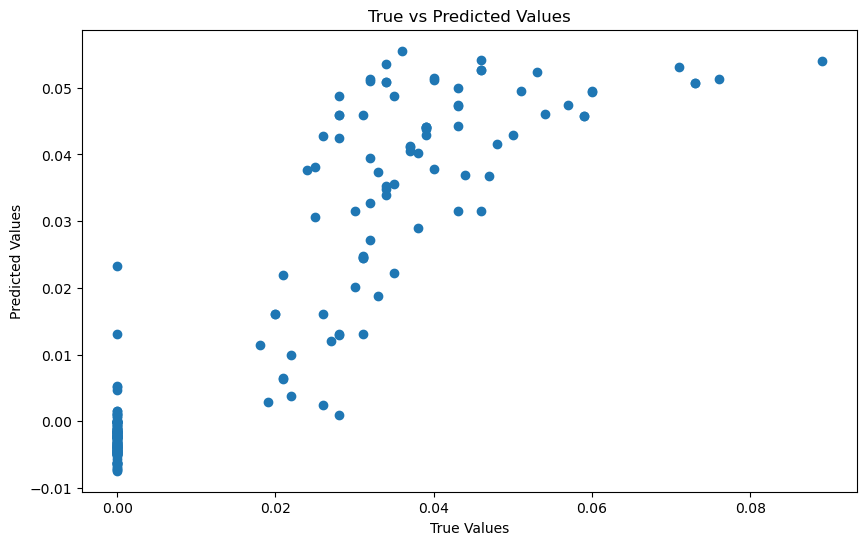

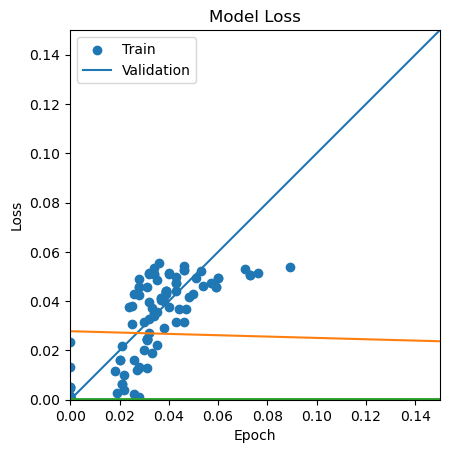

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 17ms/step - loss: 0.0752 - val_loss: 5.4969e-04 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 0s 13ms/step - loss: 9.7377e-04 - val_loss: 2.3239e-04 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 0s 12ms/step - loss: 7.5247e-04 - val_loss: 1.3055e-04 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 0s 12ms/step - loss: 6.3275e-04 - val_loss: 1.2251e-04 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 0s 13ms/step - loss: 5.2282e-04 - val_loss: 9.9604e-05 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 0s 12ms/step - loss: 4.6117e-04 - val_loss: 8.0100e-05 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 0s 13ms/step - loss: 4.6029e-04 - val_loss: 7.8188e-05 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 0s 12ms/step - loss: 4.4628e-04 - val_loss: 7.4210e-05 - lr: 0.0100
Epoch 9/200
28/28 [=============================

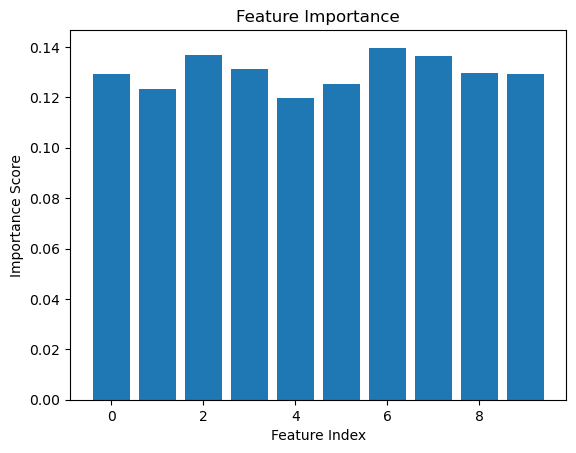

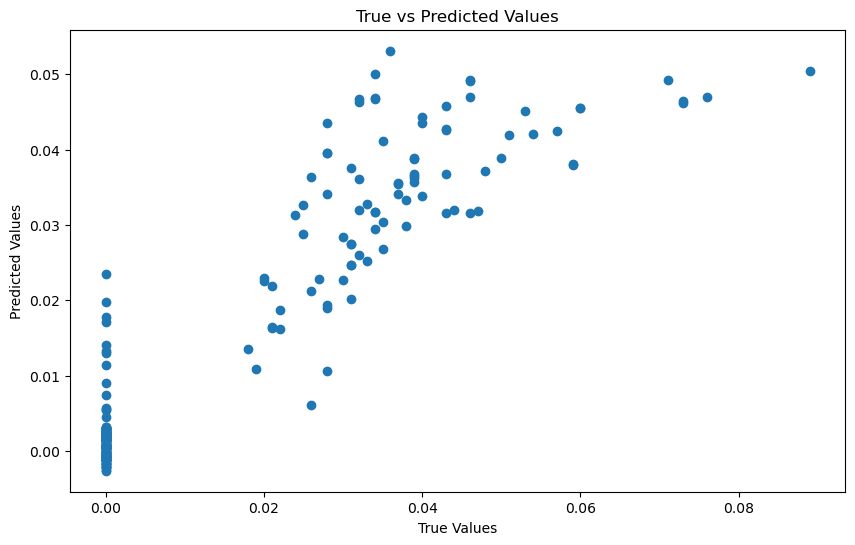

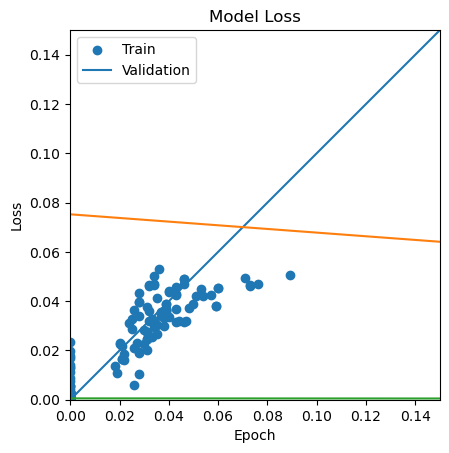

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 1s 11ms/step - loss: 0.0167 - val_loss: 0.0155 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0047 - val_loss: 0.0235 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0034 - val_loss: 0.0245 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0028 - val_loss: 0.0242 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0024 - val_loss: 0.0235 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0022 - val_loss: 0.0226 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0020 - val_loss: 0.0218 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0019 - val_loss: 0.0215 - lr: 0.0010
Epoch 9/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.02

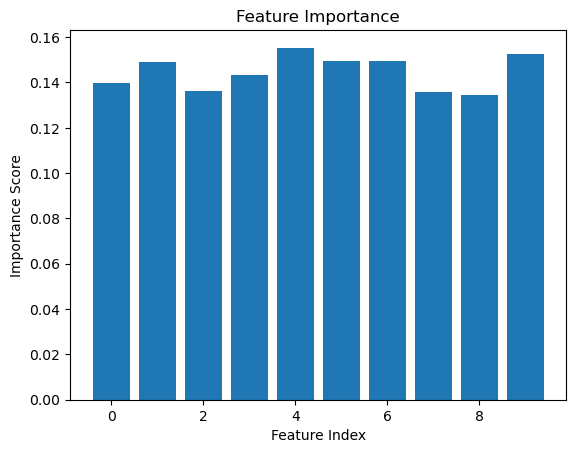

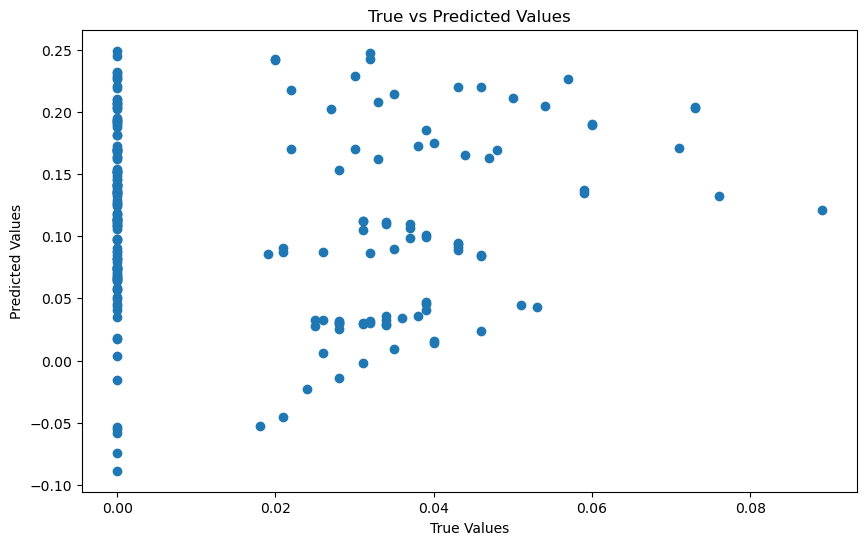

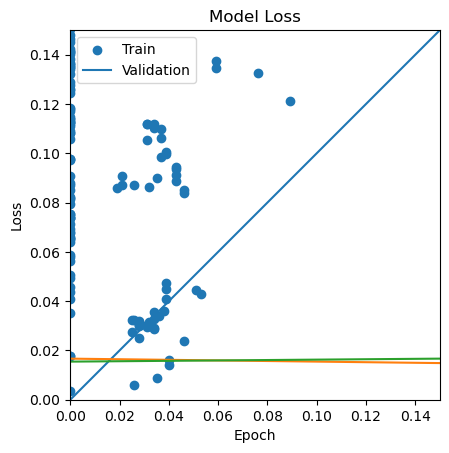

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 12ms/step - loss: 0.0390 - val_loss: 0.0046 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0260 - val_loss: 0.0062 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0218 - val_loss: 0.0051 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0206 - val_loss: 0.0043 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0188 - val_loss: 0.0040 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0176 - val_loss: 0.0038 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0170 - val_loss: 0.0029 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0156 - val_loss: 0.0024 - lr: 0.0010
Epoch 9/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0148 - val_los

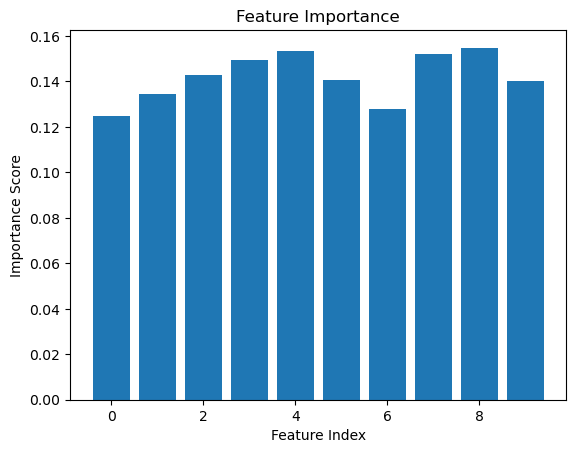

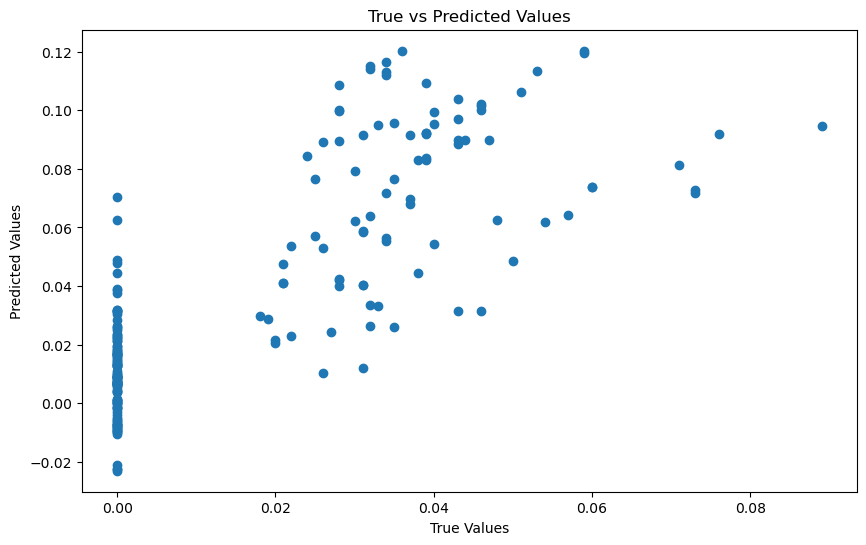

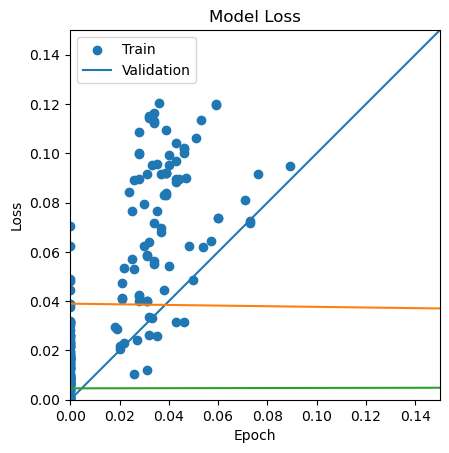

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 12ms/step - loss: 0.0445 - val_loss: 0.0038 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0384 - val_loss: 0.0046 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0351 - val_loss: 0.0036 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0313 - val_loss: 0.0032 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0305 - val_loss: 0.0031 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0280 - val_loss: 0.0026 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0274 - val_loss: 0.0024 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 1s 12ms/step - loss: 0.0235 - val_loss: 0.0021 - lr: 0.0010
Epoch 9/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0228 - val_los

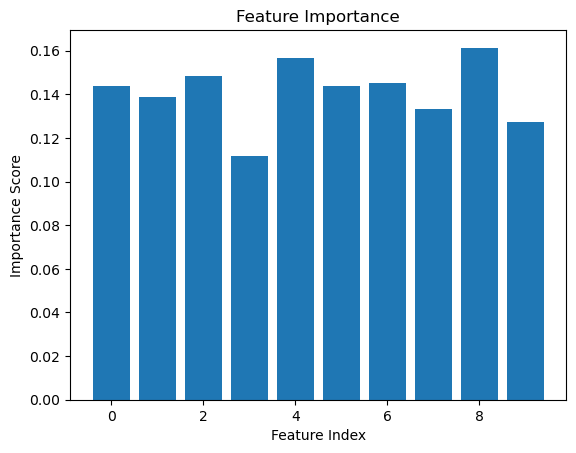

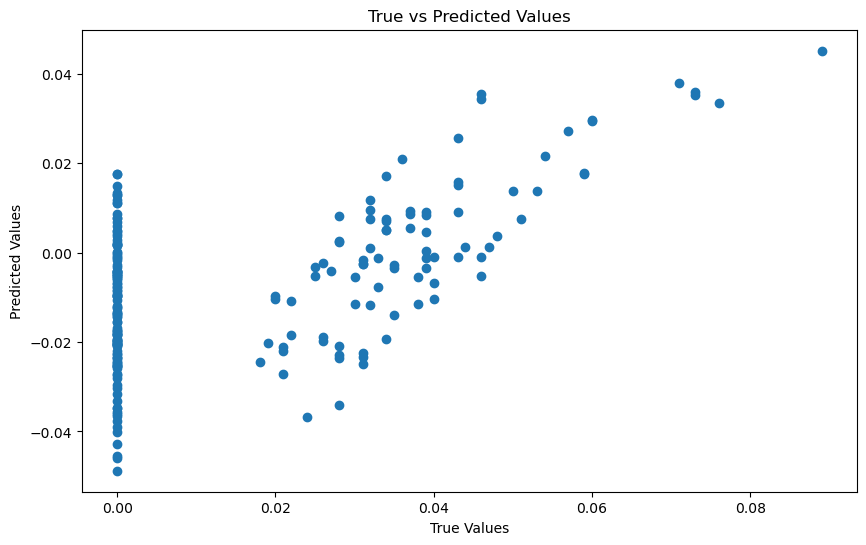

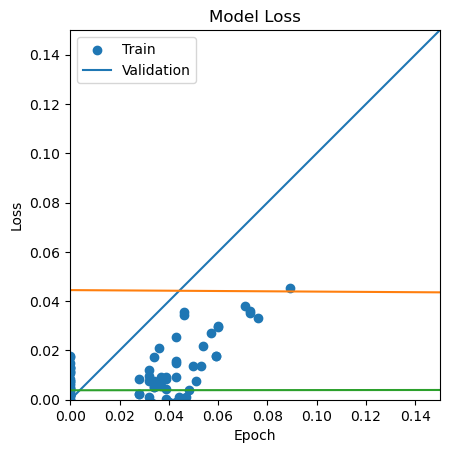

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 16ms/step - loss: 0.0525 - val_loss: 0.1042 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0225 - val_loss: 0.0595 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0136 - val_loss: 0.0396 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0097 - val_loss: 0.0292 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0076 - val_loss: 0.0229 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0062 - val_loss: 0.0188 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0052 - val_loss: 0.0158 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0045 - val_loss: 0.0136 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0040 - val_loss: 0.0120 - lr: 0.

Epoch 73/200
55/55 [==============================] - 1s 10ms/step - loss: 9.6595e-04 - val_loss: 0.0031 - lr: 0.0010
Epoch 74/200
55/55 [==============================] - 1s 10ms/step - loss: 9.5761e-04 - val_loss: 0.0031 - lr: 0.0010
Epoch 75/200
55/55 [==============================] - 1s 10ms/step - loss: 9.4952e-04 - val_loss: 0.0031 - lr: 0.0010
Epoch 76/200
55/55 [==============================] - 1s 10ms/step - loss: 9.4168e-04 - val_loss: 0.0031 - lr: 0.0010
Epoch 77/200
55/55 [==============================] - 1s 10ms/step - loss: 9.3403e-04 - val_loss: 0.0031 - lr: 0.0010
Epoch 78/200
55/55 [==============================] - 1s 10ms/step - loss: 9.2651e-04 - val_loss: 0.0031 - lr: 0.0010
Epoch 79/200
55/55 [==============================] - 1s 10ms/step - loss: 9.1919e-04 - val_loss: 0.0031 - lr: 0.0010
Epoch 80/200
55/55 [==============================] - 1s 10ms/step - loss: 9.1178e-04 - val_loss: 0.0031 - lr: 0.0010
Epoch 81/200
55/55 [==============================] - 1s

55/55 [==============================] - 1s 10ms/step - loss: 6.5107e-04 - val_loss: 0.0027 - lr: 0.0010
Epoch 143/200
55/55 [==============================] - 1s 10ms/step - loss: 6.4865e-04 - val_loss: 0.0026 - lr: 0.0010
Epoch 144/200
55/55 [==============================] - 1s 10ms/step - loss: 6.4623e-04 - val_loss: 0.0026 - lr: 0.0010
Epoch 145/200
55/55 [==============================] - 1s 10ms/step - loss: 6.4369e-04 - val_loss: 0.0026 - lr: 0.0010
Epoch 146/200
55/55 [==============================] - 1s 10ms/step - loss: 6.4128e-04 - val_loss: 0.0026 - lr: 0.0010
Epoch 147/200
55/55 [==============================] - 1s 10ms/step - loss: 6.3903e-04 - val_loss: 0.0026 - lr: 0.0010
Epoch 148/200
55/55 [==============================] - 1s 10ms/step - loss: 6.3659e-04 - val_loss: 0.0026 - lr: 0.0010
Epoch 149/200
55/55 [==============================] - 1s 10ms/step - loss: 6.3432e-04 - val_loss: 0.0026 - lr: 0.0010
Epoch 150/200
55/55 [==============================] - 1s 10ms

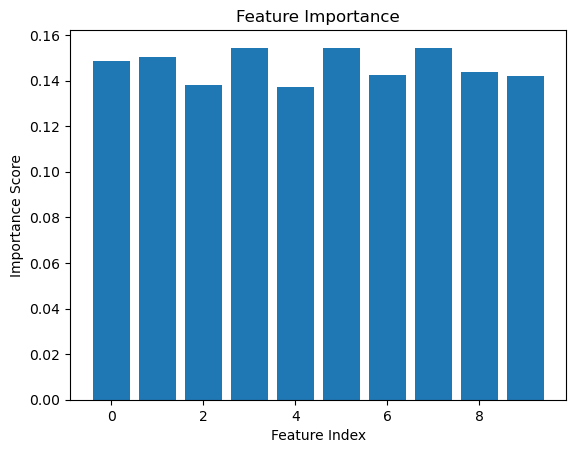

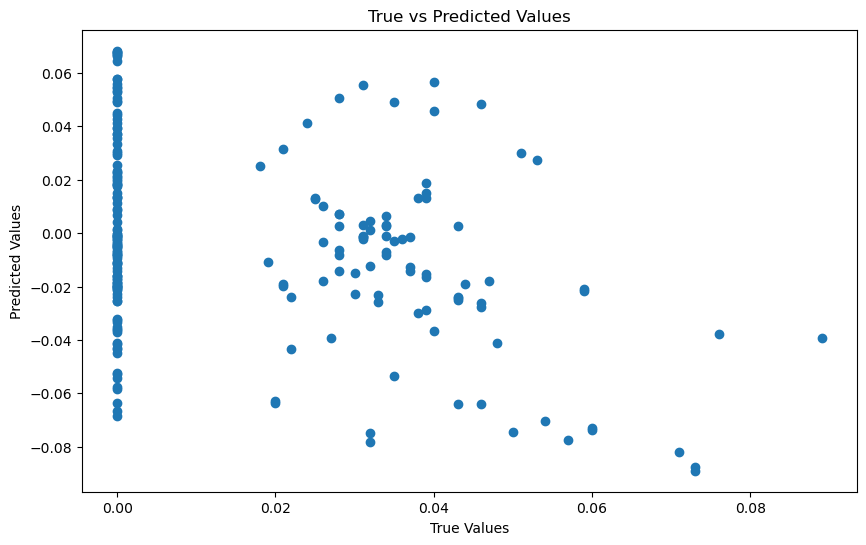

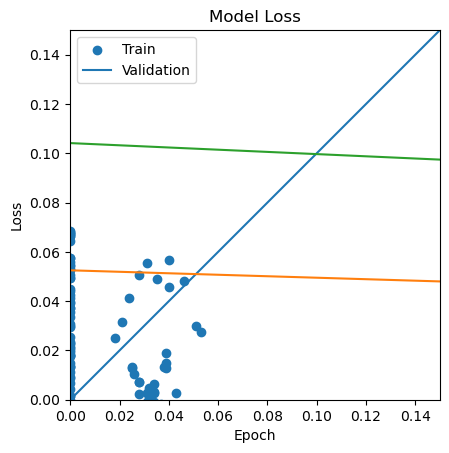

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 13ms/step - loss: 0.0194 - val_loss: 0.0119 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0189 - val_loss: 0.0127 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0177 - val_loss: 0.0125 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0186 - val_loss: 0.0125 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0177 - val_loss: 0.0125 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0181 - val_loss: 0.0119 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0161 - val_loss: 0.0119 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0165 - val_loss: 0.0122 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0162 - val_loss: 0.0119 - lr: 0.

55/55 [==============================] - 1s 11ms/step - loss: 0.0074 - val_loss: 0.0042 - lr: 0.0010
Epoch 74/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0070 - val_loss: 0.0041 - lr: 0.0010
Epoch 75/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0069 - val_loss: 0.0041 - lr: 0.0010
Epoch 76/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0072 - val_loss: 0.0039 - lr: 0.0010
Epoch 77/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0068 - val_loss: 0.0037 - lr: 0.0010
Epoch 78/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0070 - val_loss: 0.0036 - lr: 0.0010
Epoch 79/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0069 - val_loss: 0.0038 - lr: 0.0010
Epoch 80/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0073 - val_loss: 0.0037 - lr: 0.0010
Epoch 81/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0069 - val_loss: 0.0038 

55/55 [==============================] - 1s 11ms/step - loss: 0.0049 - val_loss: 0.0015 - lr: 0.0010
Epoch 145/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0049 - val_loss: 0.0014 - lr: 0.0010
Epoch 146/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0048 - val_loss: 0.0015 - lr: 0.0010
Epoch 147/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0046 - val_loss: 0.0015 - lr: 0.0010
Epoch 148/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0050 - val_loss: 0.0014 - lr: 0.0010
Epoch 149/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0043 - val_loss: 0.0014 - lr: 0.0010
Epoch 150/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0047 - val_loss: 0.0014 - lr: 0.0010
Epoch 151/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0047 - val_loss: 0.0013 - lr: 9.0484e-04
Epoch 152/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0047 - val_l

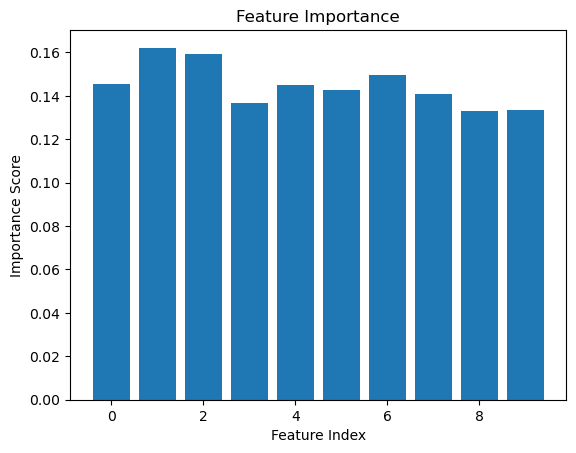

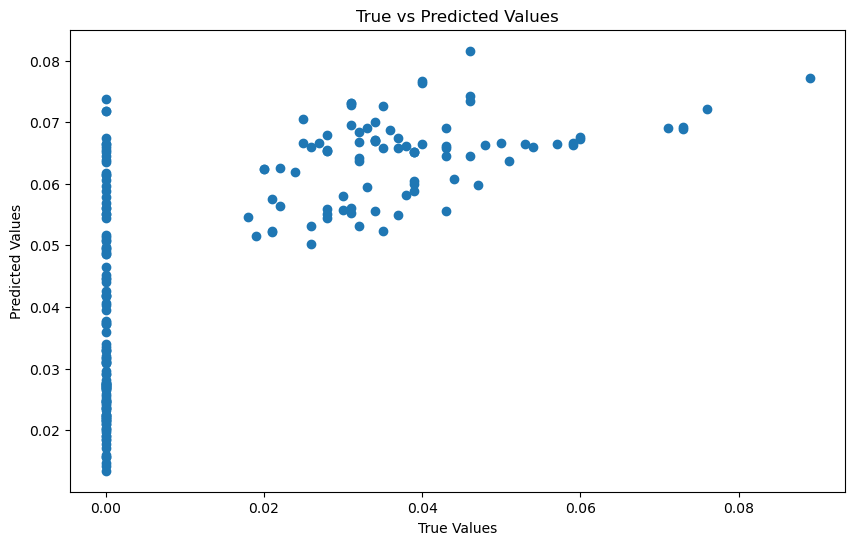

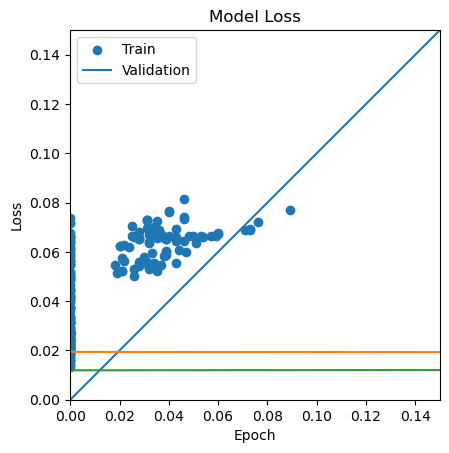

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 17ms/step - loss: 0.0600 - val_loss: 0.0035 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0509 - val_loss: 0.0059 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0426 - val_loss: 0.0073 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0373 - val_loss: 0.0069 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0418 - val_loss: 0.0069 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0404 - val_loss: 0.0062 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0384 - val_loss: 0.0053 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0356 - val_loss: 0.0049 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0371 - val_loss: 0.0044 - lr: 0.

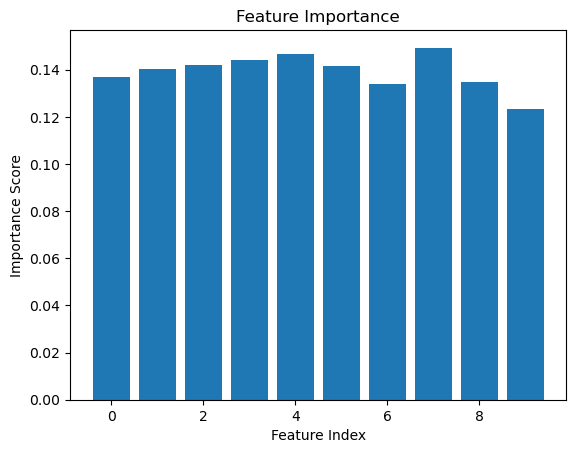

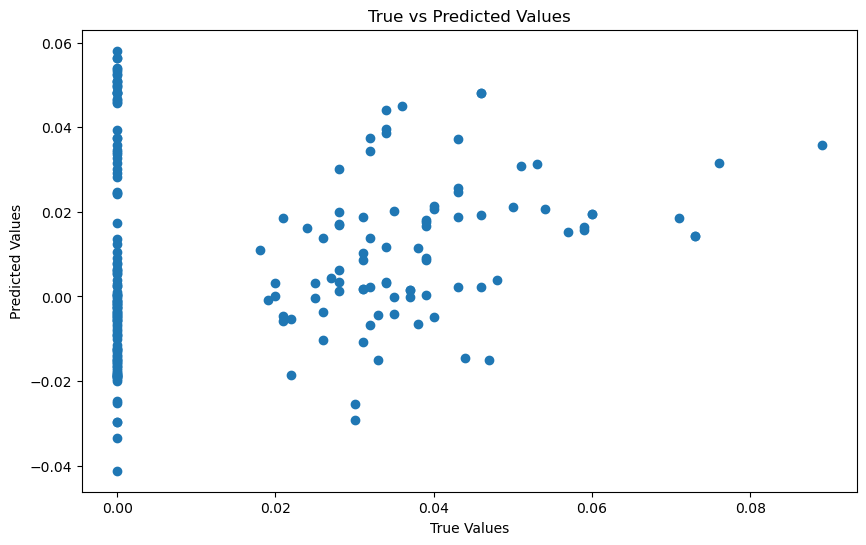

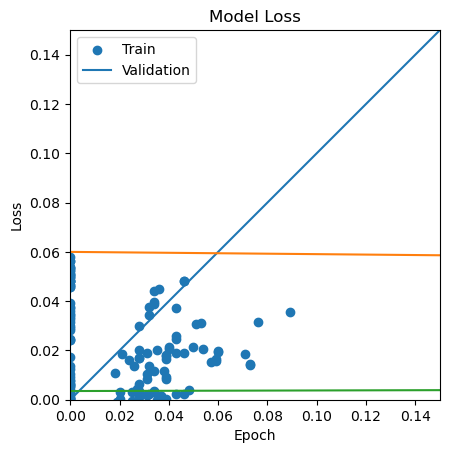

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 15ms/step - loss: 0.0170 - val_loss: 0.0408 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0131 - val_loss: 0.0369 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0106 - val_loss: 0.0342 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0090 - val_loss: 0.0323 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0078 - val_loss: 0.0309 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0070 - val_loss: 0.0299 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0063 - val_loss: 0.0291 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0058 - val_loss: 0.0286 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0053 - val_loss: 0.0281 - lr: 0.

28/28 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0252 - lr: 0.0010
Epoch 74/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0251 - lr: 0.0010
Epoch 75/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0251 - lr: 0.0010
Epoch 76/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0250 - lr: 0.0010
Epoch 77/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0250 - lr: 0.0010
Epoch 78/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0249 - lr: 0.0010
Epoch 79/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0249 - lr: 0.0010
Epoch 80/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 0.0248 - lr: 0.0010
Epoch 81/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 0.0248 

28/28 [==============================] - 0s 10ms/step - loss: 8.0605e-04 - val_loss: 0.0226 - lr: 0.0010
Epoch 144/200
28/28 [==============================] - 0s 10ms/step - loss: 8.0289e-04 - val_loss: 0.0226 - lr: 0.0010
Epoch 145/200
28/28 [==============================] - 0s 10ms/step - loss: 7.9975e-04 - val_loss: 0.0226 - lr: 0.0010
Epoch 146/200
28/28 [==============================] - 0s 10ms/step - loss: 7.9670e-04 - val_loss: 0.0226 - lr: 0.0010
Epoch 147/200
28/28 [==============================] - 0s 11ms/step - loss: 7.9361e-04 - val_loss: 0.0225 - lr: 0.0010
Epoch 148/200
28/28 [==============================] - 0s 10ms/step - loss: 7.9067e-04 - val_loss: 0.0225 - lr: 0.0010
Epoch 149/200
28/28 [==============================] - 0s 10ms/step - loss: 7.8780e-04 - val_loss: 0.0225 - lr: 0.0010
Epoch 150/200
28/28 [==============================] - 0s 11ms/step - loss: 7.8490e-04 - val_loss: 0.0225 - lr: 0.0010
Epoch 151/200
28/28 [==============================] - 0s 11ms

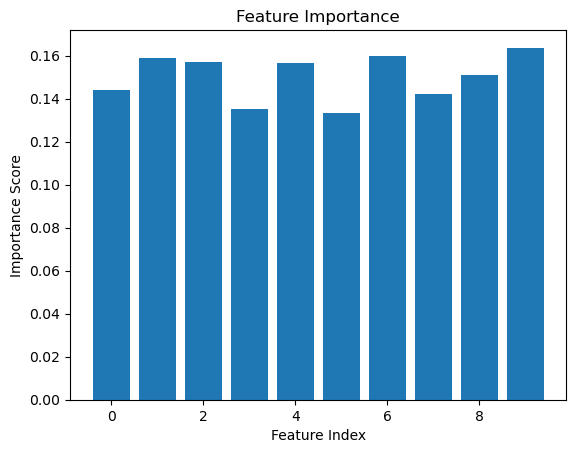

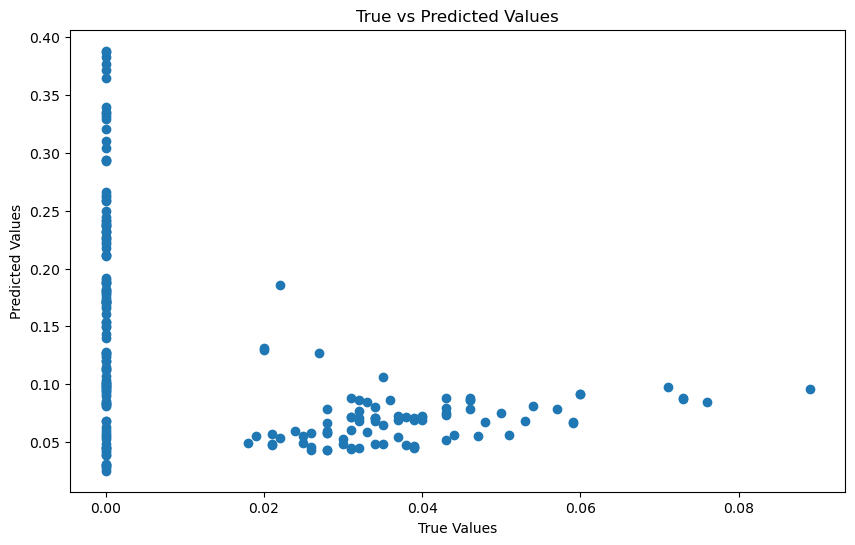

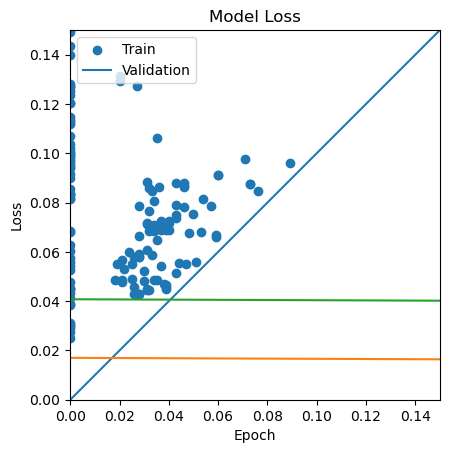

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 16ms/step - loss: 0.0764 - val_loss: 0.0290 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0456 - val_loss: 0.0128 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0314 - val_loss: 0.0071 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0276 - val_loss: 0.0057 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0251 - val_loss: 0.0057 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0234 - val_loss: 0.0061 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0224 - val_loss: 0.0067 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0239 - val_loss: 0.0073 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0226 - val_loss: 0.0076 - lr: 0.

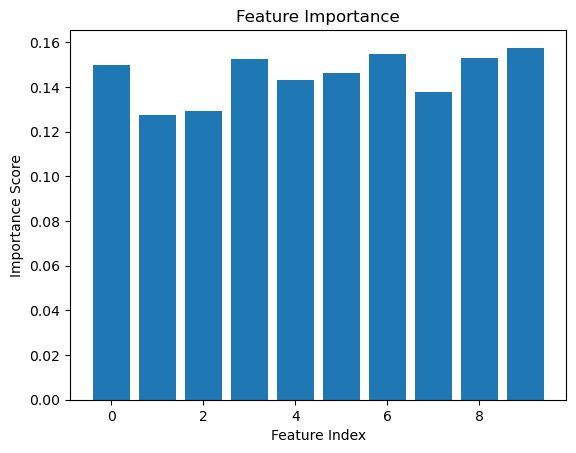

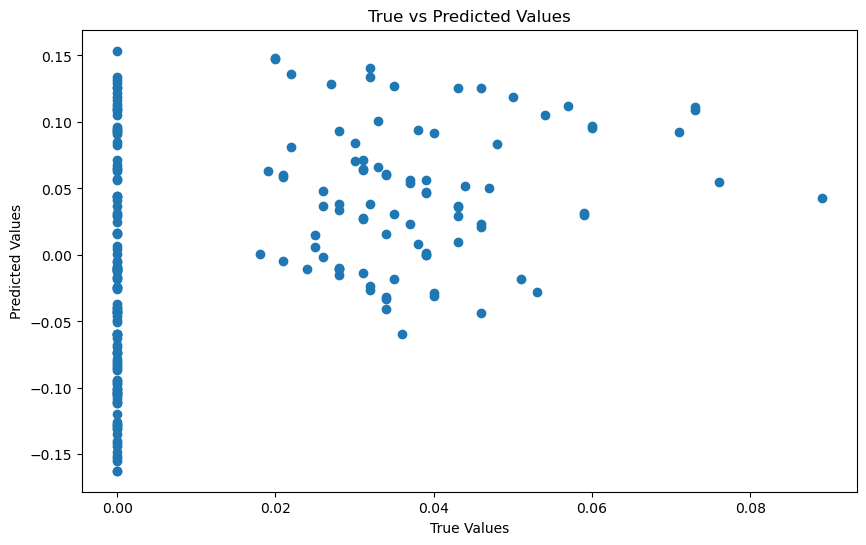

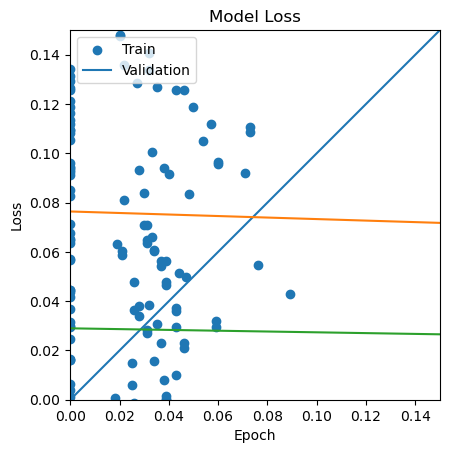

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 16ms/step - loss: 0.2313 - val_loss: 0.0142 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 0s 12ms/step - loss: 0.1244 - val_loss: 0.0024 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0765 - val_loss: 0.0040 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0562 - val_loss: 0.0096 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0457 - val_loss: 0.0152 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0394 - val_loss: 0.0201 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0376 - val_loss: 0.0242 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0347 - val_loss: 0.0271 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0340 - val_loss: 0.0297 - lr: 0.

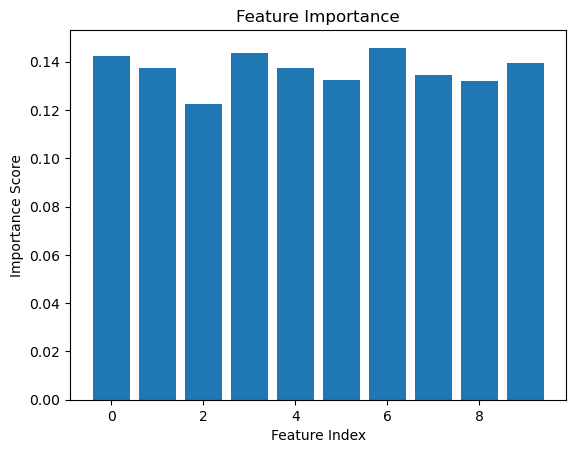

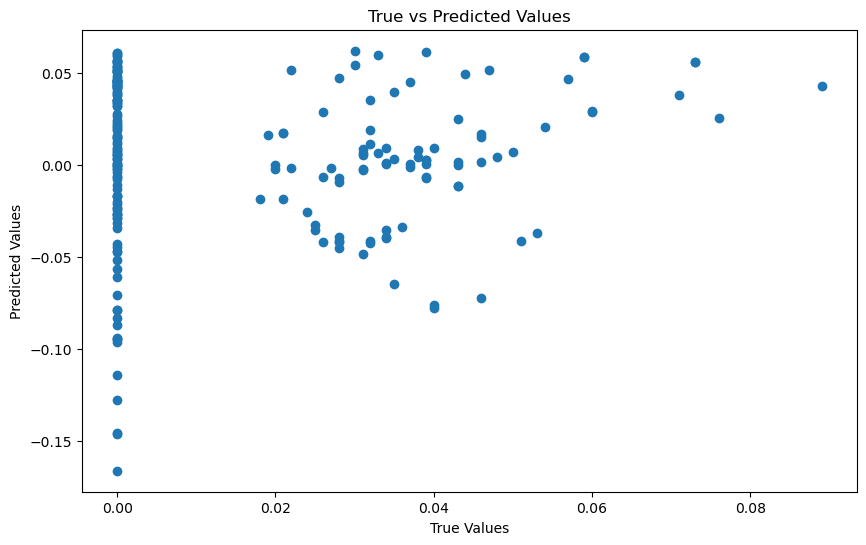

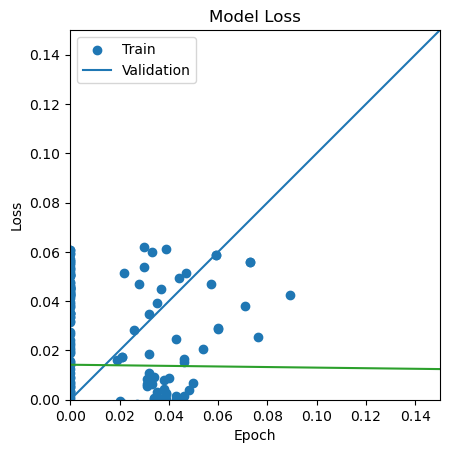

C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epoch 1/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0033 - val_loss: 0.0048 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0018 - val_loss: 0.0042 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0013 - val_loss: 0.0045 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0010 - val_loss: 0.0047 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 1s 9ms/step - loss: 8.3702e-04 - val_loss: 0.0042 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 1s 9ms/step - loss: 7.2519e-04 - val_loss: 0.0045 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 1s 9ms/step - loss: 6.4517e-04 - val_loss: 0.0045 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 1s 9ms/step - loss: 5.8505e-04 - val_loss: 0.0045 - lr: 0.0100
Epoch 9/200
110/110 [==============================] - 1s 9ms/step - lo

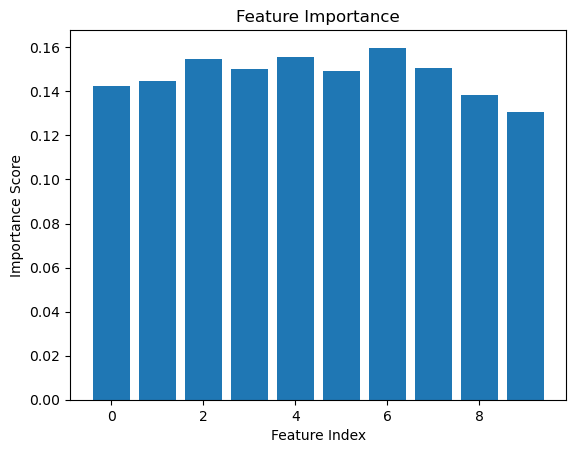

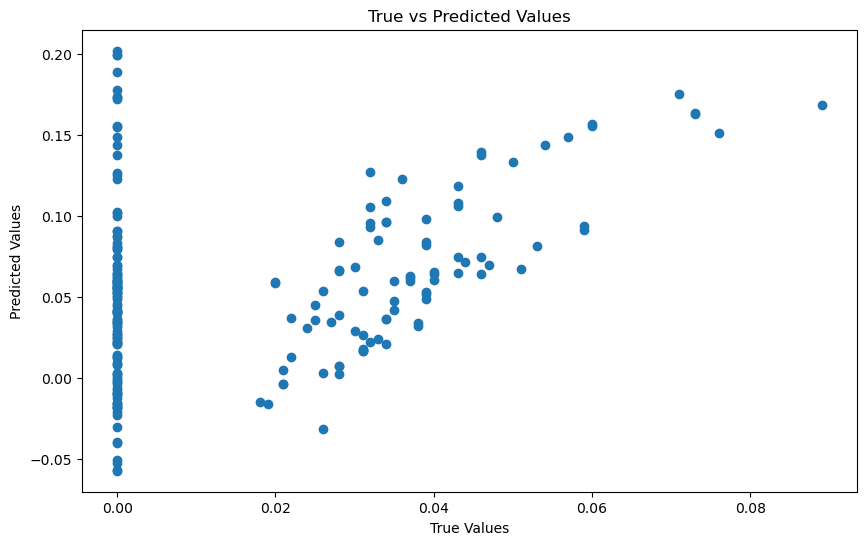

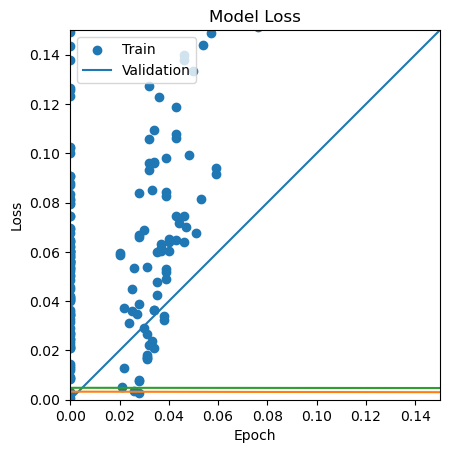

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 12ms/step - loss: 0.0160 - val_loss: 0.0034 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0105 - val_loss: 0.0024 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0080 - val_loss: 0.0021 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0067 - val_loss: 0.0018 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0055 - val_loss: 0.0016 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0057 - val_loss: 0.0019 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0051 - val_loss: 0.0020 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 1s 12ms/step - loss: 0.0048 - val_loss: 0.0015 - lr: 0.0100
Epoch 9/200
110/110 [==============================] - 1s 12ms/step - loss: 0.0043 - val_los

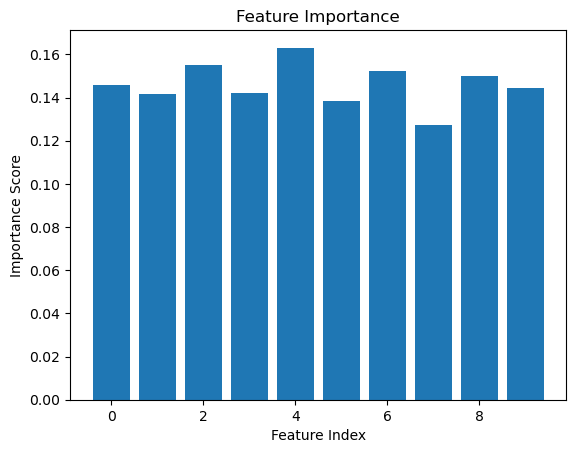

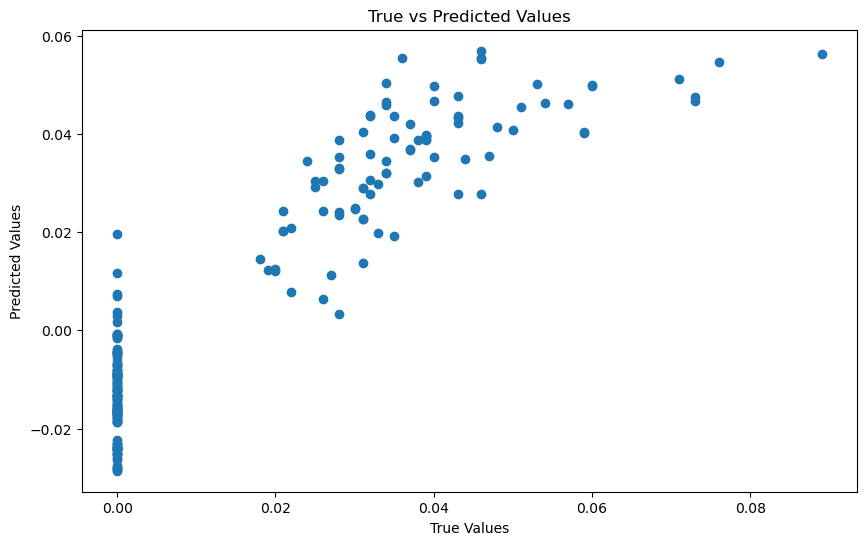

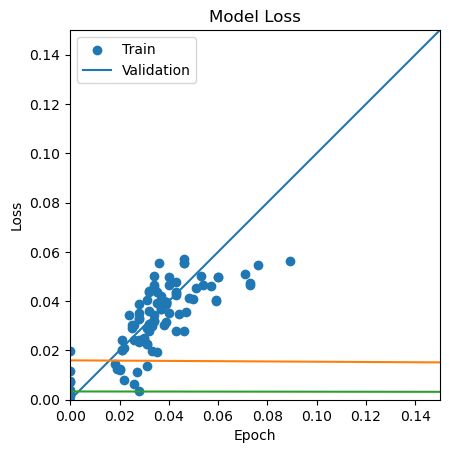

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 12ms/step - loss: 0.0367 - val_loss: 0.0095 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0200 - val_loss: 0.0083 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0149 - val_loss: 0.0106 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0120 - val_loss: 0.0065 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0101 - val_loss: 0.0068 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0087 - val_loss: 0.0056 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0076 - val_loss: 0.0062 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0072 - val_loss: 0.0053 - lr: 0.0100
Epoch 9/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0068 - val_los

Epoch 71/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0014 - val_loss: 4.8980e-04 - lr: 0.0100
Epoch 72/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0014 - val_loss: 4.9924e-04 - lr: 0.0100
Epoch 73/200
110/110 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 5.3875e-04 - lr: 0.0100
Epoch 74/200
110/110 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 4.2764e-04 - lr: 0.0100
Epoch 75/200
110/110 [==============================] - 1s 11ms/step - loss: 0.0013 - val_loss: 5.4253e-04 - lr: 0.0100
Epoch 76/200
110/110 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 4.9939e-04 - lr: 0.0100
Epoch 77/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 5.2008e-04 - lr: 0.0100
Epoch 78/200
110/110 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 5.4108e-04 - lr: 0.0100
Epoch 79/200
110/110 [==================

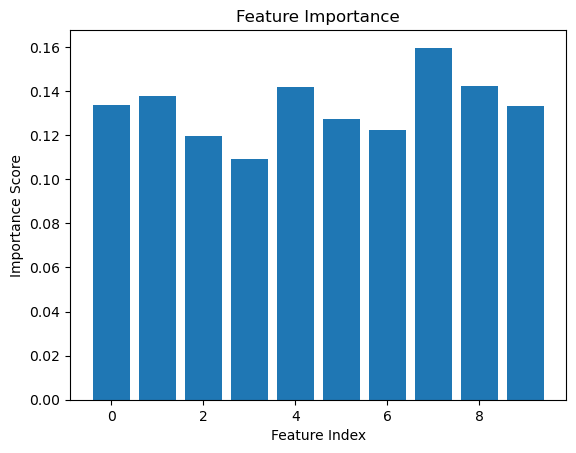

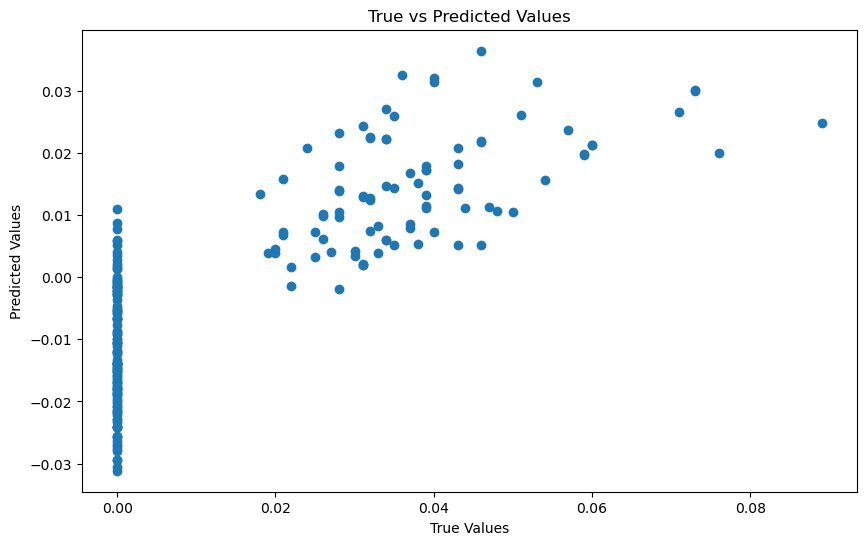

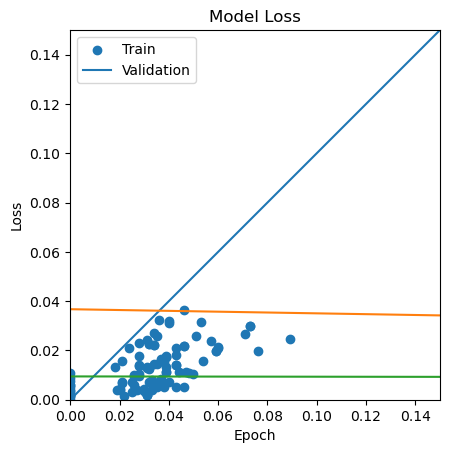

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 12ms/step - loss: 0.0040 - val_loss: 0.0053 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0021 - val_loss: 0.0053 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 9ms/step - loss: 0.0015 - val_loss: 0.0054 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 0.0054 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 10ms/step - loss: 9.0714e-04 - val_loss: 0.0054 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 10ms/step - loss: 7.7850e-04 - val_loss: 0.0054 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 11ms/step - loss: 6.9411e-04 - val_loss: 0.0053 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 10ms/step - loss: 6.3505e-04 - val_loss: 0.0053 - lr: 0.0100
Epoch 9/200
55/55 [==============================] - 1s 11ms/step - loss: 5.9187e-04 - val_lo

Epoch 71/200
55/55 [==============================] - 1s 11ms/step - loss: 2.5057e-04 - val_loss: 0.0038 - lr: 0.0100
Epoch 72/200
55/55 [==============================] - 1s 11ms/step - loss: 2.4847e-04 - val_loss: 0.0038 - lr: 0.0100
Epoch 73/200
55/55 [==============================] - 1s 12ms/step - loss: 2.4795e-04 - val_loss: 0.0038 - lr: 0.0100
Epoch 74/200
55/55 [==============================] - 1s 10ms/step - loss: 2.4584e-04 - val_loss: 0.0038 - lr: 0.0100
Epoch 75/200
55/55 [==============================] - 1s 11ms/step - loss: 2.4372e-04 - val_loss: 0.0038 - lr: 0.0100
Epoch 76/200
55/55 [==============================] - 1s 12ms/step - loss: 2.4308e-04 - val_loss: 0.0038 - lr: 0.0100
Epoch 77/200
55/55 [==============================] - 1s 11ms/step - loss: 2.4129e-04 - val_loss: 0.0037 - lr: 0.0100
Epoch 78/200
55/55 [==============================] - 1s 10ms/step - loss: 2.4013e-04 - val_loss: 0.0037 - lr: 0.0100
Epoch 79/200
55/55 [==============================] - 1s

55/55 [==============================] - 1s 10ms/step - loss: 1.8507e-04 - val_loss: 0.0031 - lr: 0.0100
Epoch 141/200
55/55 [==============================] - 1s 11ms/step - loss: 1.8433e-04 - val_loss: 0.0031 - lr: 0.0100
Epoch 142/200
55/55 [==============================] - 1s 11ms/step - loss: 1.8362e-04 - val_loss: 0.0031 - lr: 0.0100
Epoch 143/200
55/55 [==============================] - 1s 11ms/step - loss: 1.8330e-04 - val_loss: 0.0031 - lr: 0.0100
Epoch 144/200
55/55 [==============================] - 1s 10ms/step - loss: 1.8269e-04 - val_loss: 0.0031 - lr: 0.0100
Epoch 145/200
55/55 [==============================] - 1s 10ms/step - loss: 1.8226e-04 - val_loss: 0.0031 - lr: 0.0100
Epoch 146/200
55/55 [==============================] - 1s 10ms/step - loss: 1.8163e-04 - val_loss: 0.0031 - lr: 0.0100
Epoch 147/200
55/55 [==============================] - 1s 11ms/step - loss: 1.8105e-04 - val_loss: 0.0031 - lr: 0.0100
Epoch 148/200
55/55 [==============================] - 1s 11ms

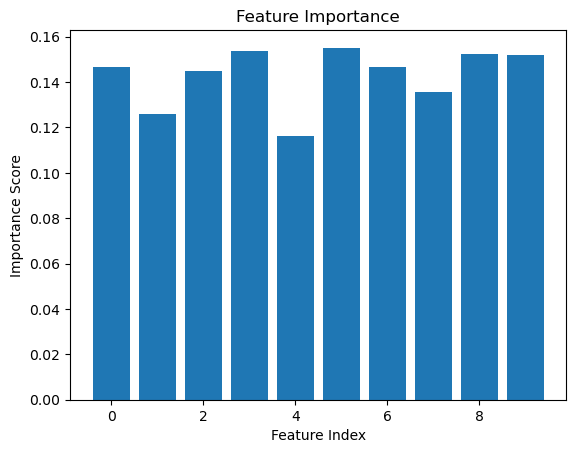

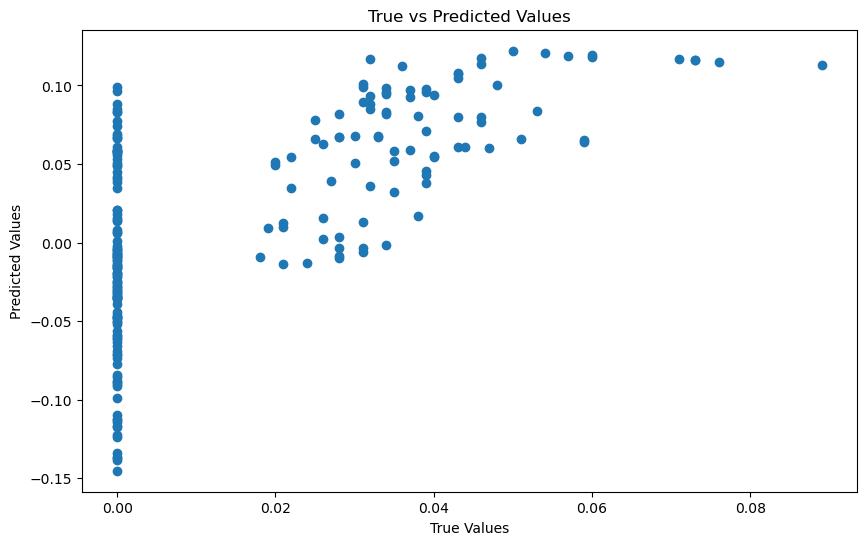

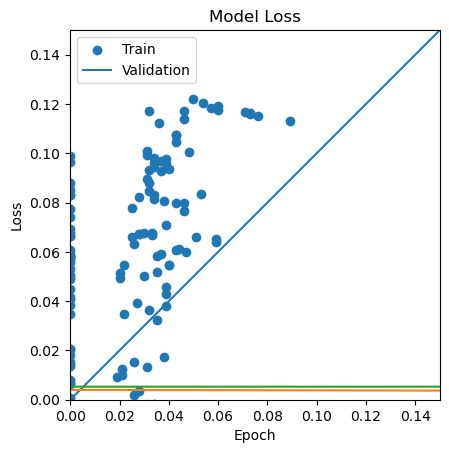

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 18ms/step - loss: 0.0236 - val_loss: 0.0136 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 15ms/step - loss: 0.0162 - val_loss: 0.0094 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 15ms/step - loss: 0.0139 - val_loss: 0.0074 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 12ms/step - loss: 0.0114 - val_loss: 0.0057 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 9ms/step - loss: 0.0111 - val_loss: 0.0044 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0104 - val_loss: 0.0042 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 9ms/step - loss: 0.0093 - val_loss: 0.0034 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0080 - val_loss: 0.0022 - lr: 0.0100
Epoch 9/200
55/55 [==============================] - 1s 9ms/step - loss: 0.0078 - val_loss: 0.0024 - lr: 0.010

55/55 [==============================] - 1s 9ms/step - loss: 0.0019 - val_loss: 4.8626e-04 - lr: 0.0100
Epoch 72/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0018 - val_loss: 4.7761e-04 - lr: 0.0100
Epoch 73/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0018 - val_loss: 4.8931e-04 - lr: 0.0100
Epoch 74/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0019 - val_loss: 4.8138e-04 - lr: 0.0100
Epoch 75/200
55/55 [==============================] - 1s 9ms/step - loss: 0.0019 - val_loss: 4.8381e-04 - lr: 0.0100
Epoch 76/200
55/55 [==============================] - 1s 9ms/step - loss: 0.0018 - val_loss: 4.7888e-04 - lr: 0.0100
Epoch 77/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0016 - val_loss: 4.7101e-04 - lr: 0.0100
Epoch 78/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0018 - val_loss: 4.5758e-04 - lr: 0.0100
Epoch 79/200
55/55 [==============================] - 1s 10ms/step - los

55/55 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 2.9940e-04 - lr: 0.0100
Epoch 141/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0012 - val_loss: 2.9821e-04 - lr: 0.0100
Epoch 142/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 2.9868e-04 - lr: 0.0100
Epoch 143/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 3.0568e-04 - lr: 0.0100
Epoch 144/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0012 - val_loss: 2.9936e-04 - lr: 0.0100
Epoch 145/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0012 - val_loss: 2.9166e-04 - lr: 0.0100
Epoch 146/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 2.9126e-04 - lr: 0.0100
Epoch 147/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0012 - val_loss: 2.9595e-04 - lr: 0.0100
Epoch 148/200
55/55 [==============================] - 1s 11ms

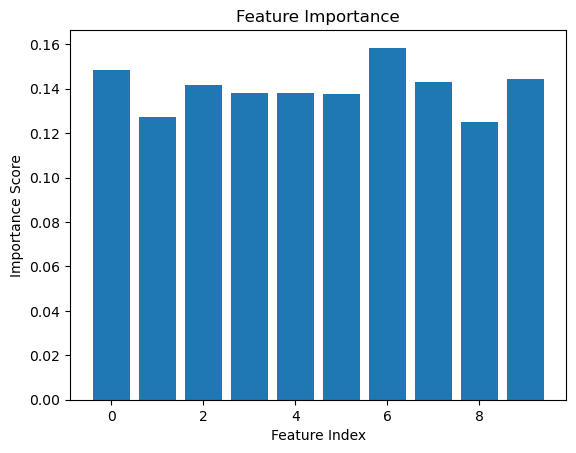

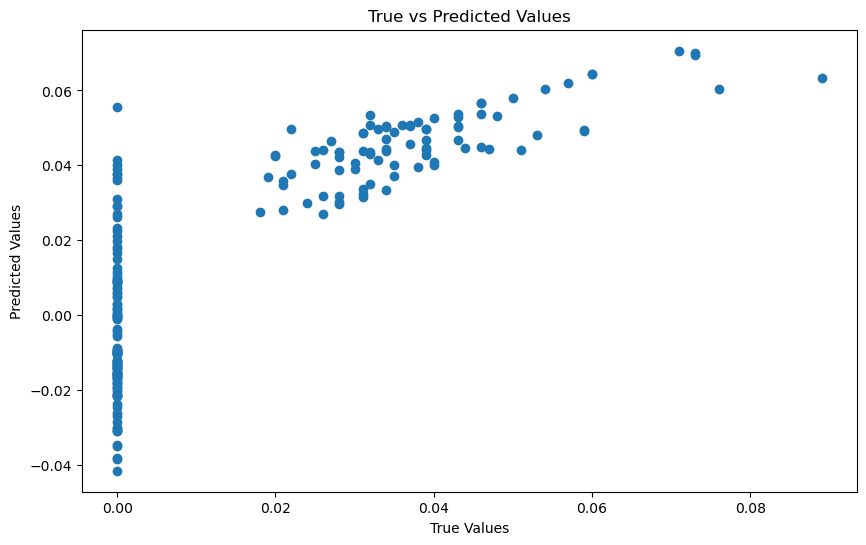

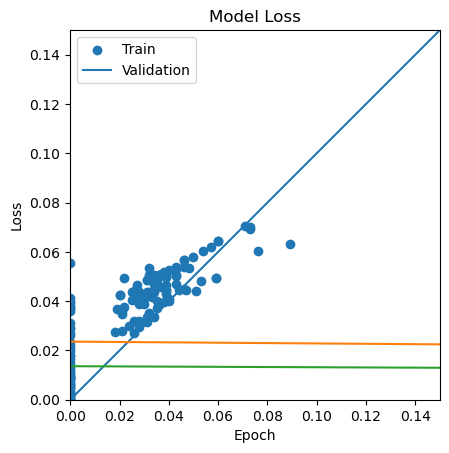

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 13ms/step - loss: 0.0341 - val_loss: 0.0066 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0241 - val_loss: 0.0059 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0180 - val_loss: 0.0039 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0172 - val_loss: 0.0034 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0137 - val_loss: 0.0030 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0125 - val_loss: 0.0016 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0114 - val_loss: 0.0016 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0106 - val_loss: 0.0022 - lr: 0.0100
Epoch 9/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0096 - val_loss: 0.0020 - lr: 0.

55/55 [==============================] - 1s 11ms/step - loss: 0.0021 - val_loss: 2.8131e-04 - lr: 0.0100
Epoch 72/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0020 - val_loss: 2.8541e-04 - lr: 0.0100
Epoch 73/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0021 - val_loss: 3.1008e-04 - lr: 0.0100
Epoch 74/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0020 - val_loss: 3.0198e-04 - lr: 0.0100
Epoch 75/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0021 - val_loss: 2.7108e-04 - lr: 0.0100
Epoch 76/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0021 - val_loss: 2.6539e-04 - lr: 0.0100
Epoch 77/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0019 - val_loss: 2.7706e-04 - lr: 0.0100
Epoch 78/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0021 - val_loss: 2.7180e-04 - lr: 0.0100
Epoch 79/200
55/55 [==============================] - 1s 11ms/step - 

55/55 [==============================] - 1s 11ms/step - loss: 0.0014 - val_loss: 2.3856e-04 - lr: 0.0100
Epoch 141/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0014 - val_loss: 2.3320e-04 - lr: 0.0100
Epoch 142/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0014 - val_loss: 2.3978e-04 - lr: 0.0100
Epoch 143/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0013 - val_loss: 2.3572e-04 - lr: 0.0100
Epoch 144/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 2.3771e-04 - lr: 0.0100
Epoch 145/200
55/55 [==============================] - 1s 11ms/step - loss: 0.0013 - val_loss: 2.3558e-04 - lr: 0.0100
Epoch 146/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 2.3526e-04 - lr: 0.0100
Epoch 147/200
55/55 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 2.3093e-04 - lr: 0.0100
Epoch 148/200
55/55 [==============================] - 1s 11ms

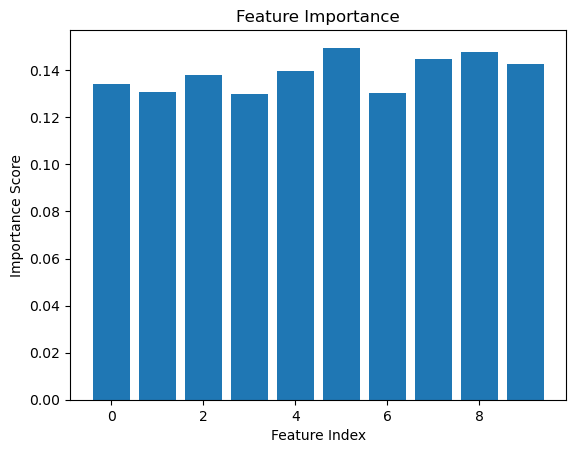

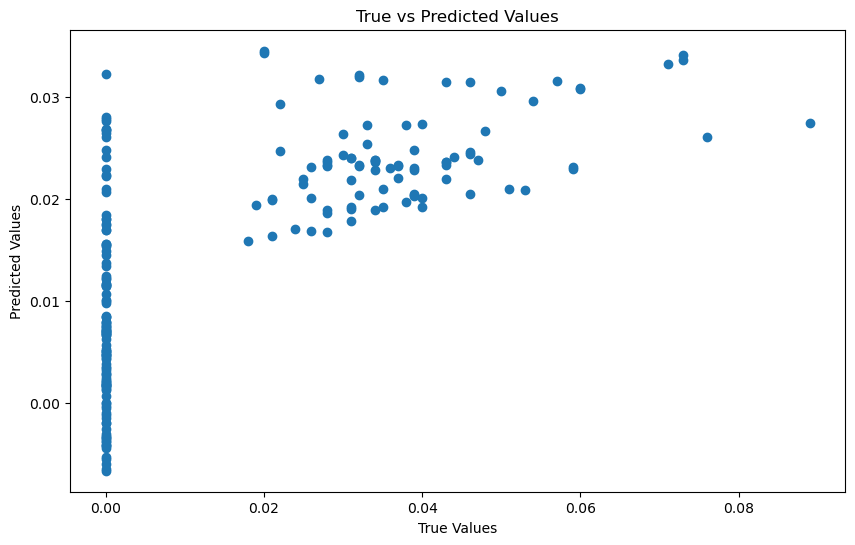

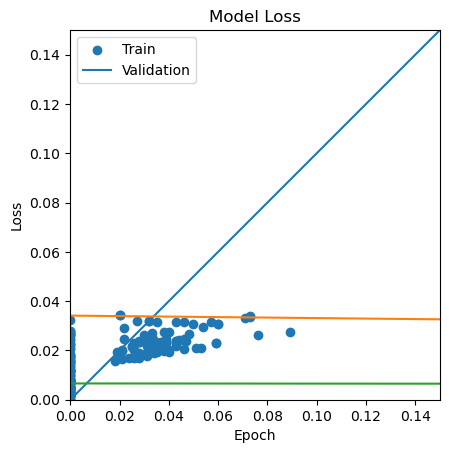

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 15ms/step - loss: 0.0046 - val_loss: 0.0044 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0027 - val_loss: 0.0037 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0034 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 0.0029 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0016 - val_loss: 0.0025 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 0.0025 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0023 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0024 - lr: 0.0100
Epoch 9/200
28/28 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0023 - lr: 0.

28/28 [==============================] - 0s 10ms/step - loss: 3.8143e-04 - val_loss: 0.0011 - lr: 0.0100
Epoch 72/200
28/28 [==============================] - 0s 10ms/step - loss: 3.7837e-04 - val_loss: 0.0011 - lr: 0.0100
Epoch 73/200
28/28 [==============================] - 0s 11ms/step - loss: 3.7465e-04 - val_loss: 0.0011 - lr: 0.0100
Epoch 74/200
28/28 [==============================] - 0s 10ms/step - loss: 3.7224e-04 - val_loss: 0.0011 - lr: 0.0100
Epoch 75/200
28/28 [==============================] - 0s 11ms/step - loss: 3.6913e-04 - val_loss: 0.0011 - lr: 0.0100
Epoch 76/200
28/28 [==============================] - 0s 10ms/step - loss: 3.6645e-04 - val_loss: 0.0011 - lr: 0.0100
Epoch 77/200
28/28 [==============================] - 0s 12ms/step - loss: 3.6319e-04 - val_loss: 0.0011 - lr: 0.0100
Epoch 78/200
28/28 [==============================] - 0s 10ms/step - loss: 3.6125e-04 - val_loss: 0.0011 - lr: 0.0100
Epoch 79/200
28/28 [==============================] - 0s 10ms/step - 

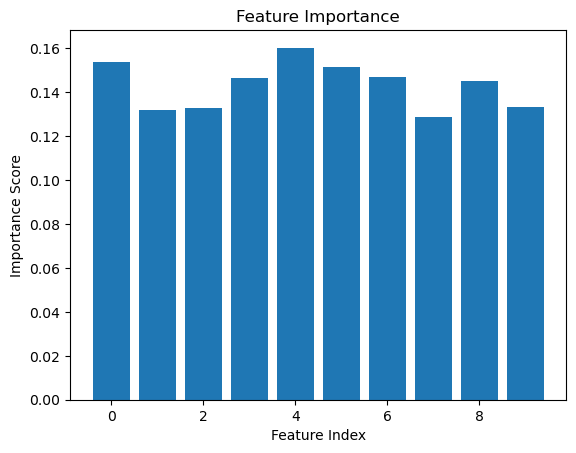

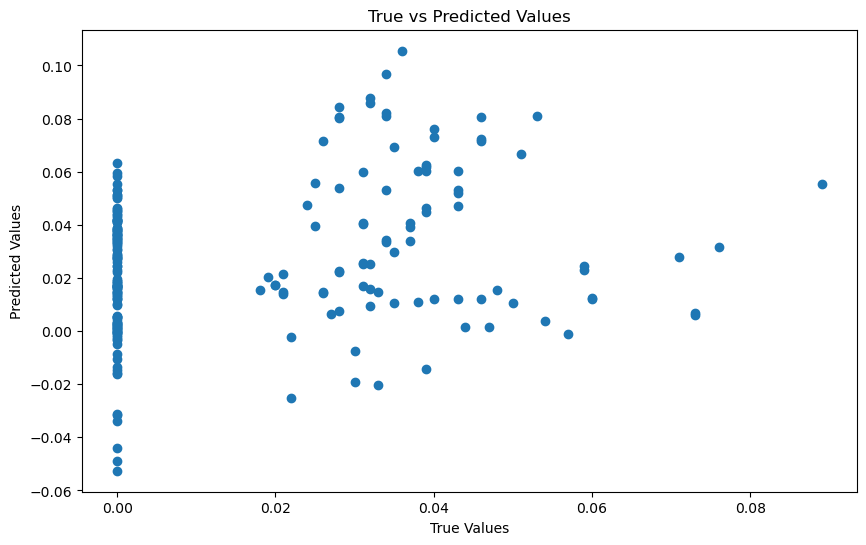

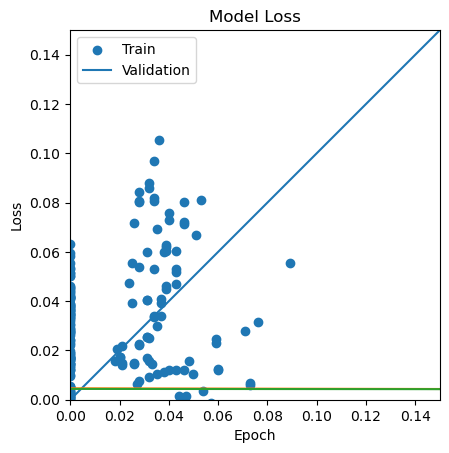

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 16ms/step - loss: 0.0348 - val_loss: 0.0122 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0189 - val_loss: 0.0151 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0162 - val_loss: 0.0149 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0137 - val_loss: 0.0140 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0121 - val_loss: 0.0134 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0110 - val_loss: 0.0118 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0106 - val_loss: 0.0108 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0101 - val_loss: 0.0095 - lr: 0.0100
Epoch 9/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0089 - lr: 0.

28/28 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 7.5752e-04 - lr: 0.0100
Epoch 73/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 7.9071e-04 - lr: 0.0100
Epoch 74/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0024 - val_loss: 7.8339e-04 - lr: 0.0100
Epoch 75/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 7.8874e-04 - lr: 0.0100
Epoch 76/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 7.9474e-04 - lr: 0.0100
Epoch 77/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 7.6464e-04 - lr: 0.0100
Epoch 78/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 7.3888e-04 - lr: 0.0100
Epoch 79/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 7.1354e-04 - lr: 0.0100
Epoch 80/200
28/28 [==============================] - 0s 12ms/step - 

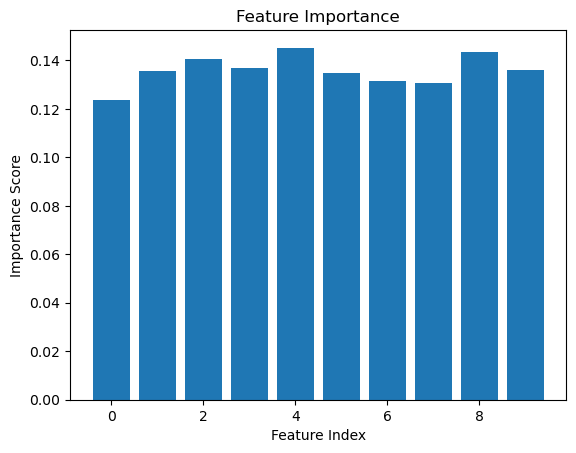

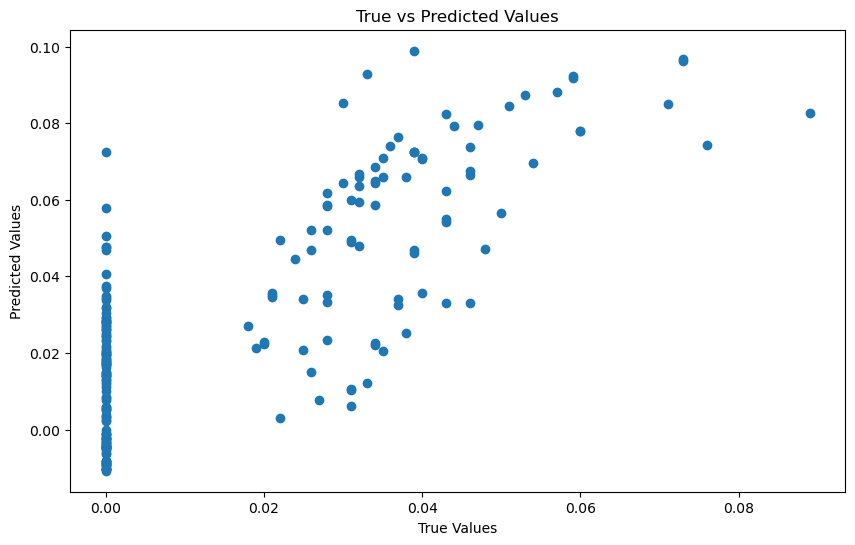

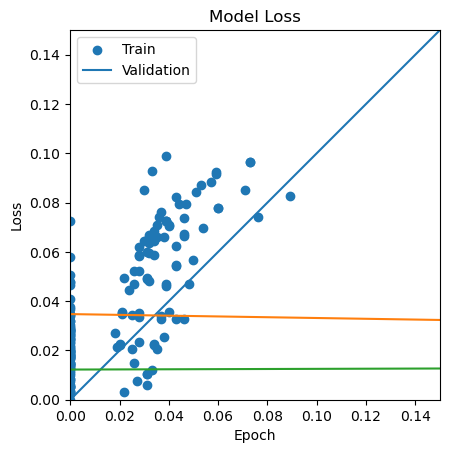

C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epoch 1/200
28/28 [==============================] - 1s 16ms/step - loss: 0.0545 - val_loss: 0.0080 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0397 - val_loss: 0.0086 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0348 - val_loss: 0.0072 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0265 - val_loss: 0.0064 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 0s 13ms/step - loss: 0.0257 - val_loss: 0.0053 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 0s 13ms/step - loss: 0.0215 - val_loss: 0.0053 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 0s 18ms/step - loss: 0.0193 - val_loss: 0.0046 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 0s 17ms/step - loss: 0.0184 - val_loss: 0.0041 - lr: 0.0100
Epoch 9/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0184 - val_loss: 0.0

Epoch 73/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0037 - val_loss: 9.6912e-04 - lr: 0.0100
Epoch 74/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 9.6402e-04 - lr: 0.0100
Epoch 75/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 9.4761e-04 - lr: 0.0100
Epoch 76/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0038 - val_loss: 9.2712e-04 - lr: 0.0100
Epoch 77/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 9.1969e-04 - lr: 0.0100
Epoch 78/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0038 - val_loss: 9.0958e-04 - lr: 0.0100
Epoch 79/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0037 - val_loss: 9.1519e-04 - lr: 0.0100
Epoch 80/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0040 - val_loss: 8.8732e-04 - lr: 0.0100
Epoch 81/200
28/28 [==============================] - 0s

28/28 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 5.0012e-04 - lr: 0.0100
Epoch 143/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0026 - val_loss: 4.9432e-04 - lr: 0.0100
Epoch 144/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 4.9620e-04 - lr: 0.0100
Epoch 145/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 4.9262e-04 - lr: 0.0100
Epoch 146/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 4.8360e-04 - lr: 0.0100
Epoch 147/200
28/28 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 4.8301e-04 - lr: 0.0100
Epoch 148/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0024 - val_loss: 4.7979e-04 - lr: 0.0100
Epoch 149/200
28/28 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 4.7433e-04 - lr: 0.0100
Epoch 150/200
28/28 [==============================] - 0s 12ms

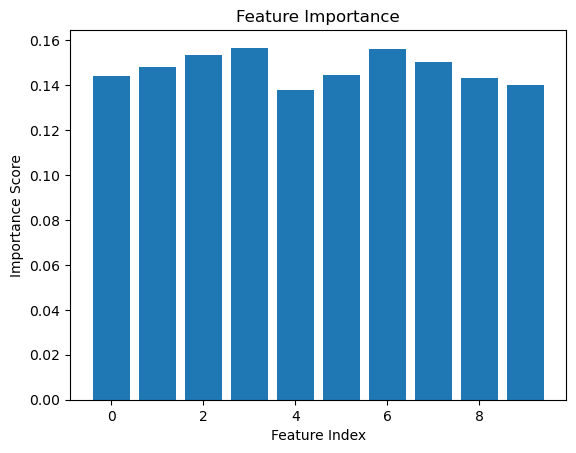

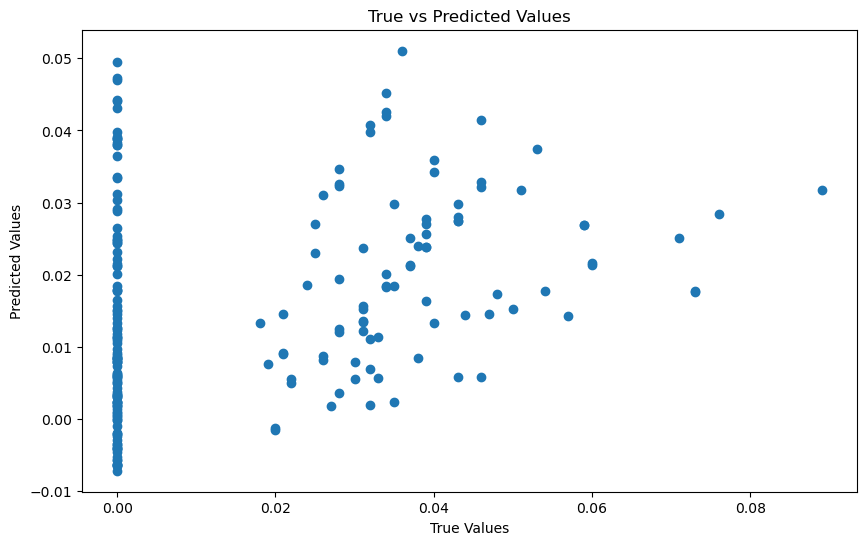

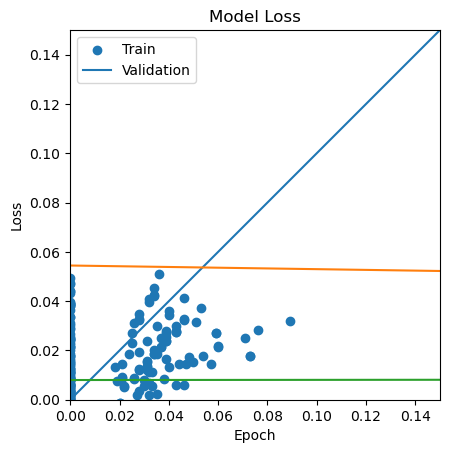

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 15ms/step - loss: 0.0023 - val_loss: 0.0018 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 2s 14ms/step - loss: 4.6709e-04 - val_loss: 3.7949e-04 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 2s 14ms/step - loss: 3.1417e-04 - val_loss: 9.4199e-04 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 2s 14ms/step - loss: 2.4276e-04 - val_loss: 0.0011 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 2s 14ms/step - loss: 2.2601e-04 - val_loss: 3.6833e-04 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 2s 14ms/step - loss: 1.9444e-04 - val_loss: 7.7485e-04 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 2s 14ms/step - loss: 1.9298e-04 - val_loss: 4.5778e-04 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 2s 14ms/step - loss: 1.6796e-04 - val_loss: 7.7990e-04 - lr: 0.0010
Epoch 9/200
110/110 [===================

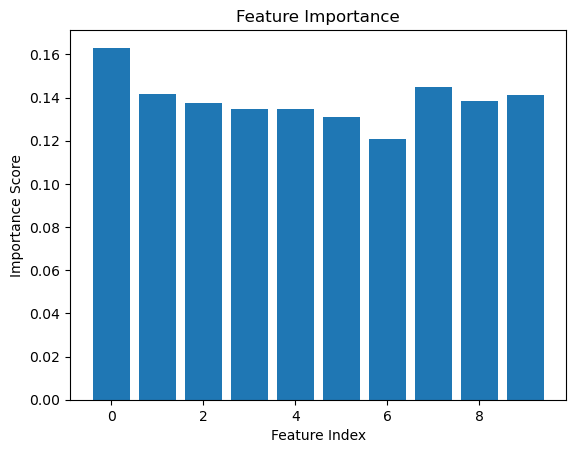

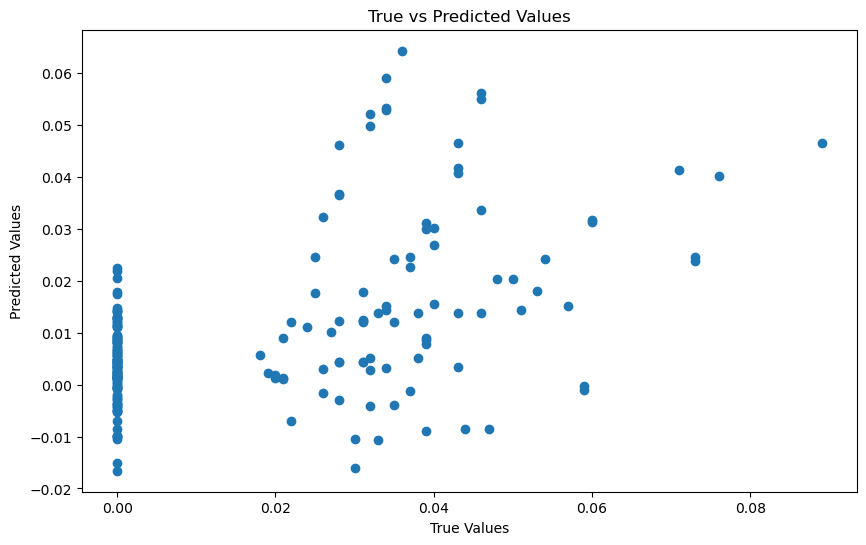

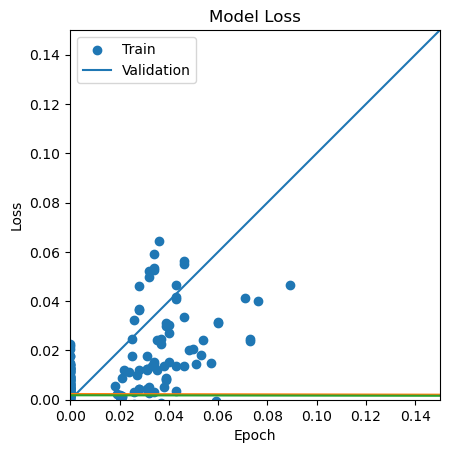

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 16ms/step - loss: 0.0053 - val_loss: 3.4512e-04 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 2s 15ms/step - loss: 8.4548e-04 - val_loss: 8.7629e-05 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 2s 15ms/step - loss: 5.0011e-04 - val_loss: 1.0239e-04 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 2s 15ms/step - loss: 4.4080e-04 - val_loss: 9.2713e-05 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 2s 15ms/step - loss: 3.8216e-04 - val_loss: 1.3294e-04 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 2s 15ms/step - loss: 3.6166e-04 - val_loss: 1.3628e-04 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 2s 15ms/step - loss: 3.3016e-04 - val_loss: 1.3002e-04 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 2s 15ms/step - loss: 3.1800e-04 - val_loss: 1.5364e-04 - lr: 0.0010
Epoch 9/200
110/110 [===========

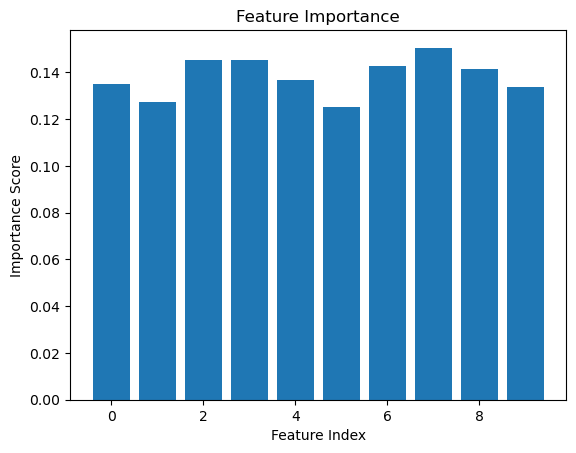

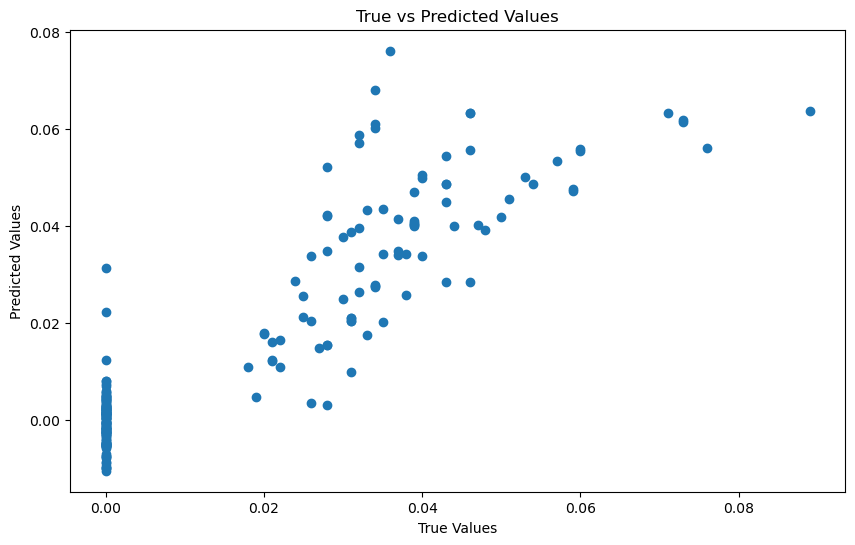

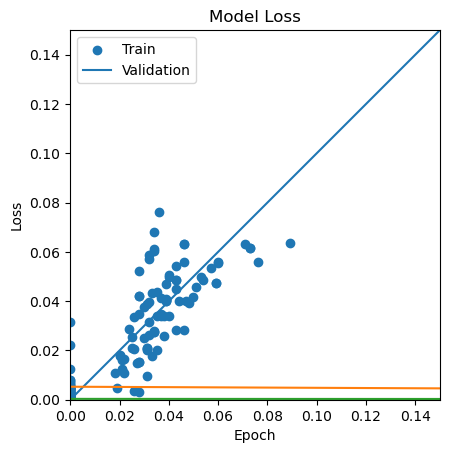

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 3s 16ms/step - loss: 0.0095 - val_loss: 4.9966e-04 - lr: 0.0010
Epoch 2/200
110/110 [==============================] - 2s 15ms/step - loss: 0.0015 - val_loss: 1.7716e-04 - lr: 0.0010
Epoch 3/200
110/110 [==============================] - 2s 15ms/step - loss: 7.1936e-04 - val_loss: 1.5490e-04 - lr: 0.0010
Epoch 4/200
110/110 [==============================] - 2s 15ms/step - loss: 5.8268e-04 - val_loss: 2.3646e-04 - lr: 0.0010
Epoch 5/200
110/110 [==============================] - 2s 15ms/step - loss: 5.3143e-04 - val_loss: 7.6267e-05 - lr: 0.0010
Epoch 6/200
110/110 [==============================] - 2s 15ms/step - loss: 4.2032e-04 - val_loss: 1.0970e-04 - lr: 0.0010
Epoch 7/200
110/110 [==============================] - 2s 15ms/step - loss: 3.7255e-04 - val_loss: 7.4964e-05 - lr: 0.0010
Epoch 8/200
110/110 [==============================] - 2s 15ms/step - loss: 3.6294e-04 - val_loss: 6.7676e-05 - lr: 0.0010
Epoch 9/200
110/110 [===============

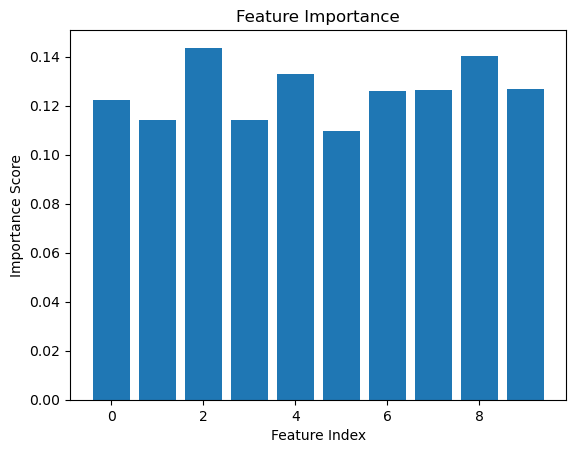

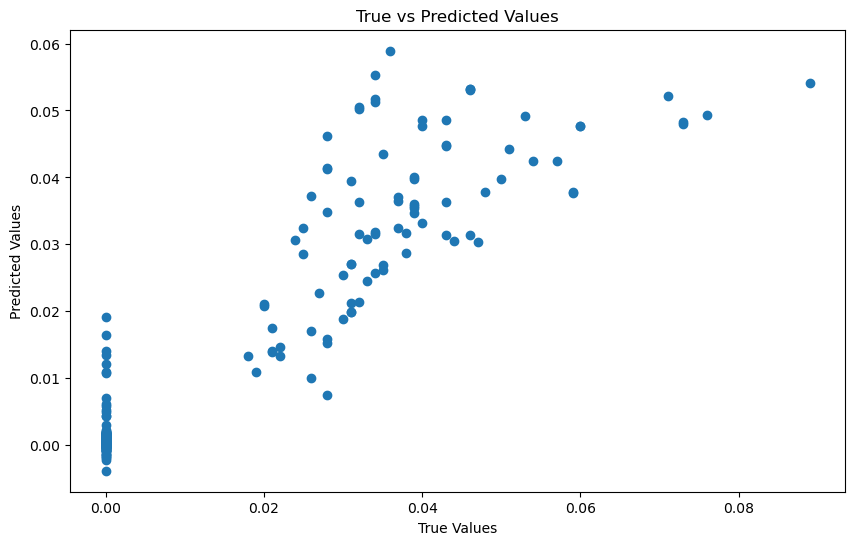

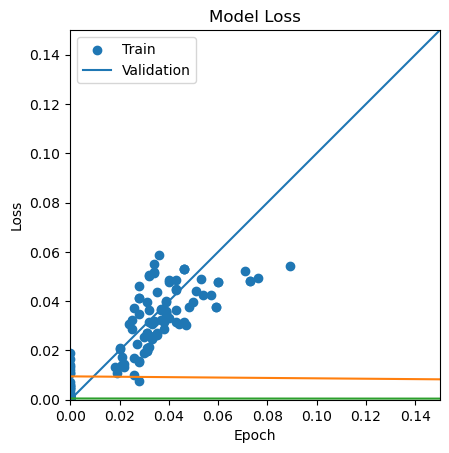

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 1s 17ms/step - loss: 0.0051 - val_loss: 0.0014 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 14ms/step - loss: 8.6829e-04 - val_loss: 0.0020 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 14ms/step - loss: 4.1851e-04 - val_loss: 8.5730e-04 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 14ms/step - loss: 3.4458e-04 - val_loss: 4.0567e-04 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 14ms/step - loss: 2.6354e-04 - val_loss: 5.5966e-04 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 14ms/step - loss: 2.4083e-04 - val_loss: 4.6652e-04 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 14ms/step - loss: 2.0936e-04 - val_loss: 2.5404e-04 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 14ms/step - loss: 2.1410e-04 - val_loss: 2.7334e-04 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 

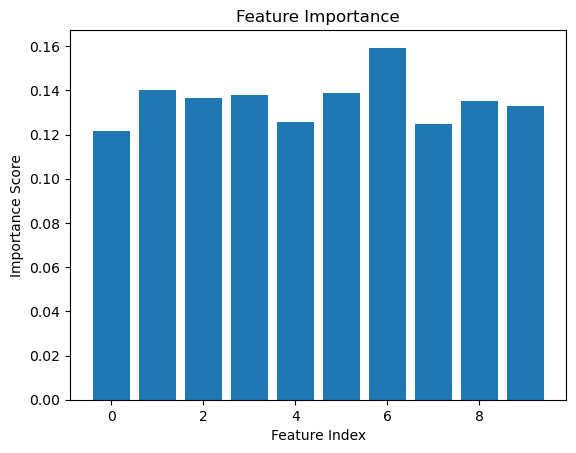

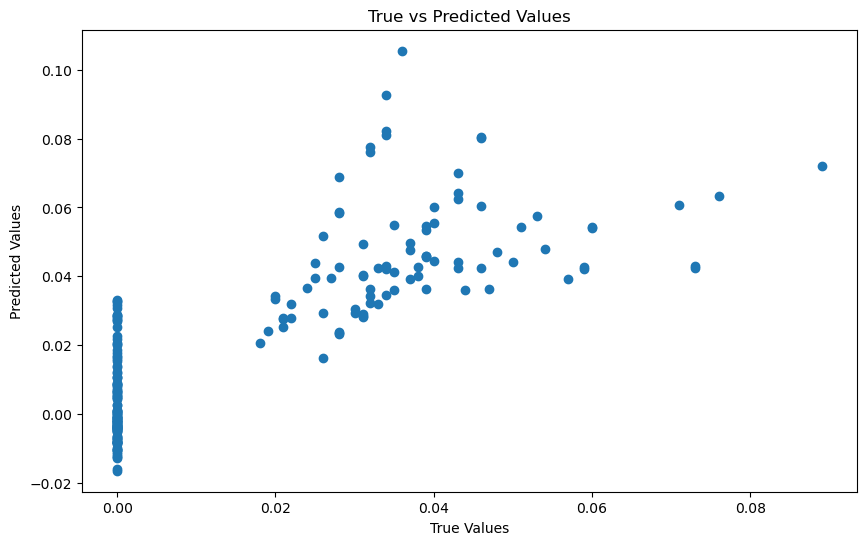

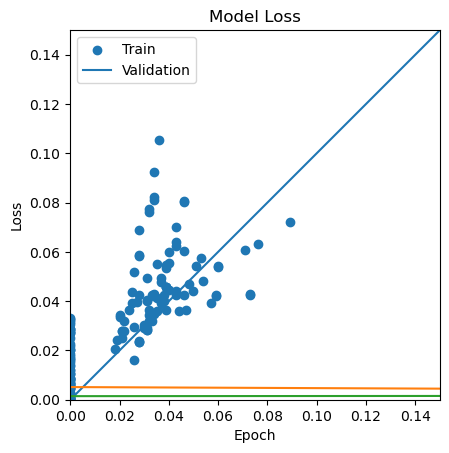

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 2s 19ms/step - loss: 0.0045 - val_loss: 4.7030e-04 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 16ms/step - loss: 9.9752e-04 - val_loss: 2.2851e-04 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 15ms/step - loss: 5.7420e-04 - val_loss: 1.4950e-04 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 15ms/step - loss: 4.7481e-04 - val_loss: 8.6784e-05 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 15ms/step - loss: 3.9725e-04 - val_loss: 6.6612e-05 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 16ms/step - loss: 3.8930e-04 - val_loss: 8.0330e-05 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 16ms/step - loss: 3.1736e-04 - val_loss: 9.1181e-05 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 16ms/step - loss: 3.2564e-04 - val_loss: 1.3463e-04 - lr: 0.0010
Epoch 9/200
55/55 [=============================

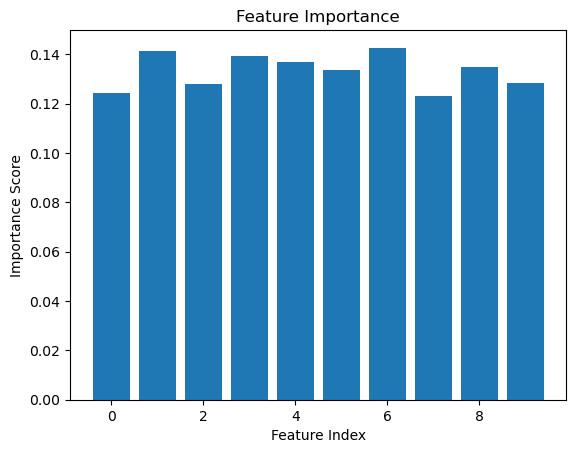

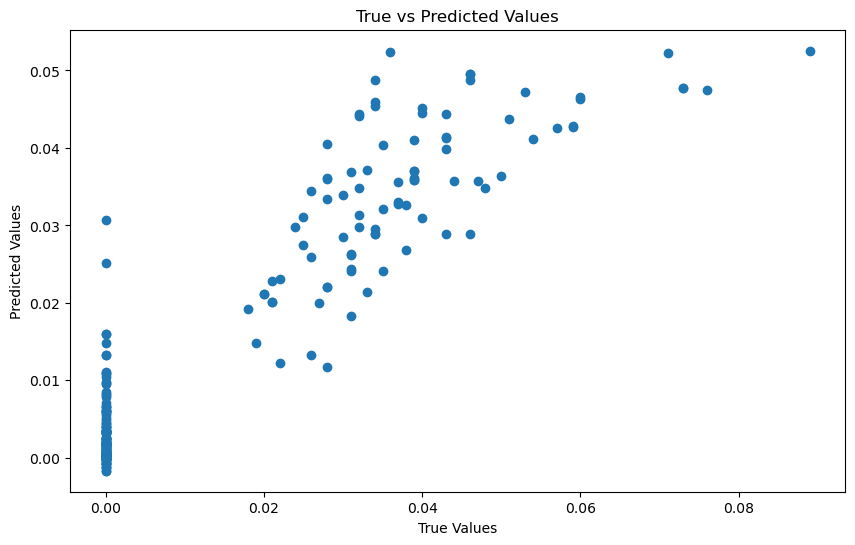

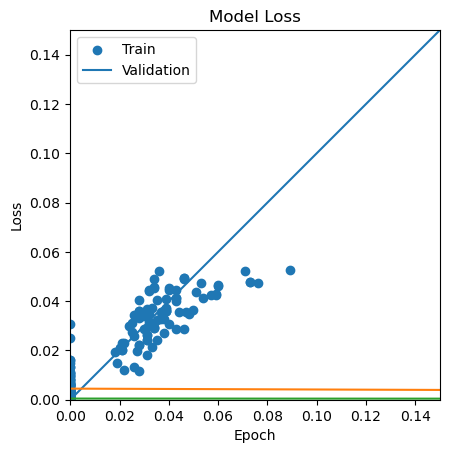

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 2s 18ms/step - loss: 0.0090 - val_loss: 4.2813e-04 - lr: 0.0010
Epoch 2/200
55/55 [==============================] - 1s 15ms/step - loss: 0.0022 - val_loss: 3.5132e-04 - lr: 0.0010
Epoch 3/200
55/55 [==============================] - 1s 15ms/step - loss: 0.0011 - val_loss: 3.9900e-04 - lr: 0.0010
Epoch 4/200
55/55 [==============================] - 1s 15ms/step - loss: 7.5173e-04 - val_loss: 2.4704e-04 - lr: 0.0010
Epoch 5/200
55/55 [==============================] - 1s 15ms/step - loss: 5.9447e-04 - val_loss: 2.4202e-04 - lr: 0.0010
Epoch 6/200
55/55 [==============================] - 1s 16ms/step - loss: 5.3871e-04 - val_loss: 9.6819e-05 - lr: 0.0010
Epoch 7/200
55/55 [==============================] - 1s 16ms/step - loss: 4.9009e-04 - val_loss: 9.1296e-05 - lr: 0.0010
Epoch 8/200
55/55 [==============================] - 1s 16ms/step - loss: 4.3320e-04 - val_loss: 1.2180e-04 - lr: 0.0010
Epoch 9/200
55/55 [==============================] - 1s 

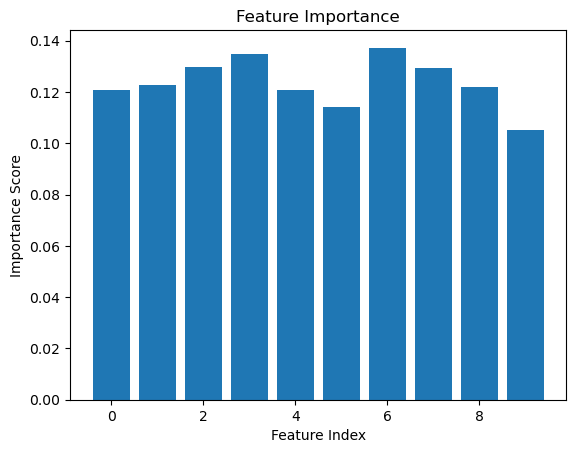

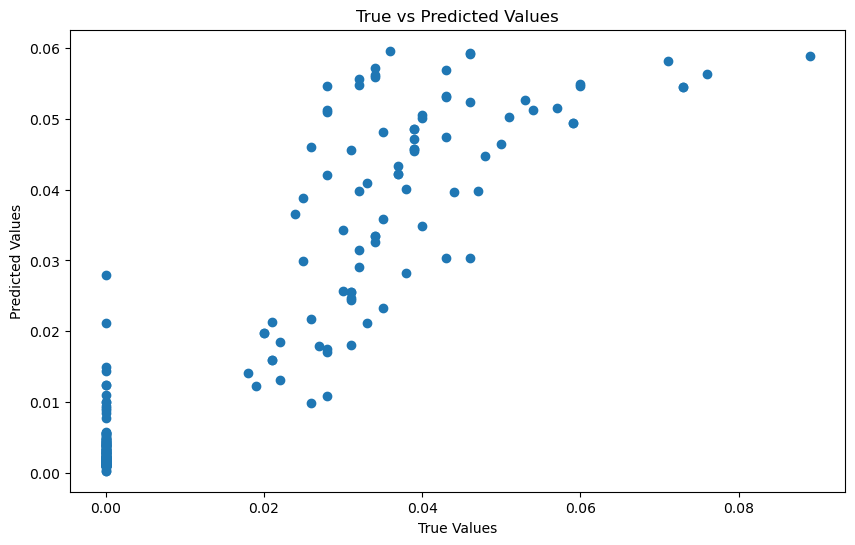

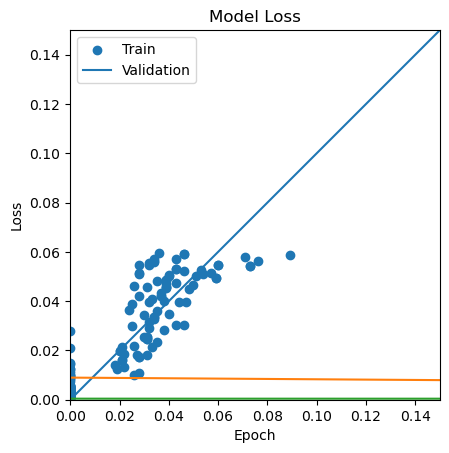

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 19ms/step - loss: 0.0065 - val_loss: 6.4256e-04 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0010 - val_loss: 8.7184e-04 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 0s 15ms/step - loss: 6.4652e-04 - val_loss: 0.0015 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 0s 15ms/step - loss: 5.1357e-04 - val_loss: 4.5162e-04 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 0s 15ms/step - loss: 3.2167e-04 - val_loss: 3.4080e-04 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 0s 15ms/step - loss: 3.6404e-04 - val_loss: 5.2375e-04 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 0s 15ms/step - loss: 2.3706e-04 - val_loss: 9.3558e-04 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 0s 15ms/step - loss: 2.3064e-04 - val_loss: 5.9801e-04 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 0s 

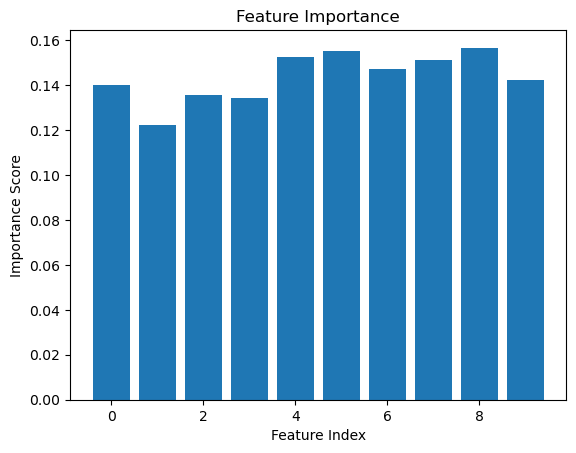

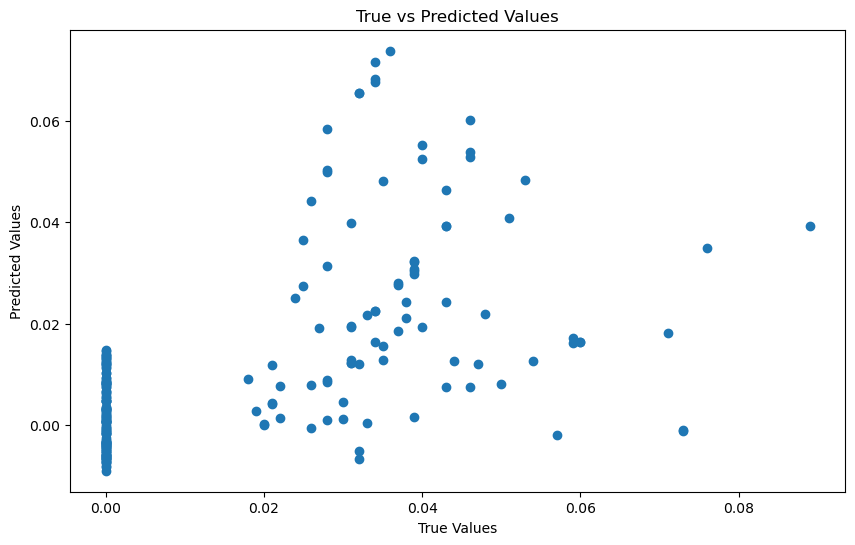

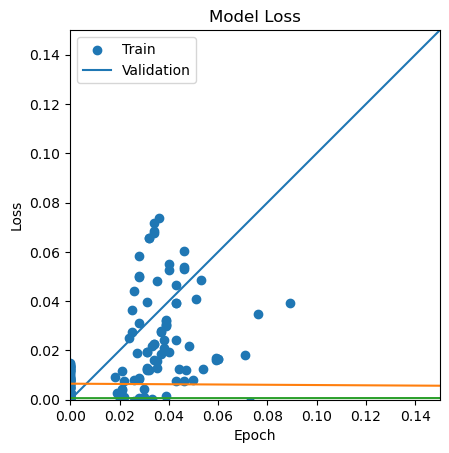

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 21ms/step - loss: 0.0126 - val_loss: 0.0055 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 7.7662e-04 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 6.1347e-04 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 0s 16ms/step - loss: 8.6096e-04 - val_loss: 1.4165e-04 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 0s 16ms/step - loss: 6.0025e-04 - val_loss: 9.3629e-05 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 0s 16ms/step - loss: 5.5031e-04 - val_loss: 1.2155e-04 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 0s 16ms/step - loss: 4.6291e-04 - val_loss: 7.3631e-05 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 0s 16ms/step - loss: 3.9095e-04 - val_loss: 7.2676e-05 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 0s 16ms

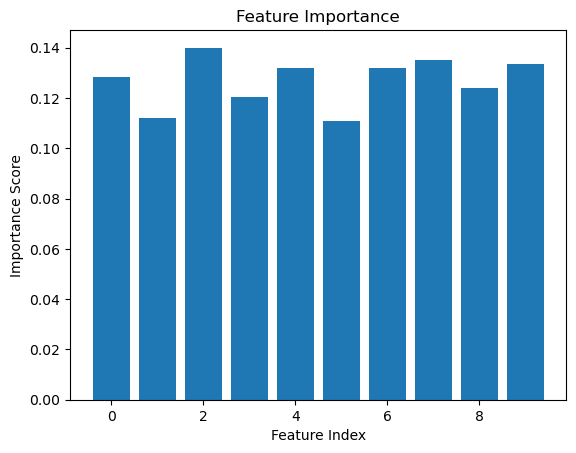

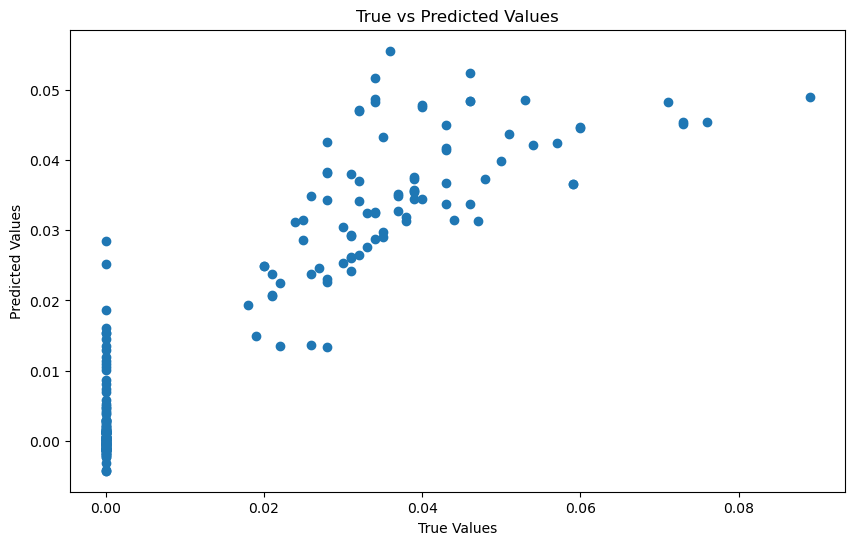

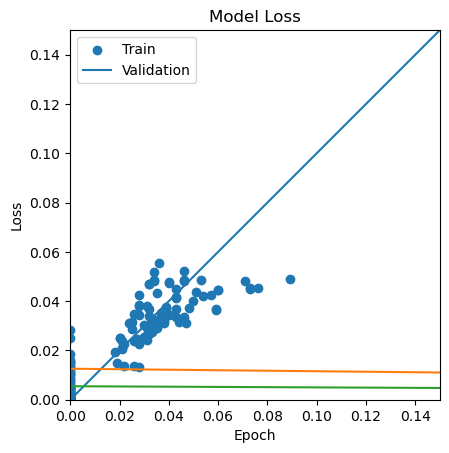

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 21ms/step - loss: 0.0261 - val_loss: 9.5976e-04 - lr: 0.0010
Epoch 2/200
28/28 [==============================] - 0s 16ms/step - loss: 0.0051 - val_loss: 0.0010 - lr: 0.0010
Epoch 3/200
28/28 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.0012 - lr: 0.0010
Epoch 4/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0013 - val_loss: 5.0875e-04 - lr: 0.0010
Epoch 5/200
28/28 [==============================] - 0s 17ms/step - loss: 9.9945e-04 - val_loss: 1.5854e-04 - lr: 0.0010
Epoch 6/200
28/28 [==============================] - 0s 15ms/step - loss: 7.8622e-04 - val_loss: 1.3371e-04 - lr: 0.0010
Epoch 7/200
28/28 [==============================] - 0s 17ms/step - loss: 5.9708e-04 - val_loss: 9.4322e-05 - lr: 0.0010
Epoch 8/200
28/28 [==============================] - 0s 16ms/step - loss: 4.9558e-04 - val_loss: 1.0089e-04 - lr: 0.0010
Epoch 9/200
28/28 [==============================] - 0s 16ms/step - 

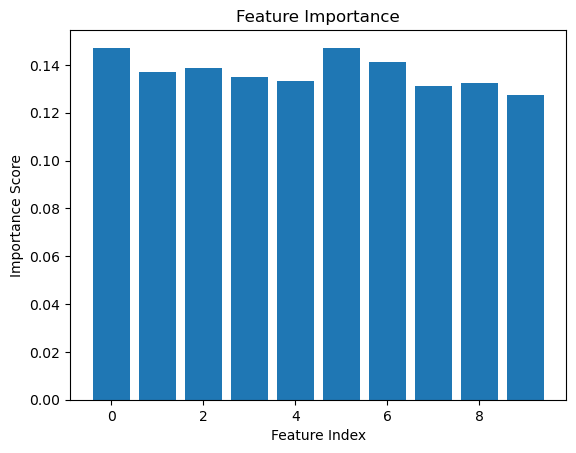

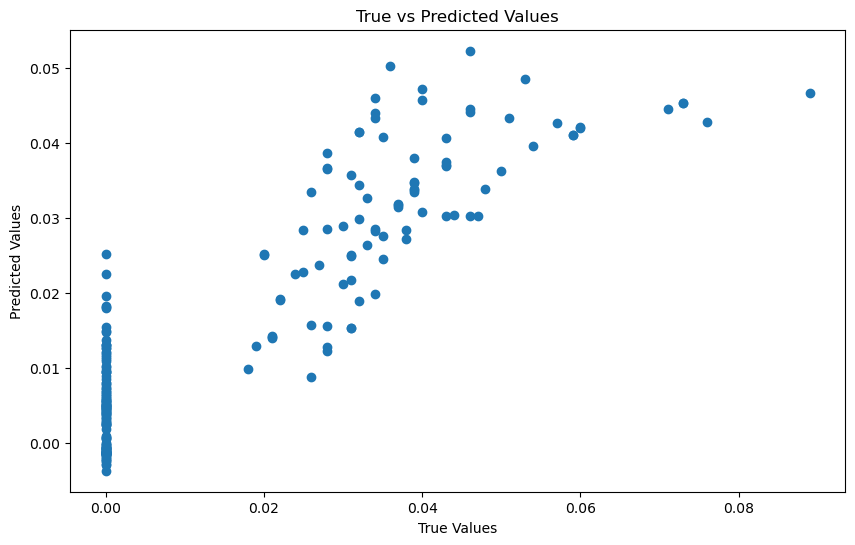

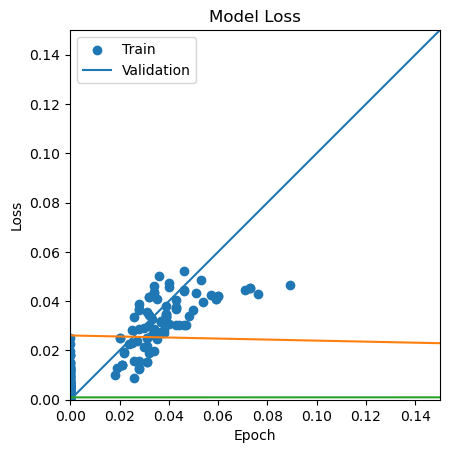

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 15ms/step - loss: 0.2235 - val_loss: 6.8813e-04 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 2s 14ms/step - loss: 7.6316e-04 - val_loss: 1.2019e-04 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 2s 14ms/step - loss: 4.5334e-04 - val_loss: 1.3905e-04 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 2s 14ms/step - loss: 3.9798e-04 - val_loss: 1.1792e-04 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 2s 14ms/step - loss: 3.8397e-04 - val_loss: 1.0125e-04 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 1s 14ms/step - loss: 3.3468e-04 - val_loss: 5.5047e-04 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 2s 14ms/step - loss: 3.4049e-04 - val_loss: 1.6981e-04 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 2s 14ms/step - loss: 3.1138e-04 - val_loss: 1.1629e-04 - lr: 0.0100
Epoch 9/200
110/110 [===========

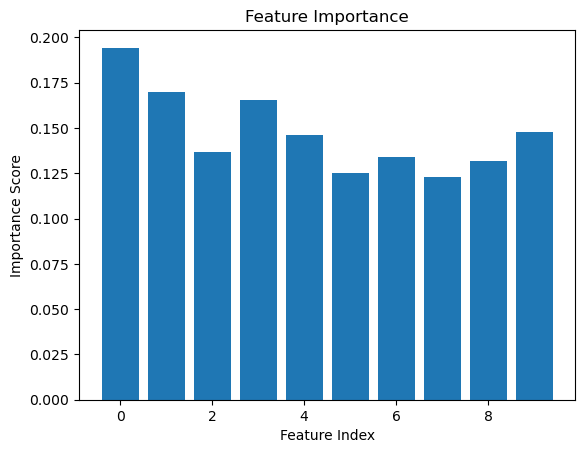

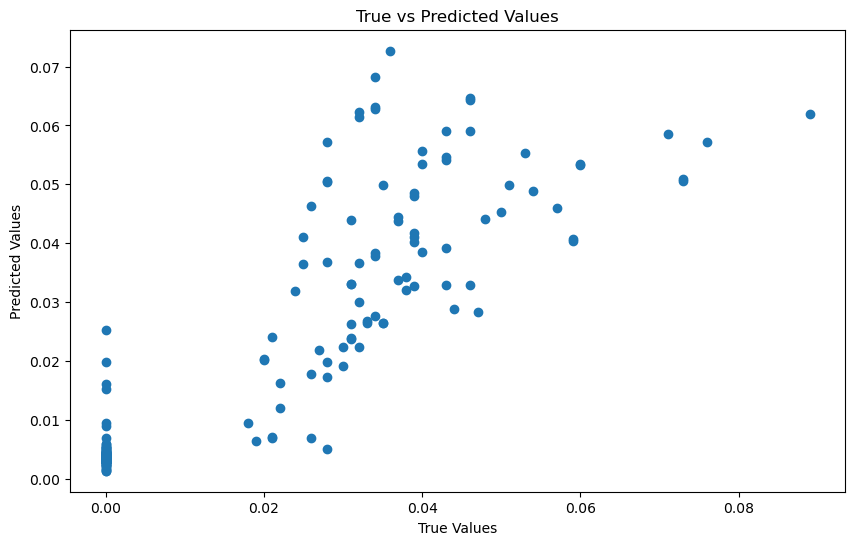

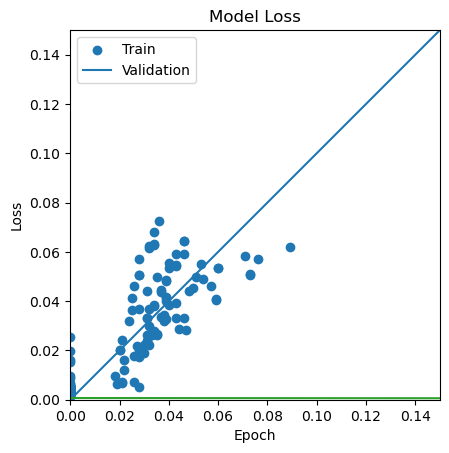

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 16ms/step - loss: 0.1913 - val_loss: 6.0117e-04 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 2s 15ms/step - loss: 7.7170e-04 - val_loss: 9.8946e-05 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 2s 15ms/step - loss: 5.1945e-04 - val_loss: 1.3306e-04 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 2s 15ms/step - loss: 4.9679e-04 - val_loss: 1.5649e-04 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 2s 15ms/step - loss: 5.2962e-04 - val_loss: 2.0544e-04 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 2s 15ms/step - loss: 4.0999e-04 - val_loss: 9.0281e-05 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 2s 15ms/step - loss: 4.0799e-04 - val_loss: 1.5368e-04 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 2s 15ms/step - loss: 3.8634e-04 - val_loss: 1.9169e-04 - lr: 0.0100
Epoch 9/200
110/110 [===========

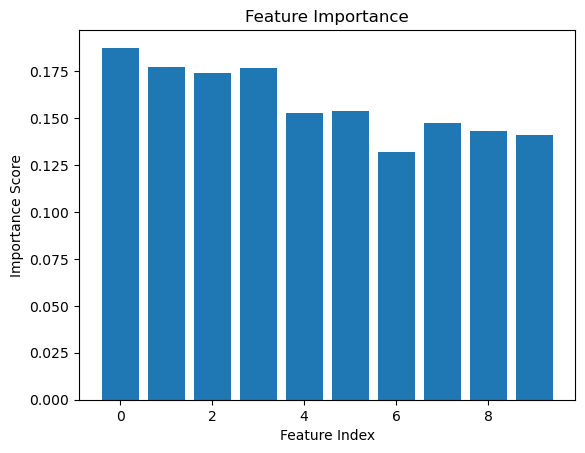

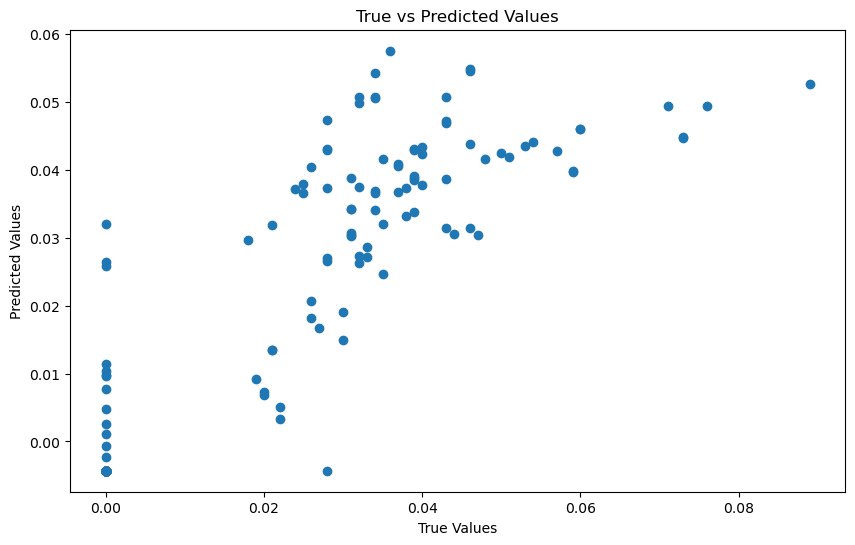

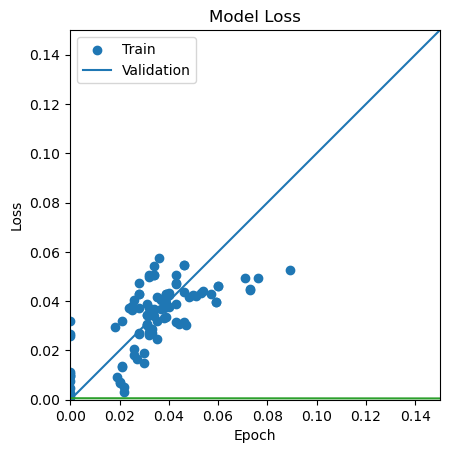

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



110/110 [==============================] - 2s 17ms/step - loss: 0.2623 - val_loss: 2.6502e-04 - lr: 0.0100
Epoch 2/200
110/110 [==============================] - 2s 15ms/step - loss: 7.7504e-04 - val_loss: 1.7737e-04 - lr: 0.0100
Epoch 3/200
110/110 [==============================] - 2s 15ms/step - loss: 5.6188e-04 - val_loss: 9.5934e-05 - lr: 0.0100
Epoch 4/200
110/110 [==============================] - 2s 15ms/step - loss: 6.2748e-04 - val_loss: 7.2765e-05 - lr: 0.0100
Epoch 5/200
110/110 [==============================] - 2s 15ms/step - loss: 5.3451e-04 - val_loss: 2.6028e-04 - lr: 0.0100
Epoch 6/200
110/110 [==============================] - 2s 15ms/step - loss: 5.2764e-04 - val_loss: 1.0090e-04 - lr: 0.0100
Epoch 7/200
110/110 [==============================] - 2s 15ms/step - loss: 5.0448e-04 - val_loss: 2.5052e-04 - lr: 0.0100
Epoch 8/200
110/110 [==============================] - 2s 15ms/step - loss: 4.5885e-04 - val_loss: 1.2423e-04 - lr: 0.0100
Epoch 9/200
110/110 [===========

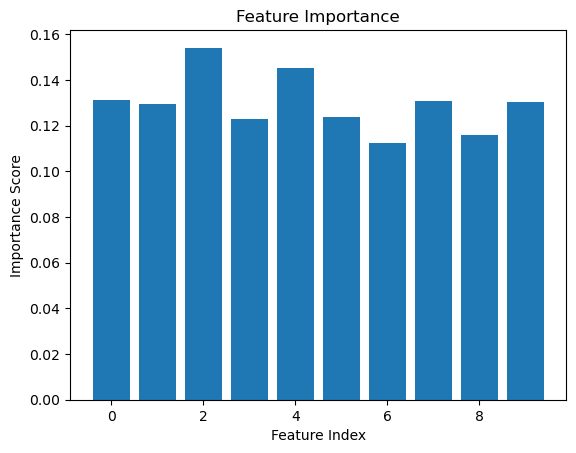

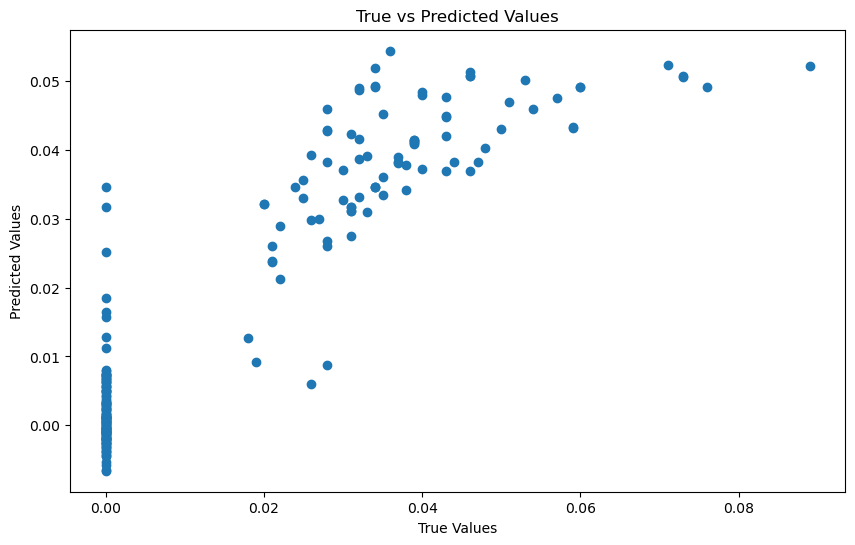

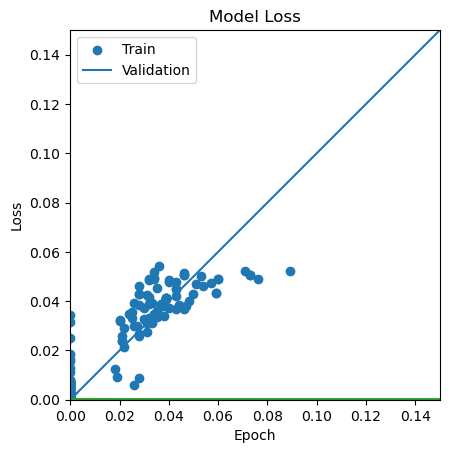

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 2s 16ms/step - loss: 1.7487 - val_loss: 0.0012 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 14ms/step - loss: 8.3618e-04 - val_loss: 3.3444e-04 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 14ms/step - loss: 7.3222e-04 - val_loss: 2.9824e-04 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 14ms/step - loss: 5.5853e-04 - val_loss: 8.7687e-05 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 15ms/step - loss: 4.2482e-04 - val_loss: 2.1004e-04 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 14ms/step - loss: 4.6971e-04 - val_loss: 3.3672e-04 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 14ms/step - loss: 4.2517e-04 - val_loss: 1.5235e-04 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 14ms/step - loss: 4.1732e-04 - val_loss: 1.0246e-04 - lr: 0.0100
Epoch 9/200
55/55 [==============================] -

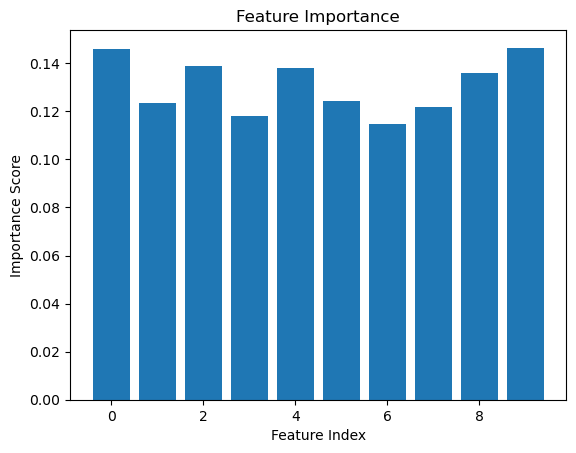

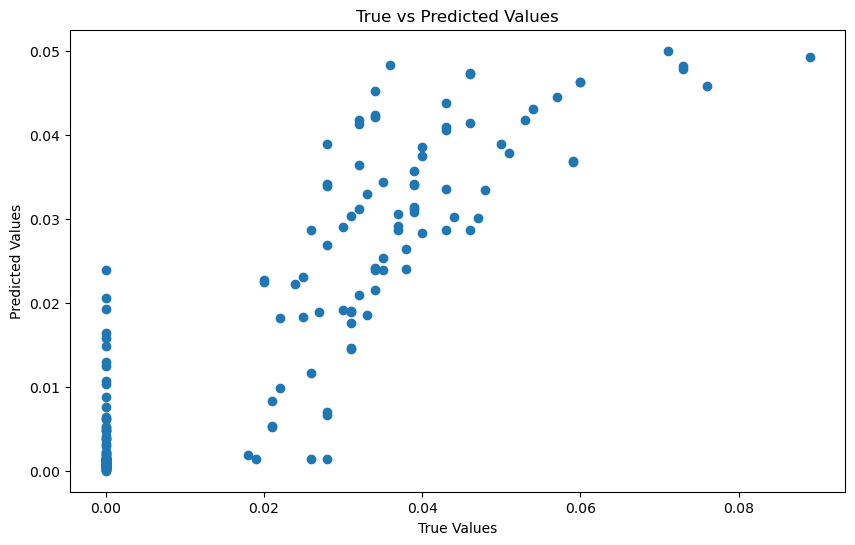

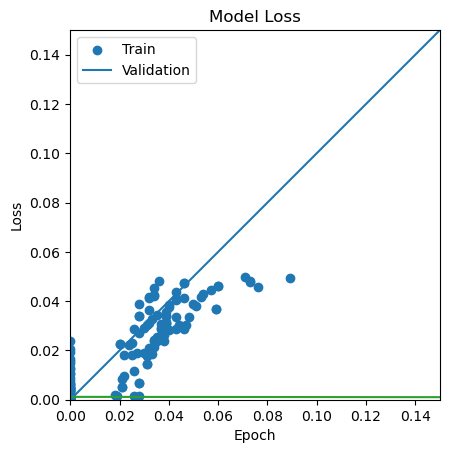

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 2s 18ms/step - loss: 0.3582 - val_loss: 3.1307e-04 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 15ms/step - loss: 9.4448e-04 - val_loss: 6.6515e-04 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 15ms/step - loss: 6.6310e-04 - val_loss: 1.6154e-04 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 16ms/step - loss: 5.6528e-04 - val_loss: 1.5275e-04 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 15ms/step - loss: 5.2425e-04 - val_loss: 1.0896e-04 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 15ms/step - loss: 4.5493e-04 - val_loss: 1.7785e-04 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 15ms/step - loss: 4.2980e-04 - val_loss: 9.0591e-05 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 15ms/step - loss: 4.2446e-04 - val_loss: 1.1948e-04 - lr: 0.0100
Epoch 9/200
55/55 [=============================

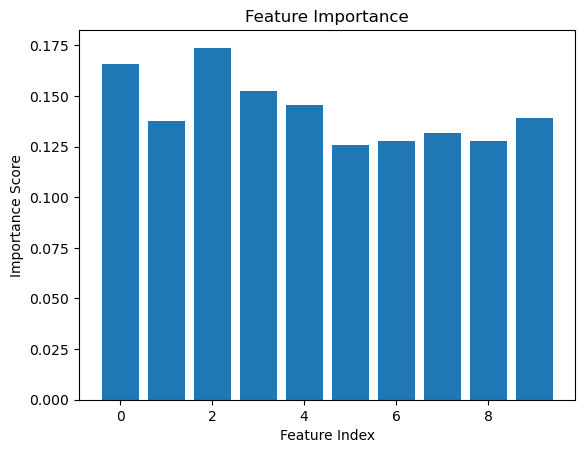

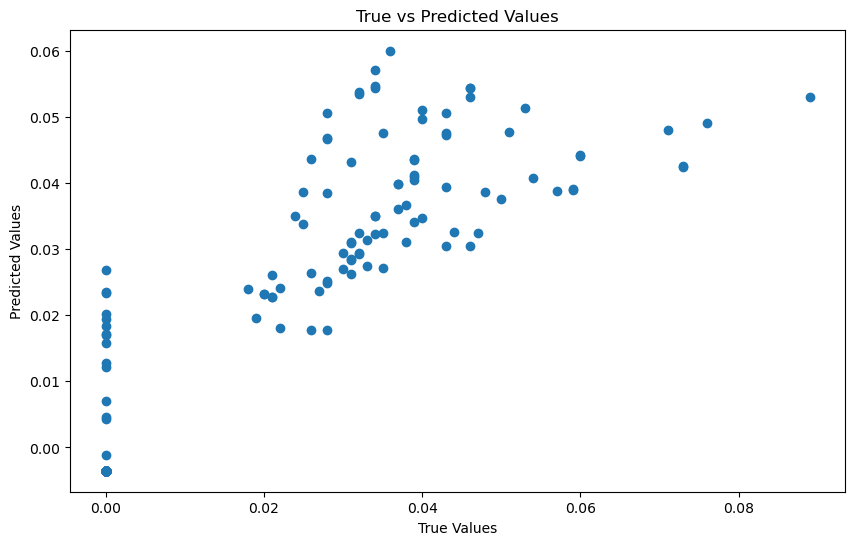

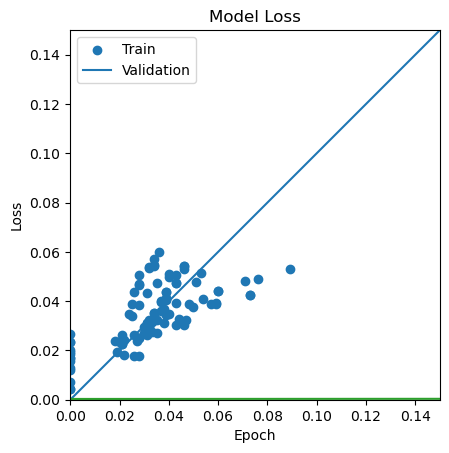

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



55/55 [==============================] - 2s 18ms/step - loss: 0.3467 - val_loss: 3.9594e-04 - lr: 0.0100
Epoch 2/200
55/55 [==============================] - 1s 16ms/step - loss: 9.9724e-04 - val_loss: 2.7183e-04 - lr: 0.0100
Epoch 3/200
55/55 [==============================] - 1s 15ms/step - loss: 6.7561e-04 - val_loss: 2.7919e-04 - lr: 0.0100
Epoch 4/200
55/55 [==============================] - 1s 16ms/step - loss: 6.5002e-04 - val_loss: 1.7288e-04 - lr: 0.0100
Epoch 5/200
55/55 [==============================] - 1s 15ms/step - loss: 5.1682e-04 - val_loss: 9.3633e-05 - lr: 0.0100
Epoch 6/200
55/55 [==============================] - 1s 15ms/step - loss: 5.7568e-04 - val_loss: 2.7615e-04 - lr: 0.0100
Epoch 7/200
55/55 [==============================] - 1s 16ms/step - loss: 5.0669e-04 - val_loss: 1.4719e-04 - lr: 0.0100
Epoch 8/200
55/55 [==============================] - 1s 15ms/step - loss: 5.0175e-04 - val_loss: 1.5042e-04 - lr: 0.0100
Epoch 9/200
55/55 [=============================

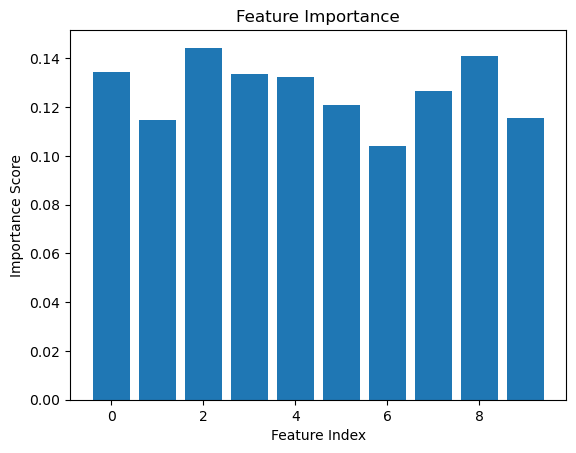

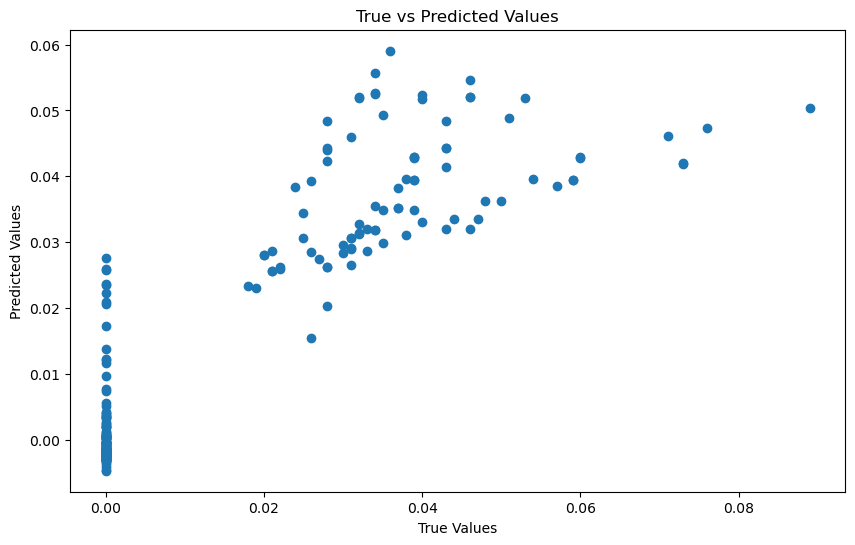

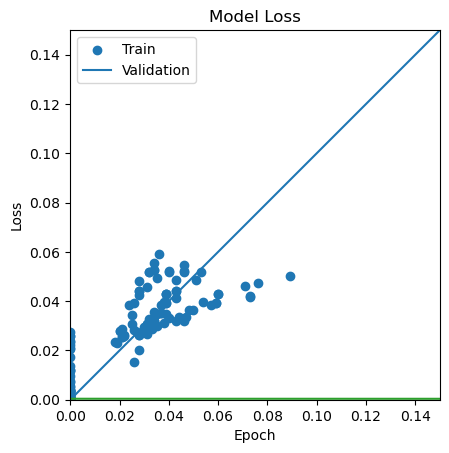

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 20ms/step - loss: 4.6553 - val_loss: 9.7328e-04 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 8.7439e-04 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 0s 15ms/step - loss: 7.3705e-04 - val_loss: 0.0024 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 2.0648e-04 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 0s 16ms/step - loss: 5.0568e-04 - val_loss: 1.9666e-04 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 0s 15ms/step - loss: 6.1161e-04 - val_loss: 5.6077e-04 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 0s 15ms/step - loss: 4.6352e-04 - val_loss: 1.0491e-04 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 0s 15ms/step - loss: 5.2022e-04 - val_loss: 1.9768e-04 - lr: 0.0100
Epoch 9/200
28/28 [==============================] - 0s 15ms

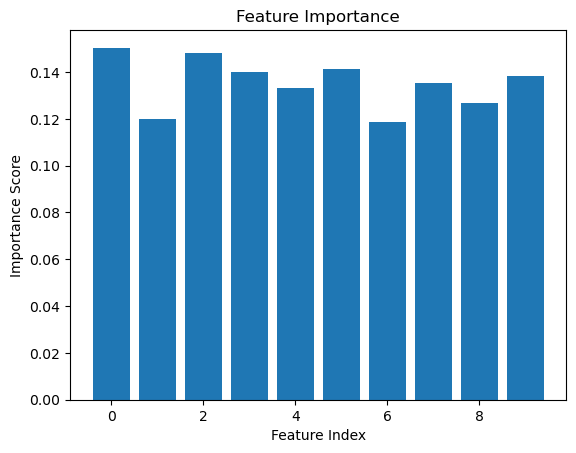

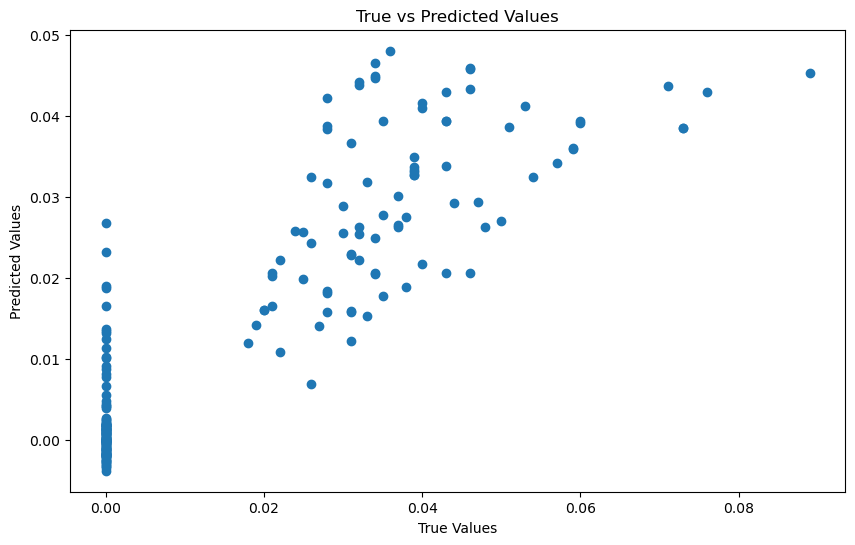

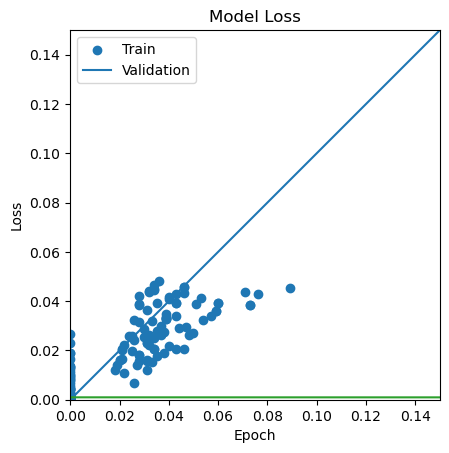

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 21ms/step - loss: 2.2132 - val_loss: 3.7911e-04 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 0s 16ms/step - loss: 8.1884e-04 - val_loss: 4.3879e-04 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 0s 17ms/step - loss: 6.8162e-04 - val_loss: 7.3921e-05 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 0s 16ms/step - loss: 5.9787e-04 - val_loss: 5.2421e-04 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 0s 16ms/step - loss: 7.3955e-04 - val_loss: 2.2882e-04 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 0s 16ms/step - loss: 5.2176e-04 - val_loss: 1.1627e-04 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 0s 16ms/step - loss: 4.9995e-04 - val_loss: 2.5966e-04 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 0s 16ms/step - loss: 4.7050e-04 - val_loss: 1.2883e-04 - lr: 0.0100
Epoch 9/200
28/28 [=============================

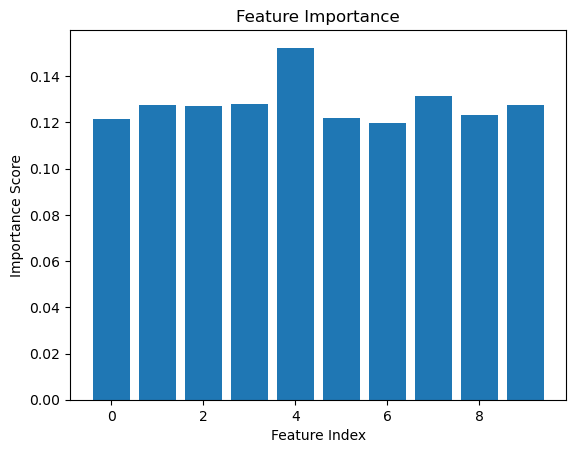

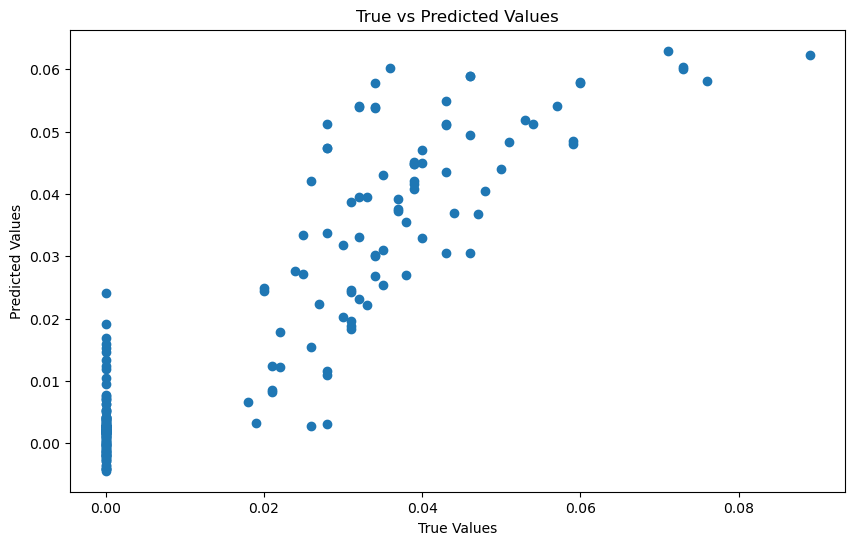

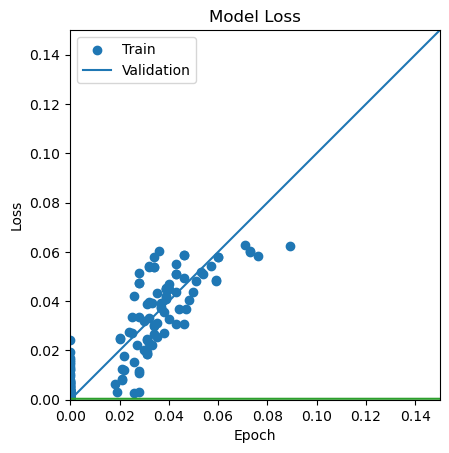

Epoch 1/200


C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28/28 [==============================] - 1s 21ms/step - loss: 3.7339 - val_loss: 3.5595e-04 - lr: 0.0100
Epoch 2/200
28/28 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 4.3977e-04 - lr: 0.0100
Epoch 3/200
28/28 [==============================] - 0s 16ms/step - loss: 9.2108e-04 - val_loss: 5.5664e-04 - lr: 0.0100
Epoch 4/200
28/28 [==============================] - 0s 16ms/step - loss: 8.4284e-04 - val_loss: 6.9670e-04 - lr: 0.0100
Epoch 5/200
28/28 [==============================] - 0s 16ms/step - loss: 7.3365e-04 - val_loss: 4.5291e-04 - lr: 0.0100
Epoch 6/200
28/28 [==============================] - 0s 16ms/step - loss: 6.3083e-04 - val_loss: 1.5337e-04 - lr: 0.0100
Epoch 7/200
28/28 [==============================] - 0s 17ms/step - loss: 5.6806e-04 - val_loss: 3.3504e-04 - lr: 0.0100
Epoch 8/200
28/28 [==============================] - 0s 16ms/step - loss: 5.1639e-04 - val_loss: 6.1590e-04 - lr: 0.0100
Epoch 9/200
28/28 [==============================] -

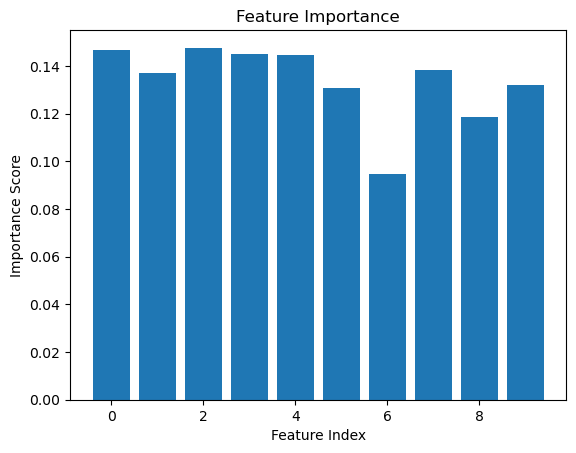

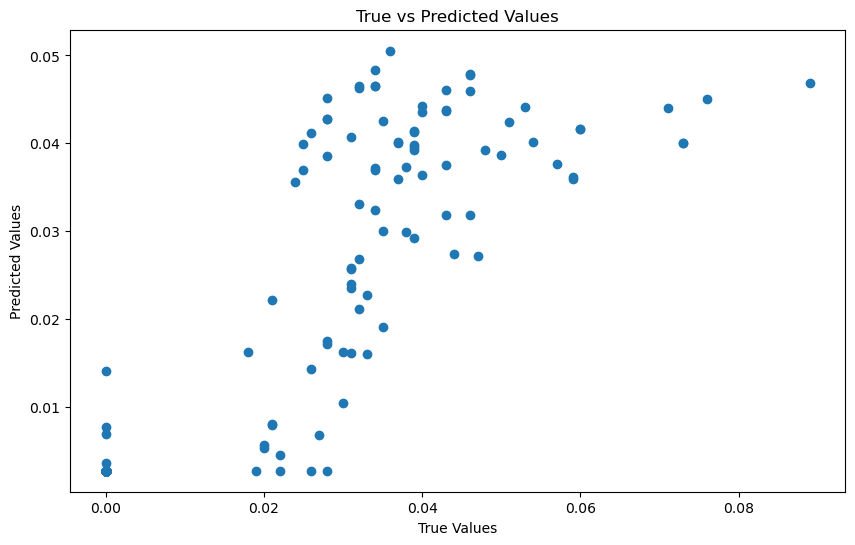

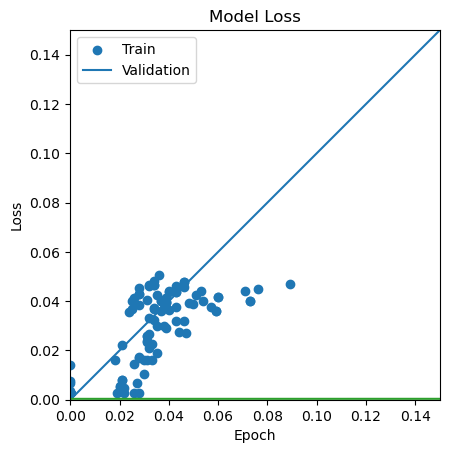

C:\Users\Gaurang\AppData\Local\Temp\ipykernel_19400\976674549.py:138: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [13]:
import itertools

optimizers = ['Nadam', 'Adam', 'SGD', 'rms']
learning_rates = [0.001, 0.01]
batch_sizes = [16,32, 64]
drop_outs = [0,0.2,0.3]

experiment_counter = 1

for optimizer in optimizers:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            for drop_out in drop_outs:
                experiment_name = f'Experiment-{experiment_counter}'
                experiment_result = run_experiment(experiment_name, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test,
                                                   epochs=200, batch_size=batch_size, dropout_rate=drop_out, optimizer=optimizer,
                                                   learning_rate=learning_rate, lr_scheduler=lr_scheduler, best_model_weights=None)
                experiment_counter += 1


In [15]:
experiment_result

Experiment Name Optimizer  Learning Rate  Batch Size  Dropout Rate  \
0     Experiment-3     Nadam          0.001          16           0.3   
1    Experiment-36      Adam          0.010          64           0.3   
2    Experiment-18     Nadam          0.010          64           0.3   
3    Experiment-59       rms          0.001          32           0.2   
4    Experiment-57       rms          0.001          16           0.3   
..             ...       ...            ...         ...           ...   
66   Experiment-49       SGD          0.010          32           0.0   
67   Experiment-46       SGD          0.010          16           0.0   
68   Experiment-44       SGD          0.001          64           0.2   
69   Experiment-37       SGD          0.001          16           0.0   
70   Experiment-43       SGD          0.001          64           0.0   

         MSE      RMSE  R2 Score (Training Set)  R2 Score (Test Set)  \
0   0.000065  0.008069                 0.682282             0.848117   
1   0.000065  0.008082                 0.633526             0.847644   
2   0.000065  0.008084                 0.668976             0.847558   
3   0.000067  0.008162                 0.543002             0.844627   
4   0.000068  0.008227                 0.657744             0.842144   
..       ...       ...                      ...                  ...   
66  0.003052  0.055247                 0.815314            -6.119494   
67  0.004243  0.065140                -0.560802            -8.897572   
68  0.005650  0.075169                -8.156926           -12.179505   
69  0.015461  0.124344                -5.576589           -35.064040   
70  0.022291  0.149303                 0.194344           -50.994936   

    Adjusted R2 Score (Test Set)       MAE  
0                       0.840522  0.004831  
1                       0.840027  0.005096  
2                       0.839936  0.005079  
3                       0.836858  0.005492  
4                       0.834251  0.005213  
..                           ...       ...  
66                     -6.475469  0.045511  
67                     -9.392450  0.049230  
68                    -12.838480  0.062201  
69                    -36.867242  0.105402  
70                    -53.594683  0.110937  

[72 rows x 11 columns]